# Customer Segmentation for Life Insurance

<a id='outline'></a>

### Outline


<b> 1. [Introduction](#intro) <br><br>
2. [Importing Libraries and Data](#import) <br><br>
3. [Exploratory Data Analysis](#analysis) <br>
</b>3.1. [DataFrame Description](#analysis-1) <br>
3.2. [Missing Values](#analysis-2)<br>
3.3. [Feature Engineering](#analysis-3)<br>
3.4. [Data Distribution](#analysis-4)<br><br>
<b>4. [Creating ML Models](#mlmodels) <br>
</b>4.1. [Classification Models](#mlmodels-1) <br>
4.2. [Model Tuning](#mlmodels-2)<br>
4.3. [Feature Importance](#mlmodels-3)<br>
4.4. [Pairwise Modelling](#mlmodels-4)<br><br>
<b>5. [Conclusion](#conclusion) <br>
</b>

<br><br>

<a id='intro'></a>

## 1. Introduction

**Motivation**

As a part of a Kaggle Constest automated methods of predicting the cost, and hence severity, of claims are developed. To achieve customer segmentation based on severity of the claims are modelled as classification algorithms.

**Dataset**

The dataset is provided by Prudential in Kaggle as a part of a contest.<br>
https://www.kaggle.com/competitions/prudential-life-insurance-assessment

**RoadMap**

<li>We begin our work by importing libraries and dataset. 
<li>Data will be analysed and then data preprocessing techniques will be applied. 
<li>Feature engineering is an important part of this study to increase final score.
<li>Then, I will apply classification algorithms for customer segmentation. 

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='import'></a>

## 2. Importing Libraries and Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [50]:
data = pd.read_csv("life_insurance_train.csv")

In [51]:
# Copying the dataframe to keep the original unspoiled.
df = data.copy()

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='analysis'></a>

## 3. Exploratory Data Analysis

<a id='analysis-1'></a>

### 3.1. DataFrame Description

Firstly, let's check what our dataframe looks like.

In [53]:
df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

> * Target value is **Response** column. 
> * There are **Product_Info** columns that are standardized values of some customer information.
> * There are **Medical_Keyword** columns specifying if the customer have that condition or not.

Let's check all columns. We have 128 columns so we take 50 of them for each time see all of them.

In [55]:
df.iloc[:,:50].describe().T

count          mean           std  min           25%  \
Id                   59381.0  39507.211515  22815.883089  2.0  19780.000000   
Product_Info_1       59381.0      1.026355      0.160191  1.0      1.000000   
Product_Info_3       59381.0     24.415655      5.072885  1.0     26.000000   
Product_Info_4       59381.0      0.328952      0.282562  0.0      0.076923   
Product_Info_5       59381.0      2.006955      0.083107  2.0      2.000000   
Product_Info_6       59381.0      2.673599      0.739103  1.0      3.000000   
Product_Info_7       59381.0      1.043583      0.291949  1.0      1.000000   
Ins_Age              59381.0      0.405567      0.197190  0.0      0.238806   
Ht                   59381.0      0.707283      0.074239  0.0      0.654545   
Wt                   59381.0      0.292587      0.089037  0.0      0.225941   
BMI                  59381.0      0.469462      0.122213  0.0      0.385517   
Employment_Info_1    59362.0      0.077582      0.082347  0.0      0.035000   
Employment_Info_2    59381.0      8.641821      4.227082  1.0      9.000000   
Employment_Info_3    59381.0      1.300904      0.715034  1.0      1.000000   
Employment_Info_4    52602.0      0.006283      0.032816  0.0      0.000000   
Employment_Info_5    59381.0      2.142958      0.350033  2.0      2.000000   
Employment_Info_6    48527.0      0.361469      0.349551  0.0      0.060000   
InsuredInfo_1        59381.0      1.209326      0.417939  1.0      1.000000   
InsuredInfo_2        59381.0      2.007427      0.085858  2.0      2.000000   
InsuredInfo_3        59381.0      5.835840      2.674536  1.0      3.000000   
InsuredInfo_4        59381.0      2.883666      0.320627  2.0      3.000000   
InsuredInfo_5        59381.0      1.027180      0.231566  1.0      1.000000   
InsuredInfo_6        59381.0      1.409188      0.491688  1.0      1.000000   
InsuredInfo_7        59381.0      1.038531      0.274915  1.0      1.000000   
Insurance_History_1  59381.0      1.727606      0.445195  1.0      1.000000   
Insurance_History_2  59381.0      1.055792      0.329328  1.0      1.000000   
Insurance_History_3  59381.0      2.146983      0.989139  1.0      1.000000   
Insurance_History_4  59381.0      1.958707      0.945739  1.0      1.000000   
Insurance_History_5  33985.0      0.001733      0.007338  0.0      0.000400   
Insurance_History_7  59381.0      1.901989      0.971223  1.0      1.000000   
Insurance_History_8  59381.0      2.048484      0.755149  1.0      1.000000   
Insurance_History_9  59381.0      2.419360      0.509577  1.0      2.000000   
Family_Hist_1        59381.0      2.686230      0.483159  1.0      2.000000   
Family_Hist_2        30725.0      0.474550      0.154959  0.0      0.362319   
Family_Hist_3        25140.0      0.497737      0.140187  0.0      0.401961   
Family_Hist_4        40197.0      0.444890      0.163012  0.0      0.323944   
Family_Hist_5        17570.0      0.484635      0.129200  0.0      0.401786   
Medical_History_1    50492.0      7.962172     13.027697  0.0      2.000000   
Medical_History_2    59381.0    253.987100    178.621154  1.0    112.000000   
Medical_History_3    59381.0      2.102171      0.303098  1.0      2.000000   
Medical_History_4    59381.0      1.654873      0.475414  1.0      1.000000   
Medical_History_5    59381.0      1.007359      0.085864  1.0      1.000000   
Medical_History_6    59381.0      2.889897      0.456128  1.0      3.000000   
Medical_History_7    59381.0      2.012277      0.172360  1.0      2.000000   
Medical_History_8    59381.0      2.044088      0.291353  1.0      2.000000   
Medical_History_9    59381.0      1.769943      0.421032  1.0      2.000000   
Medical_History_10     557.0    141.118492    107.759559  0.0      8.000000   
Medical_History_11   59381.0      2.993836      0.095340  1.0      3.000000   
Medical_History_12   59381.0      2.056601      0.231153  1.0      2.000000   

                              50%           75%           max  
Id      

In [57]:
df.iloc[:,50:100].describe().T

count        mean        std  min   25%    50%    75%  \
Medical_History_13  59381.0    2.768141   0.640259  1.0   3.0    3.0    3.0   
Medical_History_14  59381.0    2.968542   0.197715  1.0   3.0    3.0    3.0   
Medical_History_15  14785.0  123.760974  98.516206  0.0  17.0  117.0  240.0   
Medical_History_16  59381.0    1.327529   0.740118  1.0   1.0    1.0    1.0   
Medical_History_17  59381.0    2.978006   0.146778  1.0   3.0    3.0    3.0   
Medical_History_18  59381.0    1.053536   0.225848  1.0   1.0    1.0    1.0   
Medical_History_19  59381.0    1.034455   0.182859  1.0   1.0    1.0    1.0   
Medical_History_20  59381.0    1.985079   0.121375  1.0   2.0    2.0    2.0   
Medical_History_21  59381.0    1.108991   0.311847  1.0   1.0    1.0    1.0   
Medical_History_22  59381.0    1.981644   0.134236  1.0   2.0    2.0    2.0   
Medical_History_23  59381.0    2.528115   0.849170  1.0   3.0    3.0    3.0   
Medical_History_24   3801.0   50.635622  78.149069  0.0   1.0    8.0   64.0   
Medical_History_25  59381.0    1.194961   0.406082  1.0   1.0    1.0    1.0   
Medical_History_26  59381.0    2.808979   0.393237  1.0   3.0    3.0    3.0   
Medical_History_27  59381.0    2.980213   0.197652  1.0   3.0    3.0    3.0   
Medical_History_28  59381.0    1.067210   0.250589  1.0   1.0    1.0    1.0   
Medical_History_29  59381.0    2.542699   0.839904  1.0   3.0    3.0    3.0   
Medical_History_30  59381.0    2.040771   0.198100  1.0   2.0    2.0    2.0   
Medical_History_31  59381.0    2.985265   0.170989  1.0   3.0    3.0    3.0   
Medical_History_32   1107.0   11.965673  38.718774  0.0   0.0    0.0    2.0   
Medical_History_33  59381.0    2.804618   0.593798  1.0   3.0    3.0    3.0   
Medical_History_34  59381.0    2.689076   0.724661  1.0   3.0    3.0    3.0   
Medical_History_35  59381.0    1.002055   0.063806  1.0   1.0    1.0    1.0   
Medical_History_36  59381.0    2.179468   0.412633  1.0   2.0    2.0    2.0   
Medical_History_37  59381.0    1.938398   0.240574  1.0   2.0    2.0    2.0   
Medical_History_38  59381.0    1.004850   0.069474  1.0   1.0    1.0    1.0   
Medical_History_39  59381.0    2.830720   0.556665  1.0   3.0    3.0    3.0   
Medical_History_40  59381.0    2.967599   0.252427  1.0   3.0    3.0    3.0   
Medical_History_41  59381.0    1.641064   0.933361  1.0   1.0    1.0    3.0   
Medical_Keyword_1   59381.0    0.042000   0.200591  0.0   0.0    0.0    0.0   
Medical_Keyword_2   59381.0    0.008942   0.094141  0.0   0.0    0.0    0.0   
Medical_Keyword_3   59381.0    0.049275   0.216443  0.0   0.0    0.0    0.0   
Medical_Keyword_4   59381.0    0.014550   0.119744  0.0   0.0    0.0    0.0   
Medical_Keyword_5   59381.0    0.008622   0.092456  0.0   0.0    0.0    0.0   
Medical_Keyword_6   59381.0    0.012597   0.111526  0.0   0.0    0.0    0.0   
Medical_Keyword_7   59381.0    0.013910   0.117119  0.0   0.0    0.0    0.0   
Medical_Keyword_8   59381.0    0.010407   0.101485  0.0   0.0    0.0    0.0   
Medical_Keyword_9   59381.0    0.006652   0.081289  0.0   0.0    0.0    0.0   
Medical_Keyword_10  59381.0    0.036459   0.187432  0.0   0.0    0.0    0.0   
Medical_Keyword_11  59381.0    0.058015   0.233774  0.0   0.0    0.0    0.0   
Medical_Keyword_12  59381.0    0.010003   0.099515  0.0   0.0    0.0    0.0   
Medical_Keyword_13  59381.0    0.005962   0.076981  0.0   0.0    0.0    0.0   
Medical_Keyword_14  59381.0    0.007848   0.088239  0.0   0.0    0.0    0.0   
Medical_Keyword_15  59381.0    0.190465   0.392671  0.0   0.0    0.0    0.0   
Medical_Keyword_16  59381.0    0.012715   0.112040  0.0   0.0    0.0    0.0   
Medical_Keyword_17  59381.0    0.009161   0.095275  0.0   0.0    0.0    0.0   
Medical_Keyword_18  59381.0    0.007494   0.086244  0.0   0.0    0.0    0.0   
Medical_Keyword_19  59381.0    0.009296   0.095967  0.0   0.0    0.0    0.0   
Medical_Keyword_20  59381.0    0.008134   0.089821  0.0   0.0    0.0    0.0   
Medical_Keyword_21  59381.0    0.014601   0.119949  0.0   0.0    0.0    

We stop here because the rest is medical keywords.

In [60]:
df.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_1    59362 non-null  float64
 13  Employment_Info_2    59381 non-null  int64  
 14  Employment_Info_3    59381 non-null  int64  
 15  Employment_Info_4    52602 non-null 

<br><br>It seems all columns but **Product_Info_2** are numerical.

In [63]:
for col in df.columns:
    print(col, df[col].unique()[:20])

Id [ 2  5  6  7  8 10 11 14 15 16 17 18 19 20 22 23 24 25 26 27]
Product_Info_1 [1 2]
Product_Info_2 ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']
Product_Info_3 [10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3]
Product_Info_4 [0.07692308 0.48717949 0.23076923 0.16619385 0.12820513 0.1025641
 0.         0.38461538 0.43589744 1.         0.17948718 0.02564103
 0.33333333 0.28205128 0.74358974 0.69230769 0.61538461 0.15384615
 0.35897436 0.04102564]
Product_Info_5 [2 3]
Product_Info_6 [1 3]
Product_Info_7 [1 3 2]
Ins_Age [0.64179104 0.05970149 0.02985075 0.1641791  0.41791045 0.50746269
 0.37313433 0.6119403  0.52238806 0.55223881 0.53731343 0.29850746
 0.56716418 0.2238806  0.32835821 0.62686567 0.20895522 0.26865672
 0.3880597  0.17910448]
Ht [0.58181818 0.6        0.74545454 0.67272727 0.65454546 0.83636364
 0.78181818 0.61818182 0.69090909 0.63636364 0.70909091 0.8
 0.81818182 0.76363636 0.85454546 0.72727273 0.47272727 0

> * **Id** column seems unique numbers identifying the customers.
> * **Product_Info_2** consists of classes that are combination of a letter and a number.
> * **float** columns are standardized values, yet, some **Medical_History** columns are integers but identified as floats.
> * **Medical_Keywords** are binary values.
> * There are some missing values.
> * There are 8 values of **Response**. This is stated to be **severity of claims** so it might be ordinal.

In [64]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [68]:
# Checking if Id is unique
df['Id'].is_unique

True

<br><br>

<a id='analysis-2'></a>

### 3.2. Missing Values

In [93]:
# Checking missing values
df[df.columns[df.isnull().any()]].isnull().sum()

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

> **Assumption:** The missing values are most probably left blank where there should have been filled with 0.

In [96]:
# Filling null values with 0
df = df.fillna(0)

In [100]:
# Checking missing values
df.isna().sum().sum()

0

<br><br>

<a id='analysis-3'></a>

### 3.3. Feature Engineering

**Defining medical keywords and medical history columns**

In [76]:
medical_keywords_cols = df.columns[df.columns.str.startswith('Medical_Keyword')]
medical_history_cols = df.columns[df.columns.str.startswith('Medical_History')]

In [79]:
print(medical_keywords_cols)
print(medical_history_cols)

Index(['Medical_Keyword_1', 'Medical_Keyword_2', 'Medical_Keyword_3',
       'Medical_Keyword_4', 'Medical_Keyword_5', 'Medical_Keyword_6',
       'Medical_Keyword_7', 'Medical_Keyword_8', 'Medical_Keyword_9',
       'Medical_Keyword_10', 'Medical_Keyword_11', 'Medical_Keyword_12',
       'Medical_Keyword_13', 'Medical_Keyword_14', 'Medical_Keyword_15',
       'Medical_Keyword_16', 'Medical_Keyword_17', 'Medical_Keyword_18',
       'Medical_Keyword_19', 'Medical_Keyword_20', 'Medical_Keyword_21',
       'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24',
       'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27',
       'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30',
       'Medical_Keyword_31', 'Medical_Keyword_32', 'Medical_Keyword_33',
       'Medical_Keyword_34', 'Medical_Keyword_35', 'Medical_Keyword_36',
       'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_Keyword_39',
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_

In [104]:
# Making all medical history columns integer type.
df[medical_history_cols] = df[medical_history_cols].astype('int64')

<br><br>

**Factorizing Product_Info_2 column**

In [107]:
df['Product_Info_2_char'] = df.Product_Info_2.str[0]
df['Product_Info_2_num'] = df.Product_Info_2.str[1]
df['Product_Info_2'] = pd.factorize(df['Product_Info_2'])[0]
df['Product_Info_2_char'] = pd.factorize(df['Product_Info_2_char'])[0]
df['Product_Info_2_num'] = pd.factorize(df['Product_Info_2_num'])[0]

In [108]:
df.head()

Id  Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1               0              10        0.076923   
1   5               1               1              26        0.076923   
2   6               1               2              26        0.076923   
3   7               1               3              10        0.487179   
4   8               1               4              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_48  Response  Product_Info_2_char  Product_Info_2_num  
0                   0         8                    0                   0  
1                   0         4                    1                   1  
2                   0         8                    2                   1  
3                   0         8                    0                   2  
4                   0         8                    0                   3  

[5 rows x 130 columns]

<br><br>

**Dropping Id column**

In [110]:
df = df.drop(columns='Id')

<AxesSubplot:xlabel='Response', ylabel='BMI_Age'>

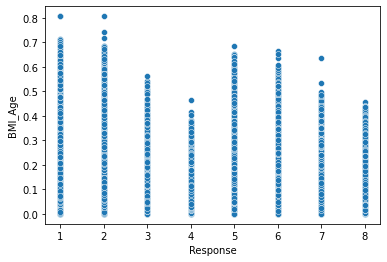

In [161]:
sns.scatterplot(x = df['Response'], y = df['BMI_Age'])

<AxesSubplot:xlabel='Response', ylabel='Med_Keywords_Count'>

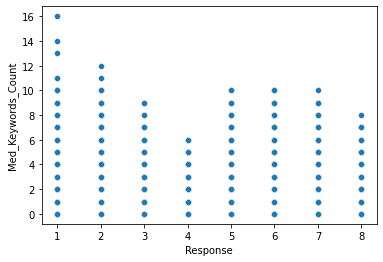

In [162]:
sns.scatterplot(x = df['Response'], y = df['Med_Keywords_Count'])

<AxesSubplot:xlabel='BMI_Age', ylabel='Med_Keywords_Count'>

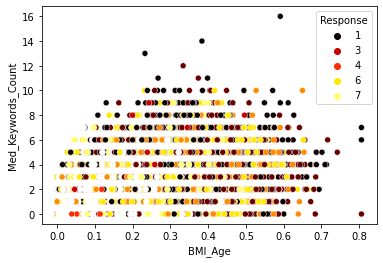

In [166]:
sns.scatterplot(x = df['BMI_Age'], y = df['Med_Keywords_Count'], hue = df['Response'], palette='hot')

<br><br>

<a id='analysis-4'></a>

### 3.4. Data Distribution

Let's check the distributions of the features with respect to the target value.

In [112]:
df.columns[:50]

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5',
       'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3',
       'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
       'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', 'Medical_History_11',

<br>

**Distribution of float values**

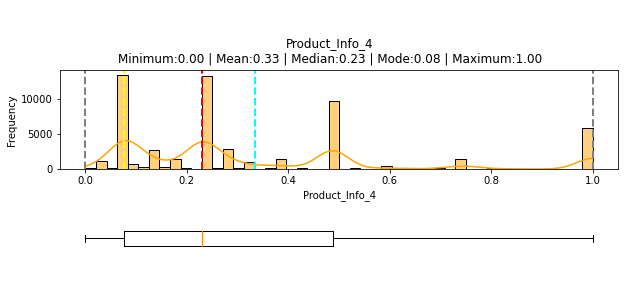

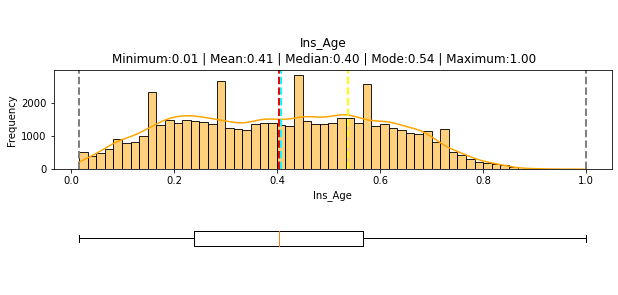

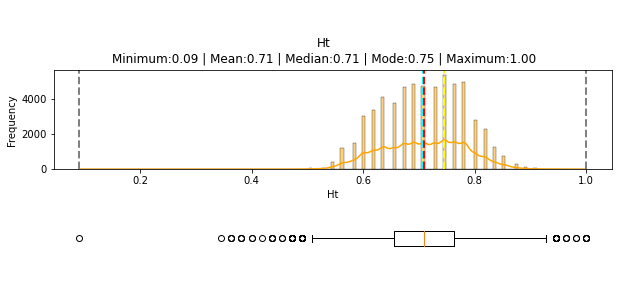

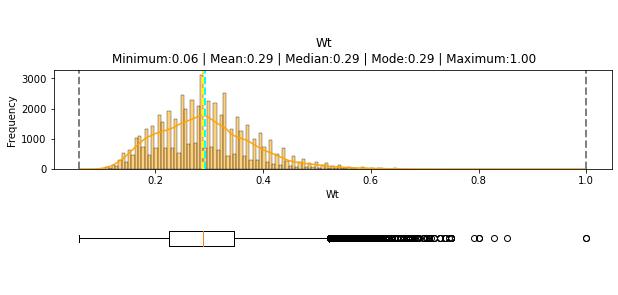

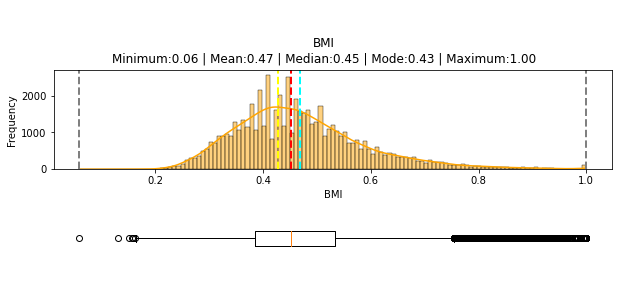

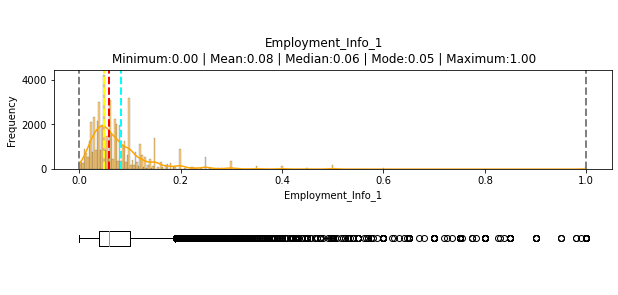

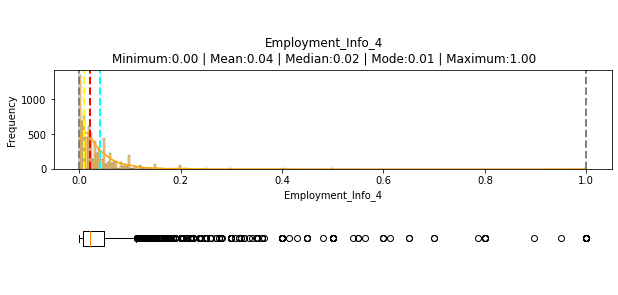

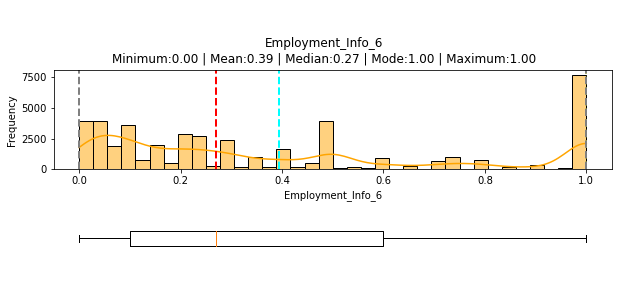

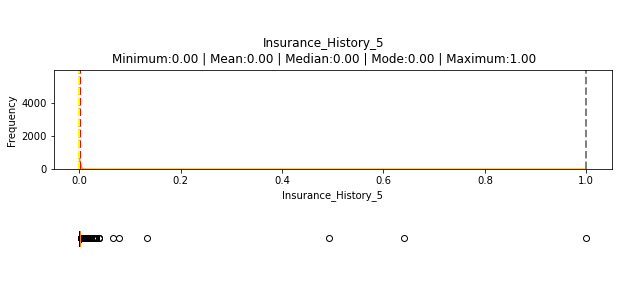

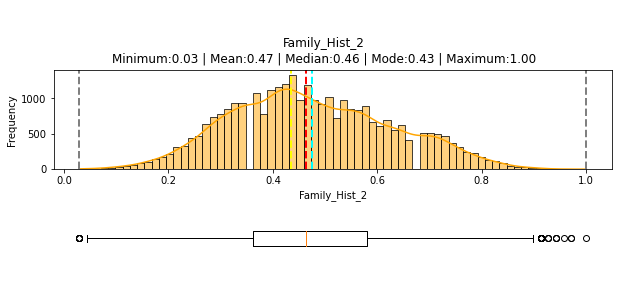

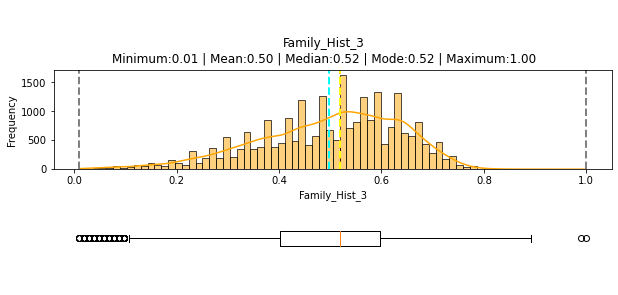

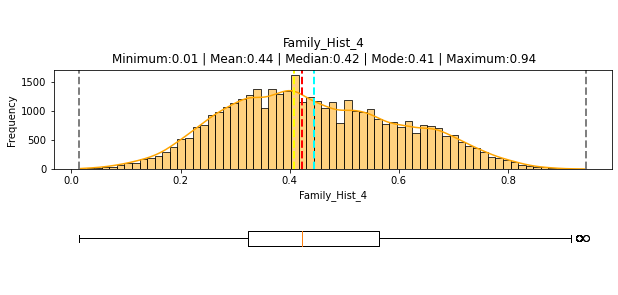

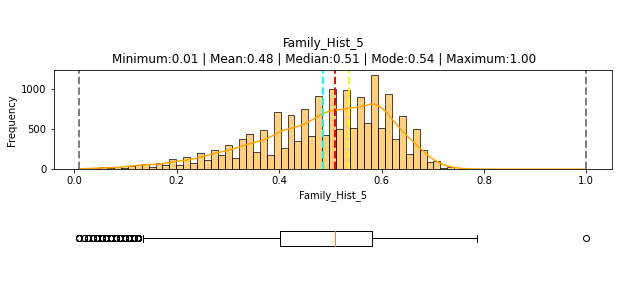

In [115]:
# Showing distribution of float values.

for col in df.select_dtypes(['float64']).columns:
    # Selecting column excluding 0 values
    var_data = df[df[col] != 0][col]

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    sns.histplot(var_data, ax = ax[0], kde = True, color = 'orange')
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    ax[1].axis('off')

    # Add a title to the Figure
    fig.suptitle('\n\n{}\nMinimum:{:.2f} | Mean:{:.2f} | Median:{:.2f} | Mode:{:.2f} | Maximum:{:.2f}\n'.format(col,
                                                                                            min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val), y = 1.1)
    # Show the figure
    fig.show()


<br><br>

> **Evaluation of Float Features**
> * Most of them show normal distribution. However, since we do not know what values they refer to in real life, it is better not to search any outliers.
> * BMIxAge can be used as a new feature. 

<br><br>

In [141]:
df['BMI_Age'] = df['BMI'] * df['Ins_Age']

**Distribution of categorical values**

In [124]:
df.select_dtypes(['int64']).columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
       ...
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48', 'Response', 'Product_Info_2_char',
       'Product_Info_2_num'],
      dtype='object', length=116)

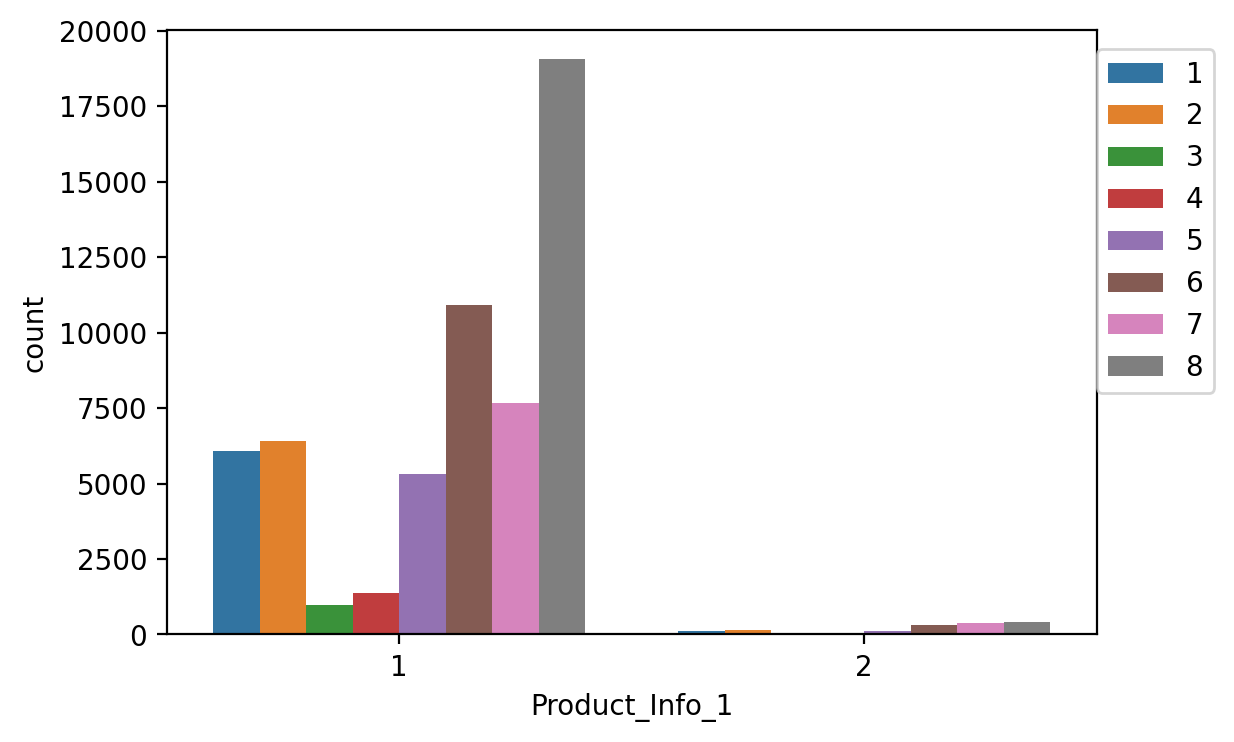

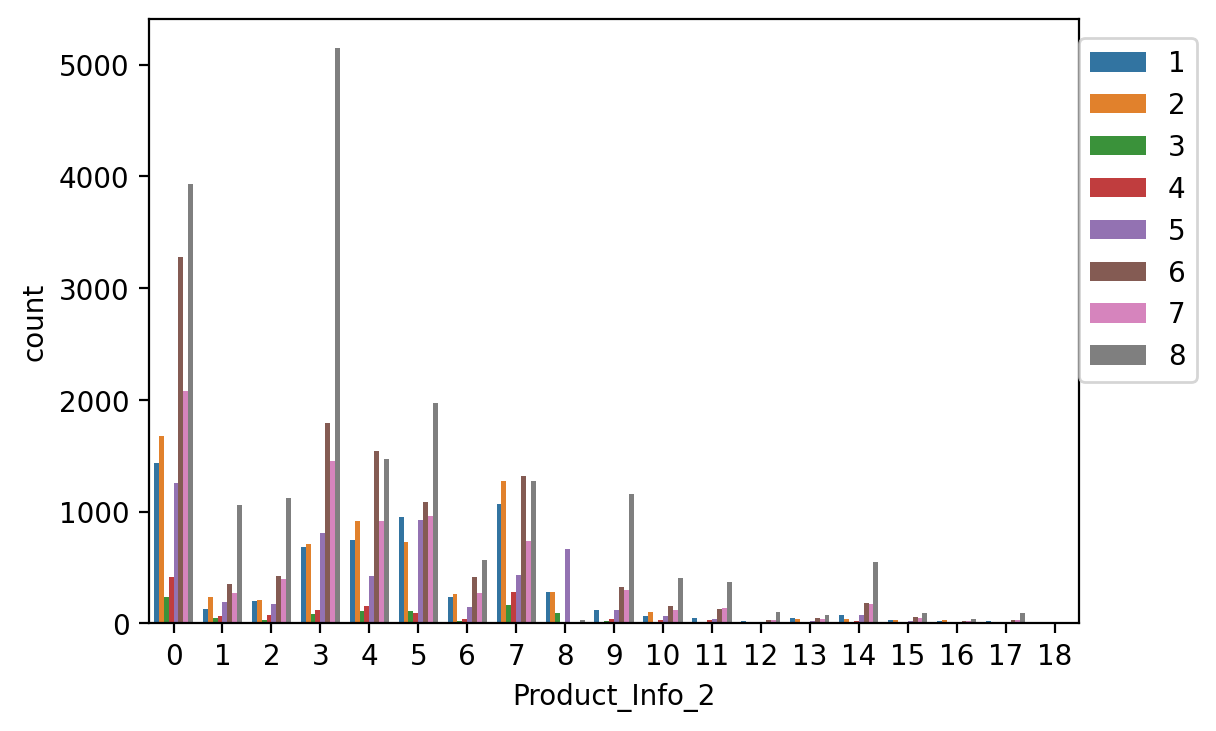

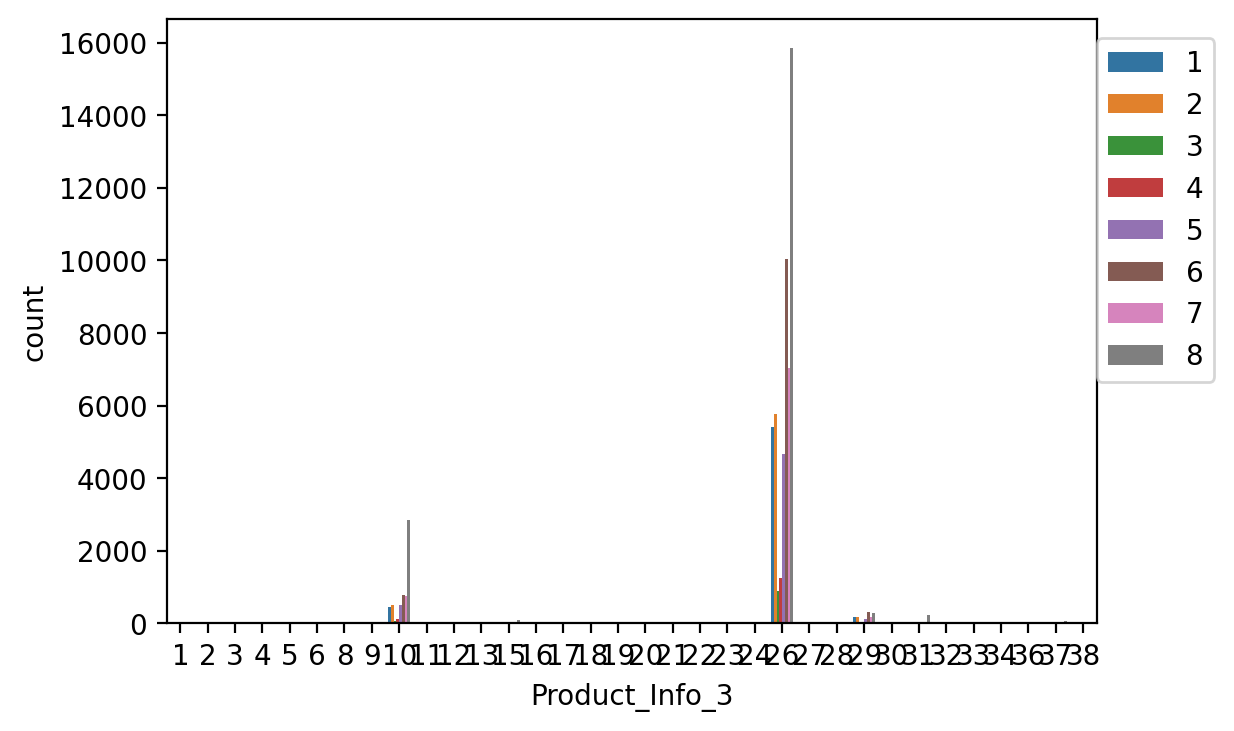

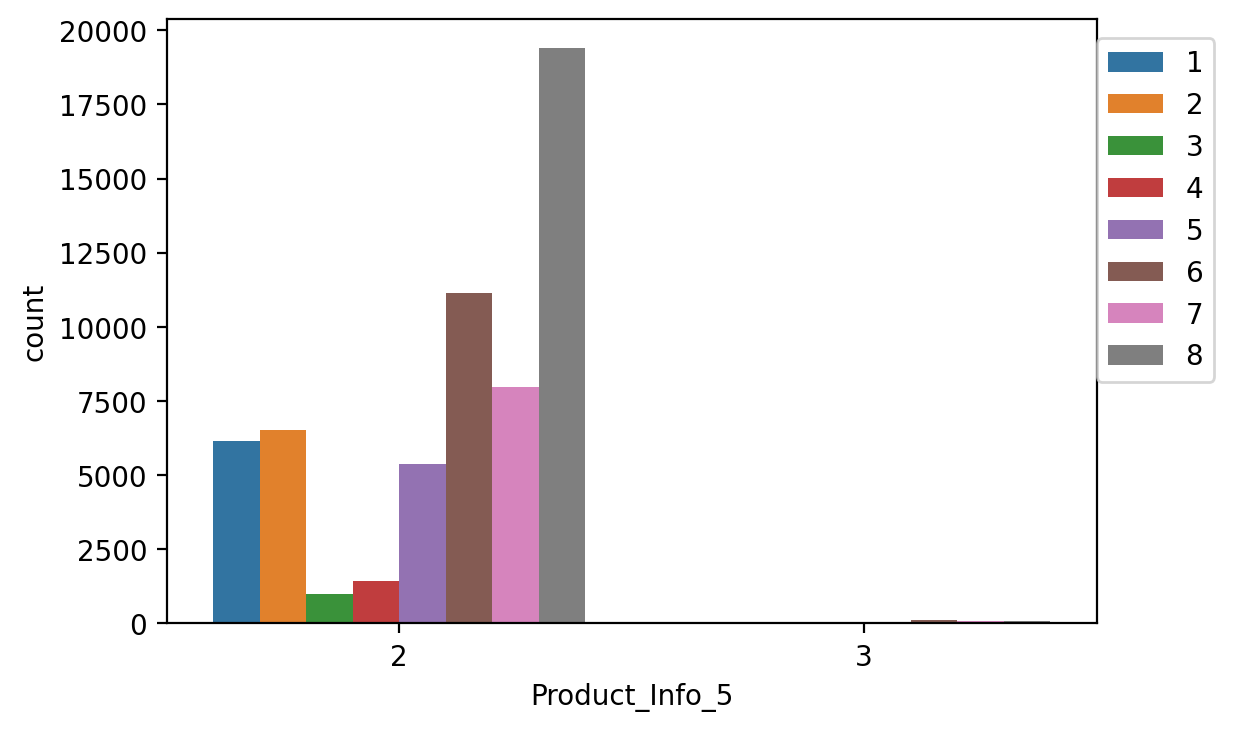

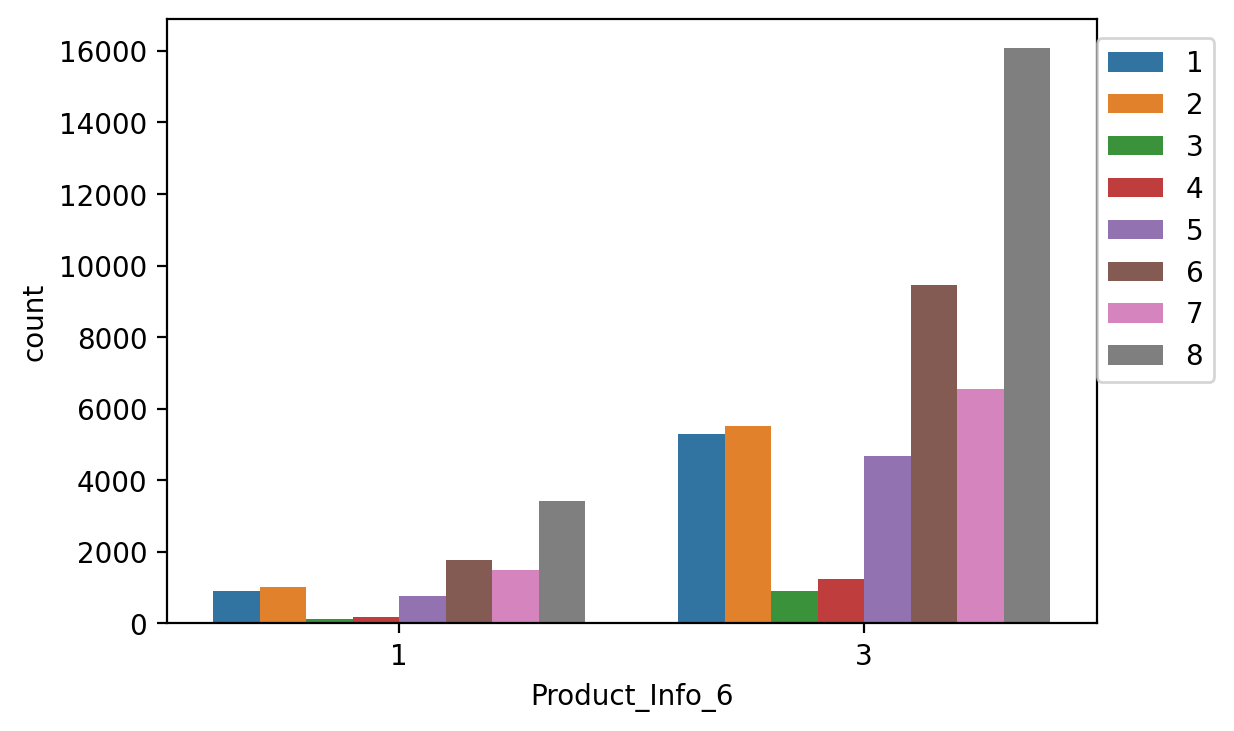

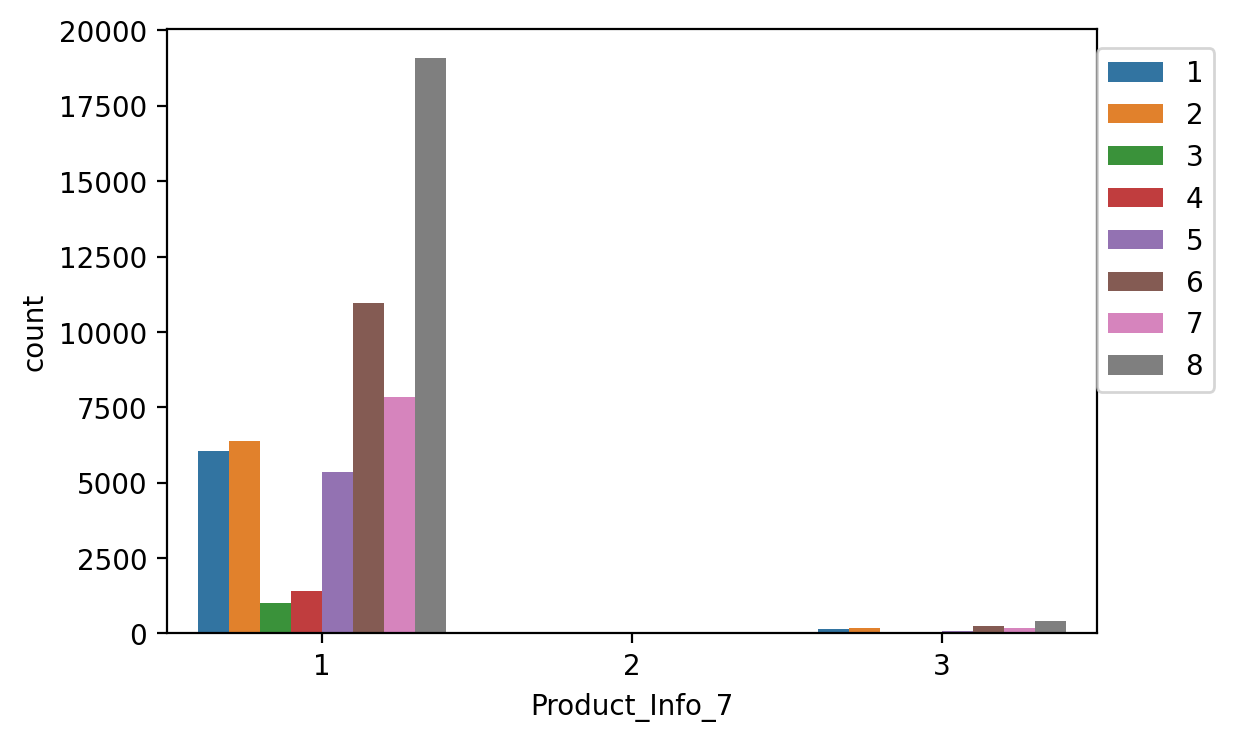

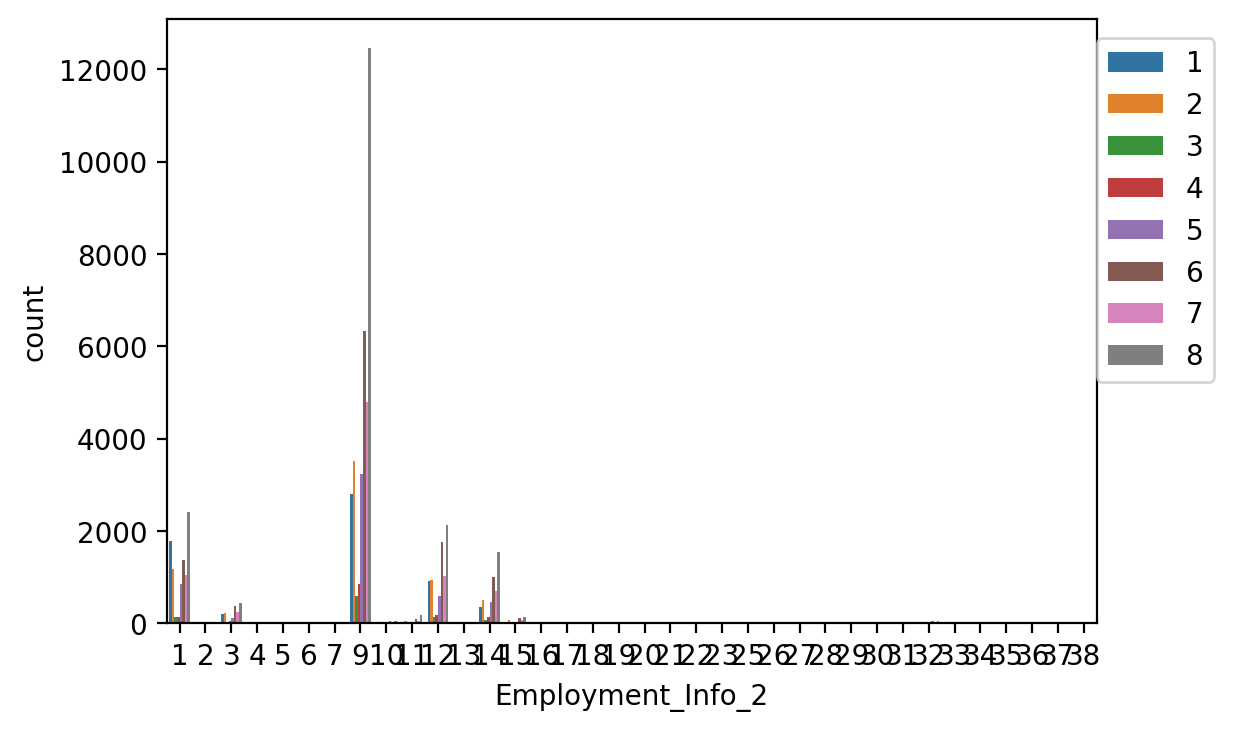

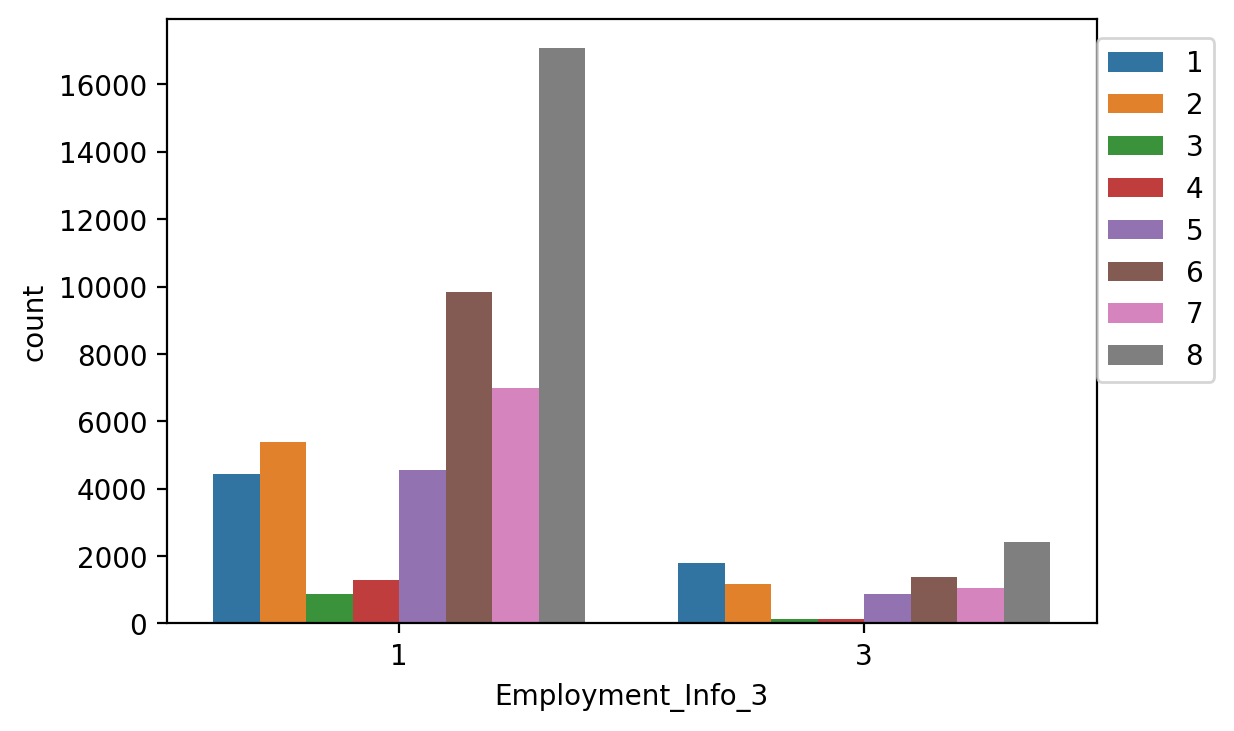

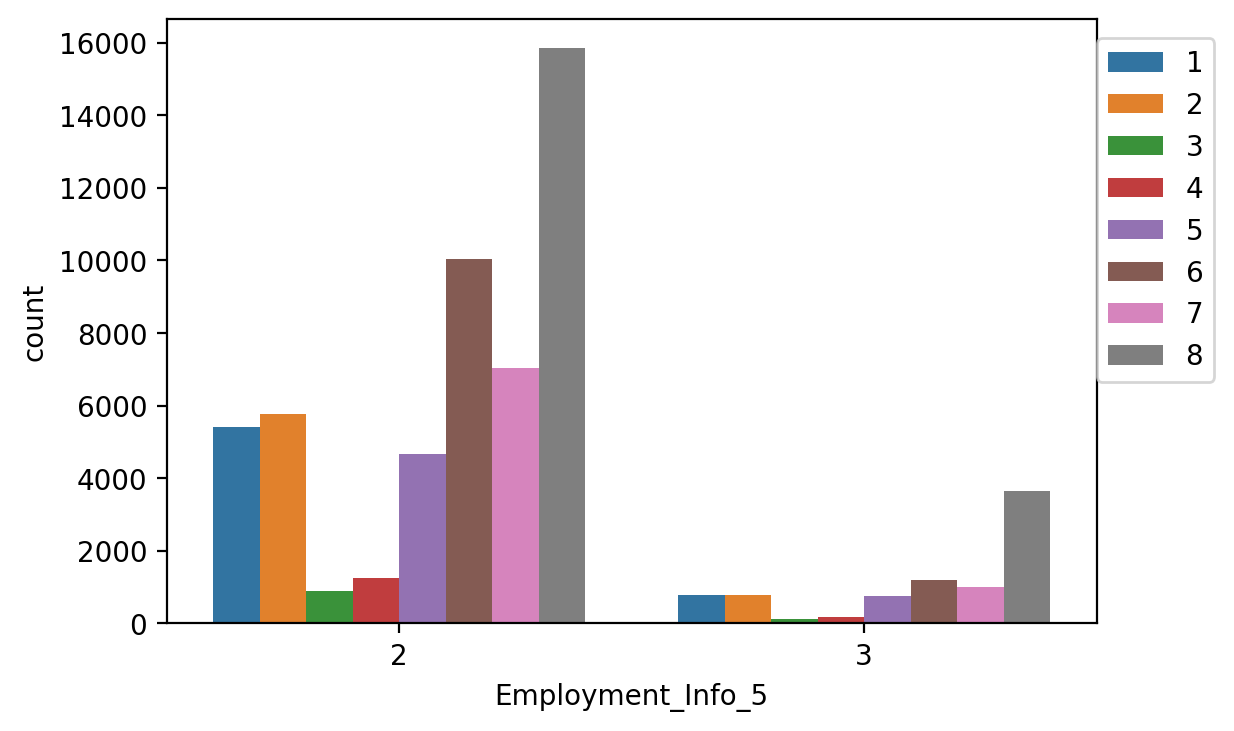

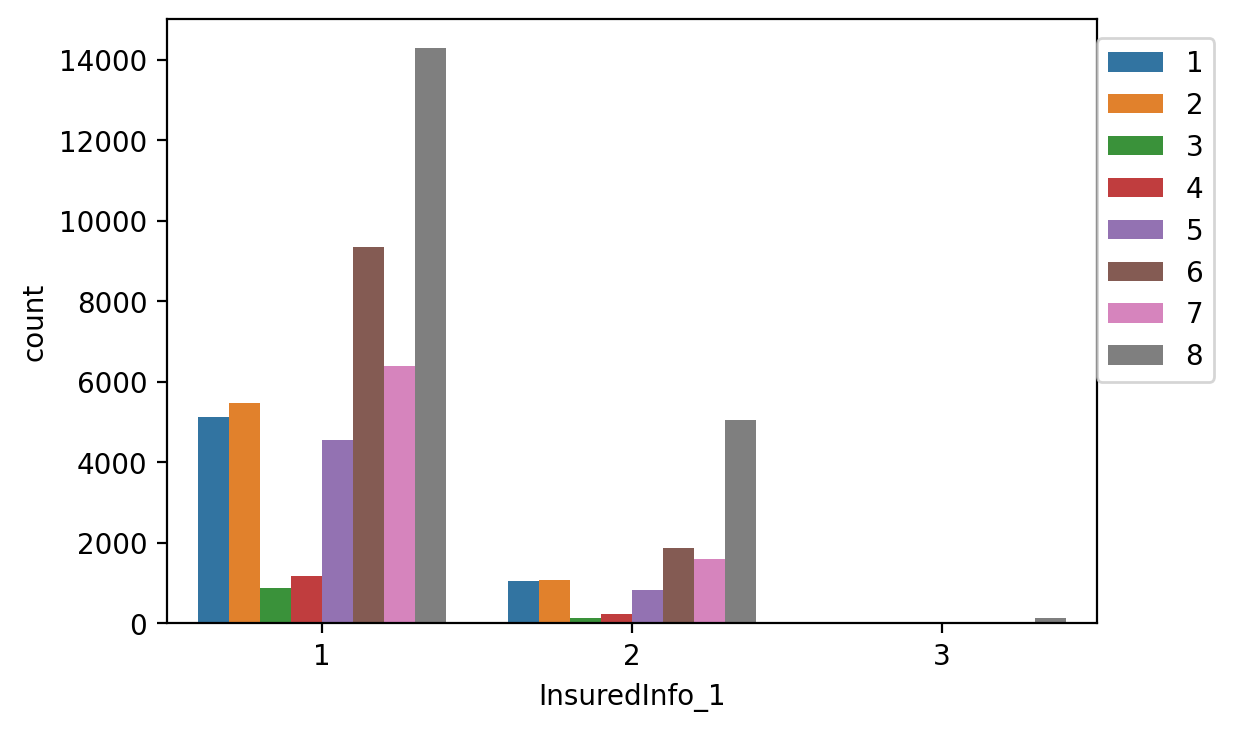

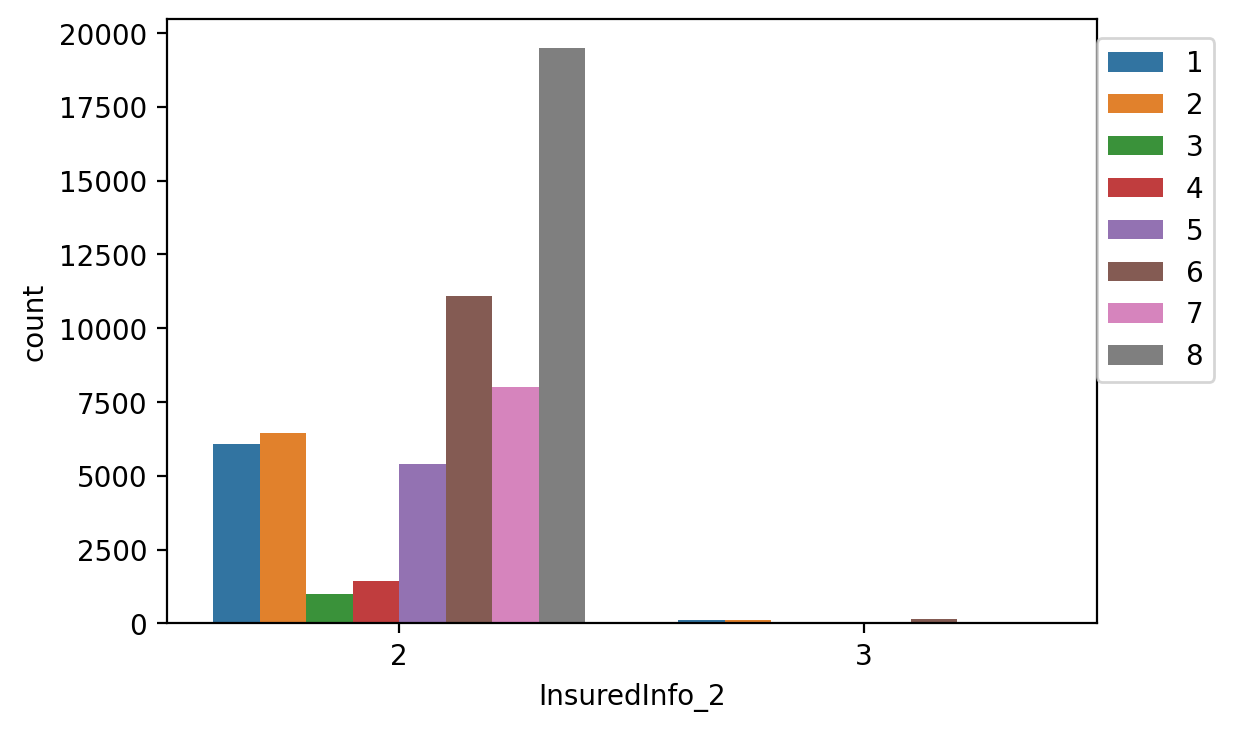

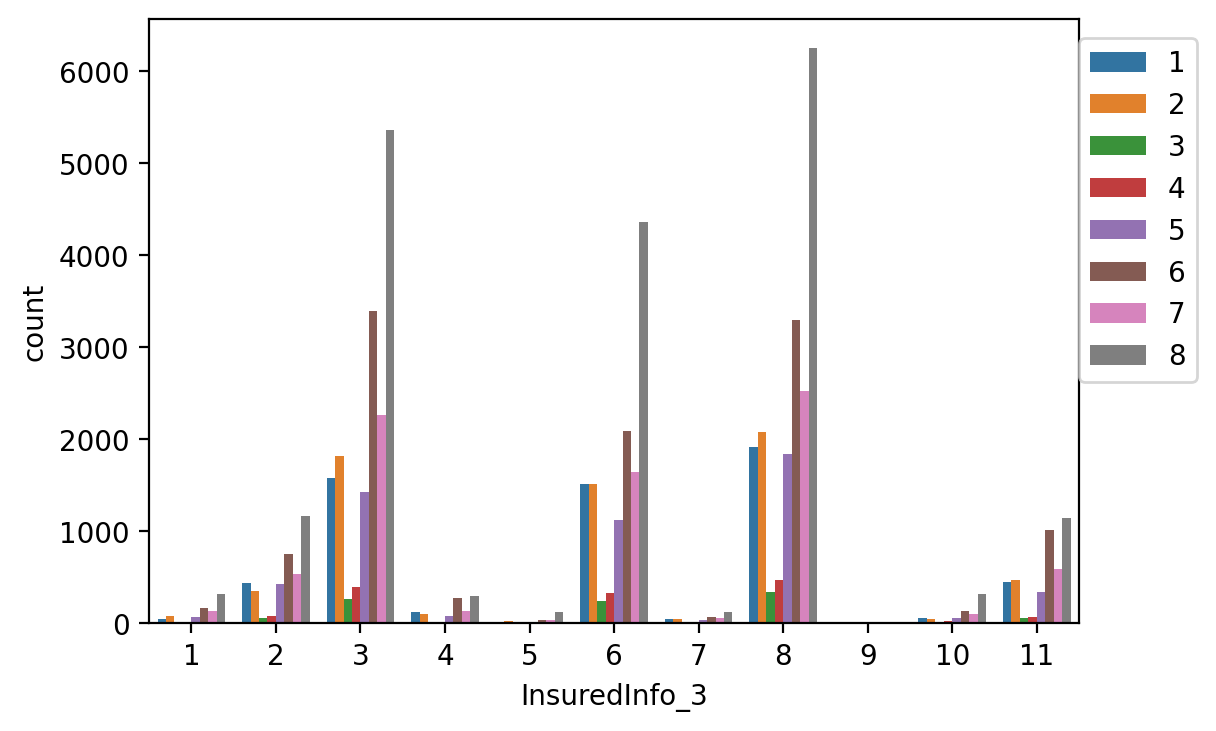

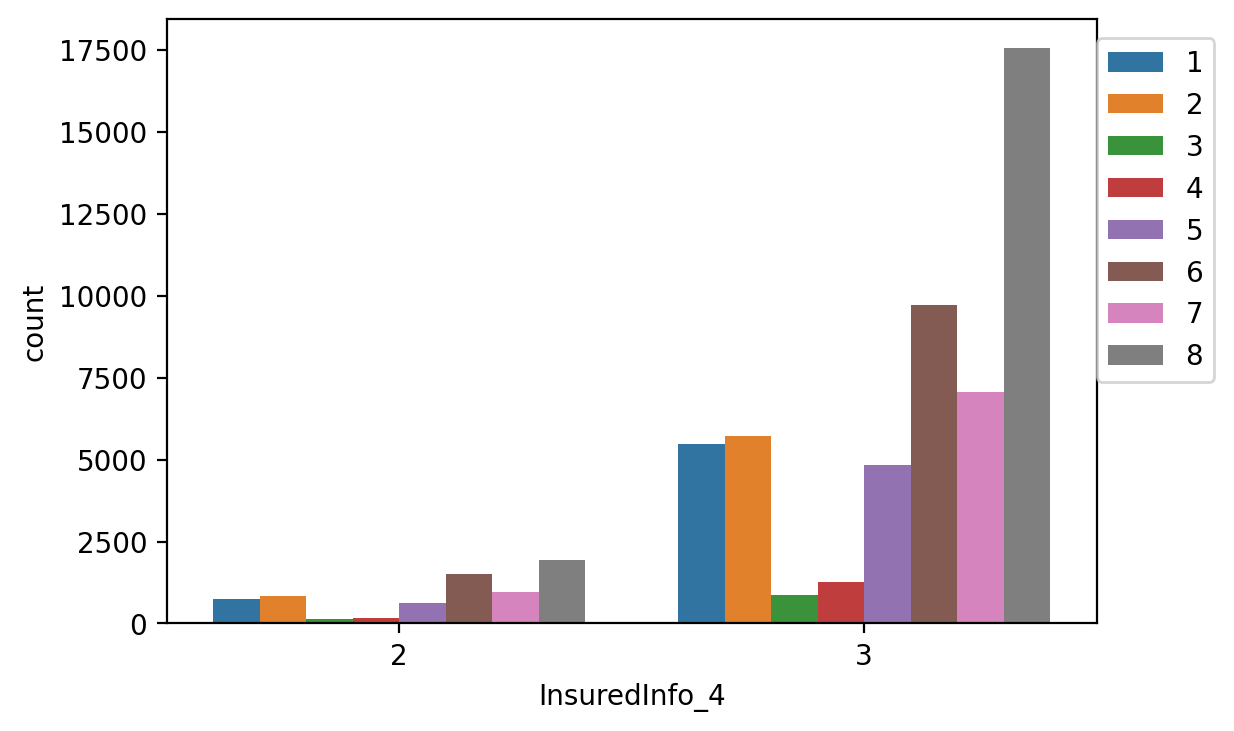

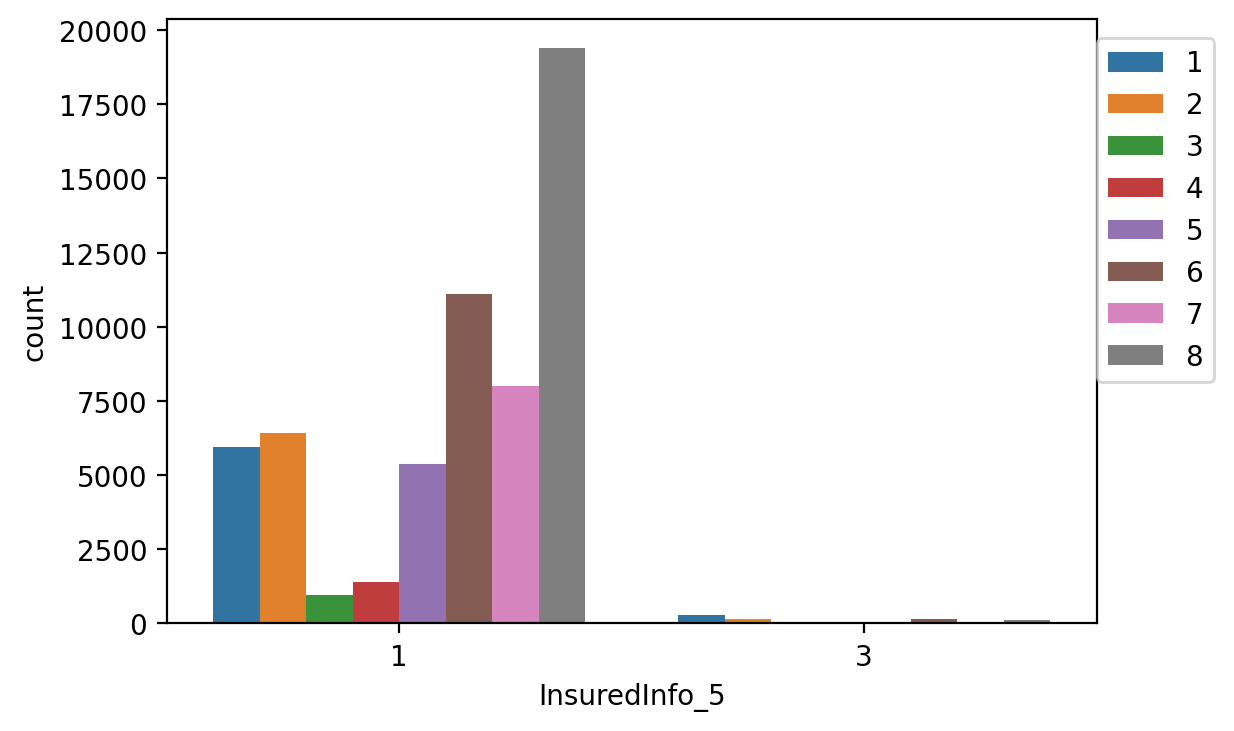

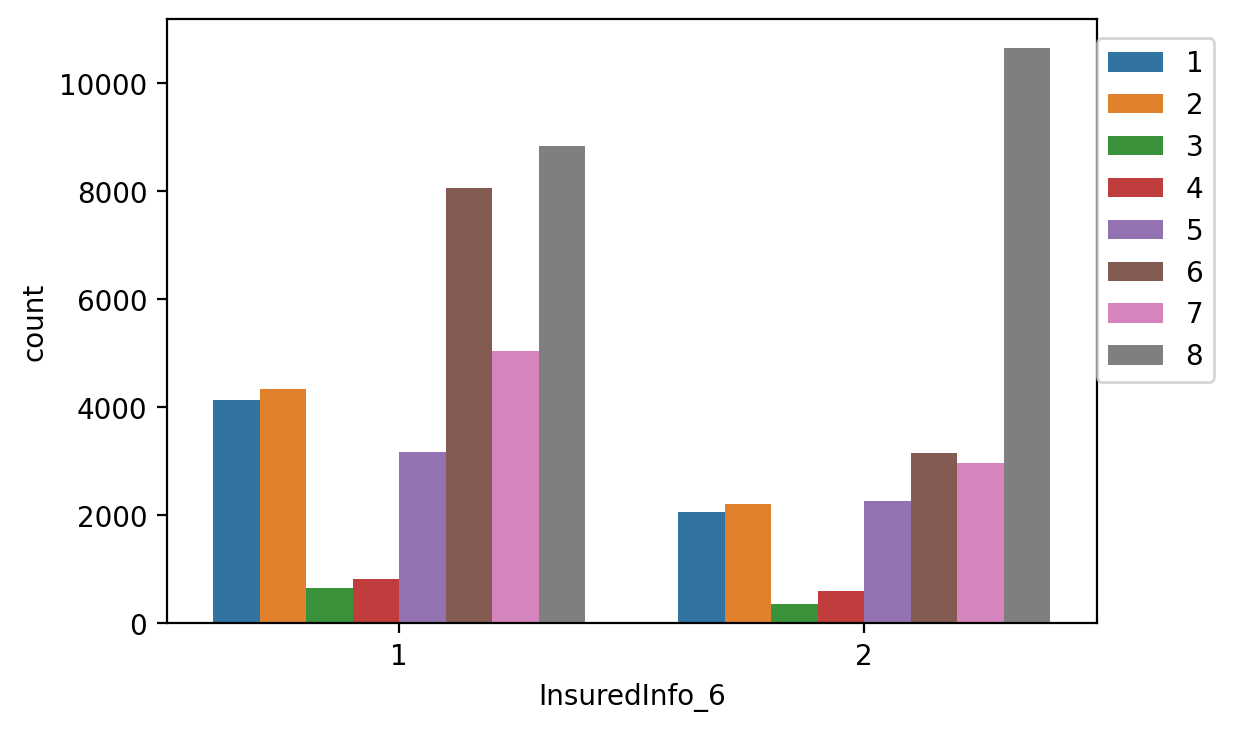

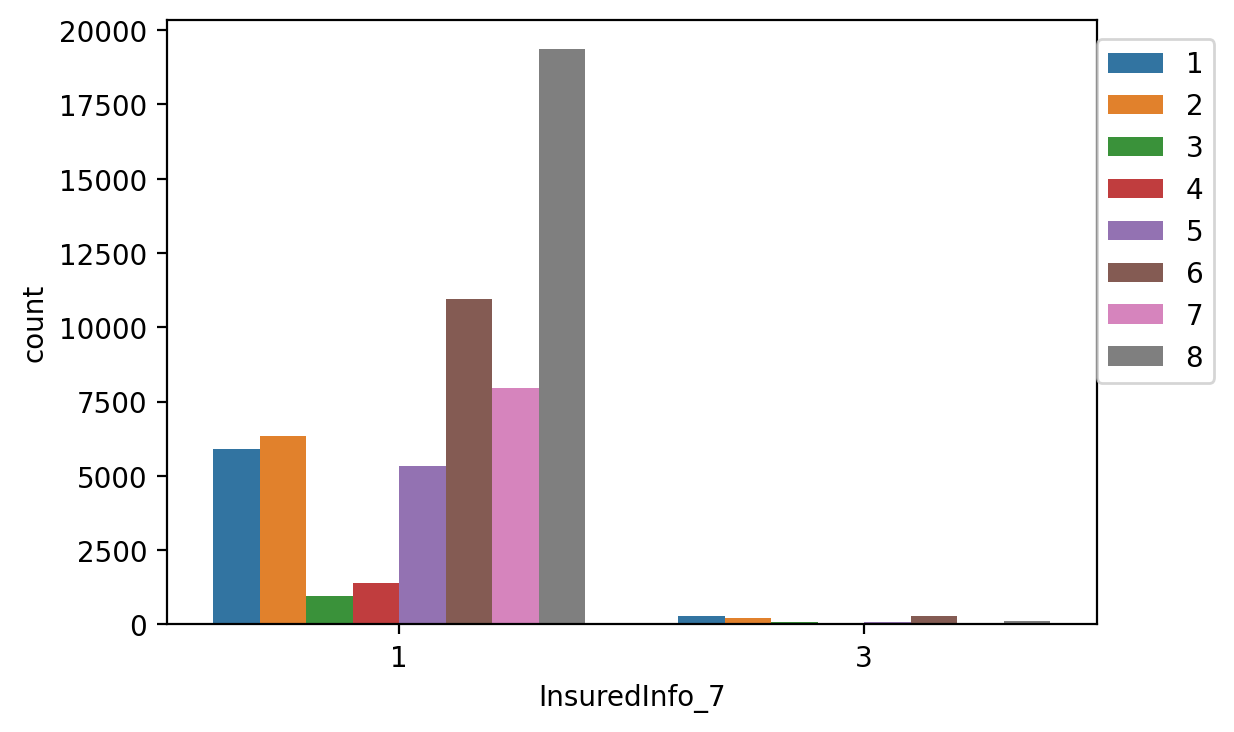

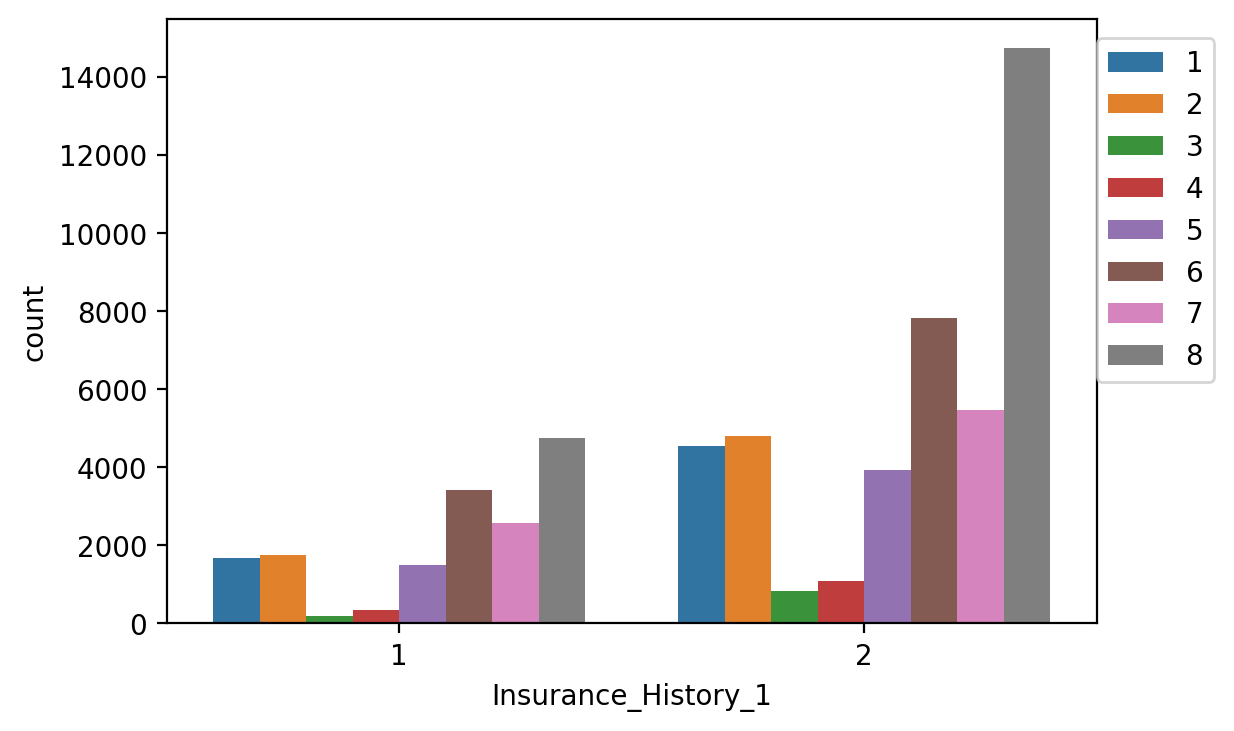

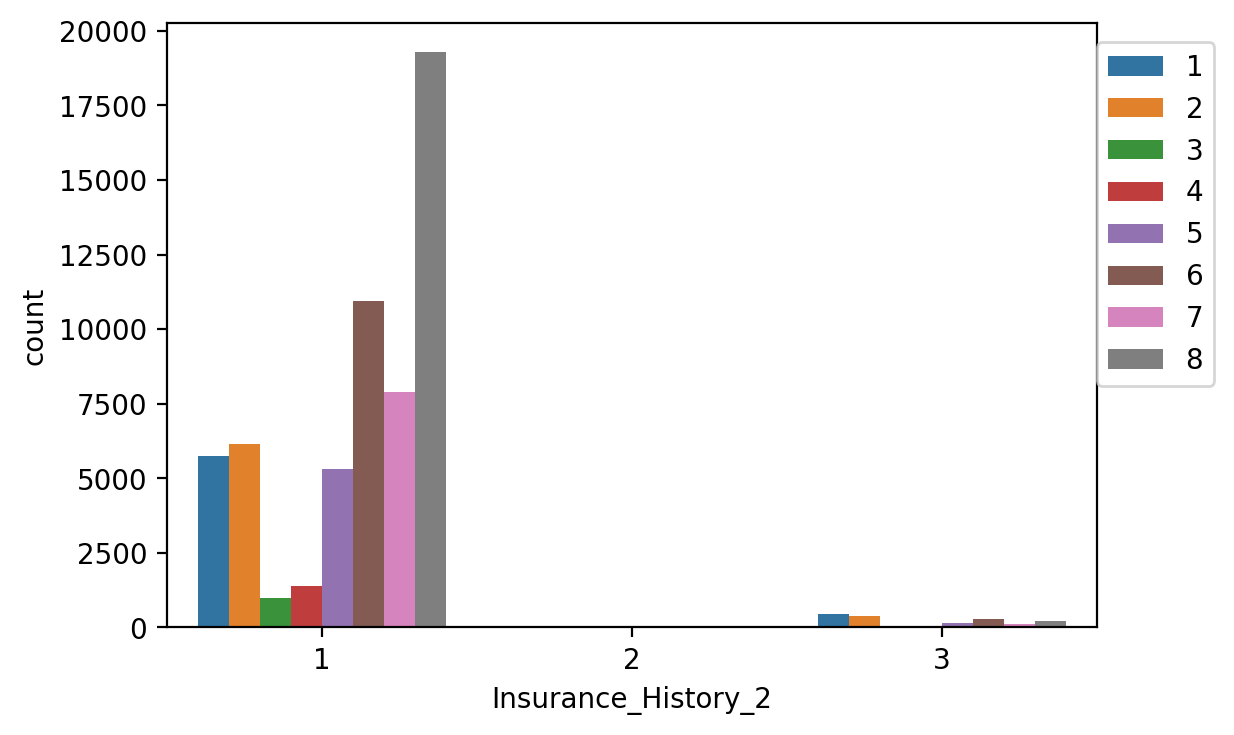

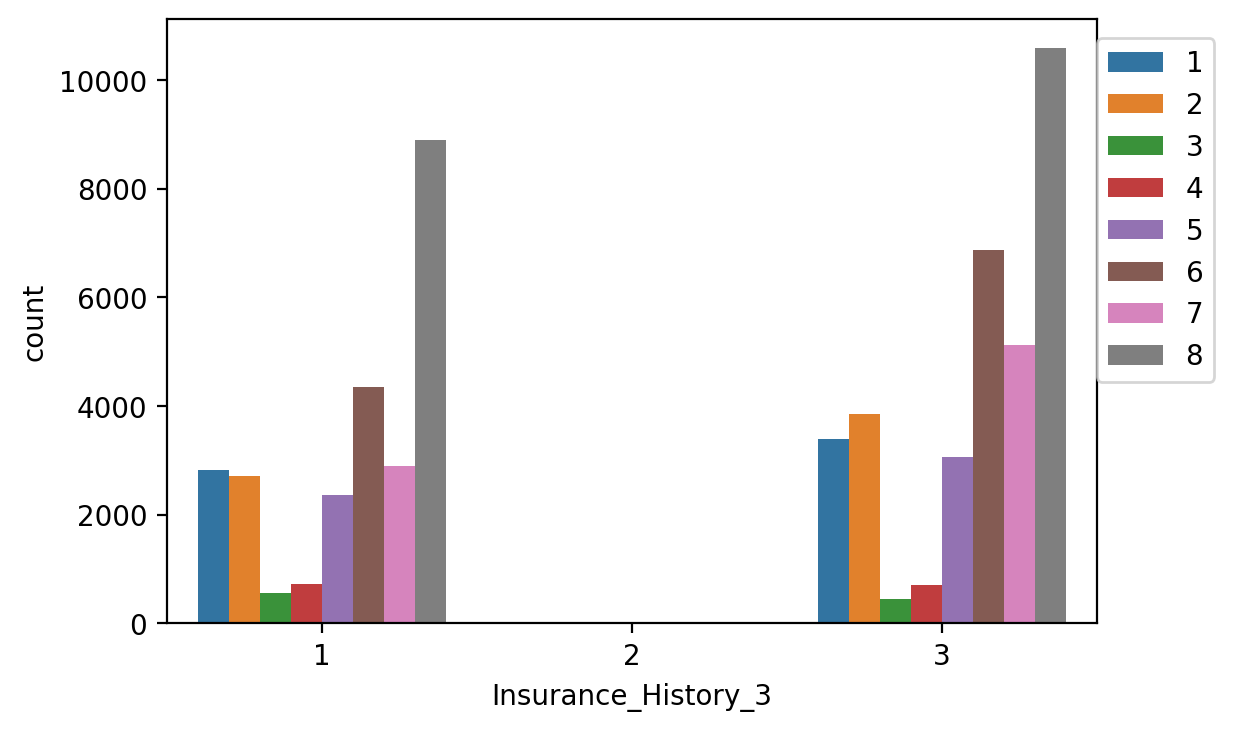

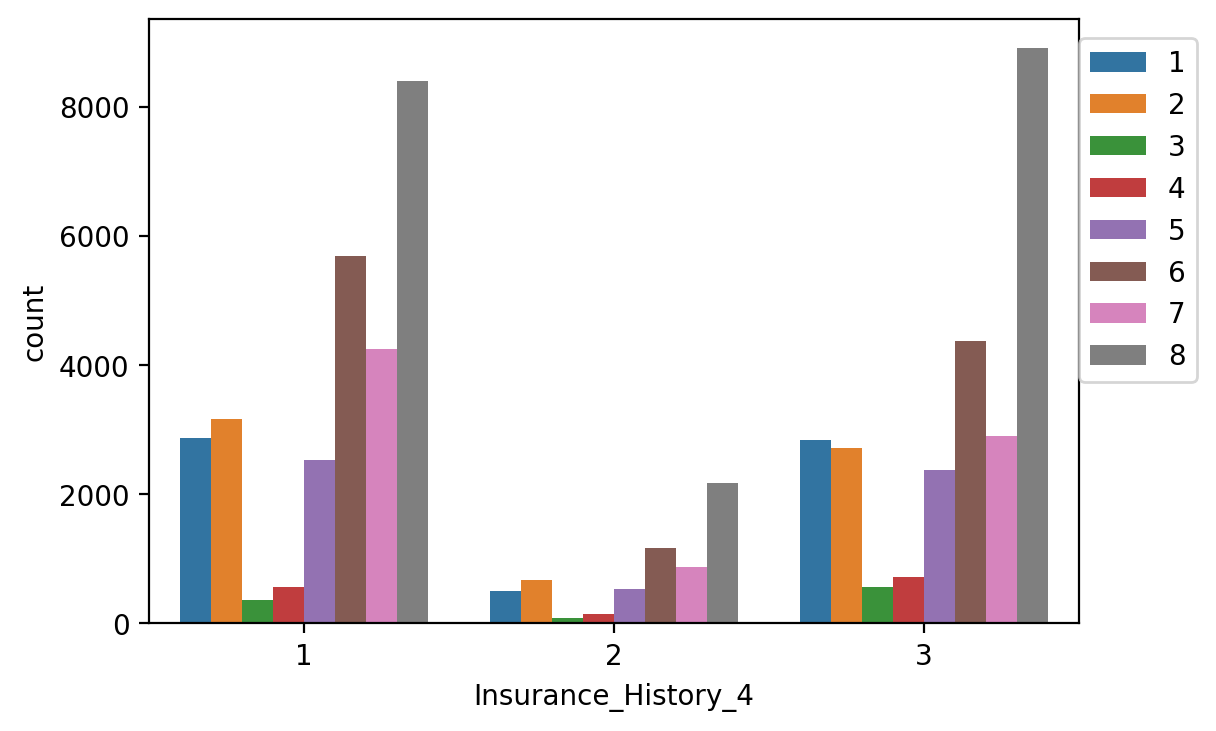

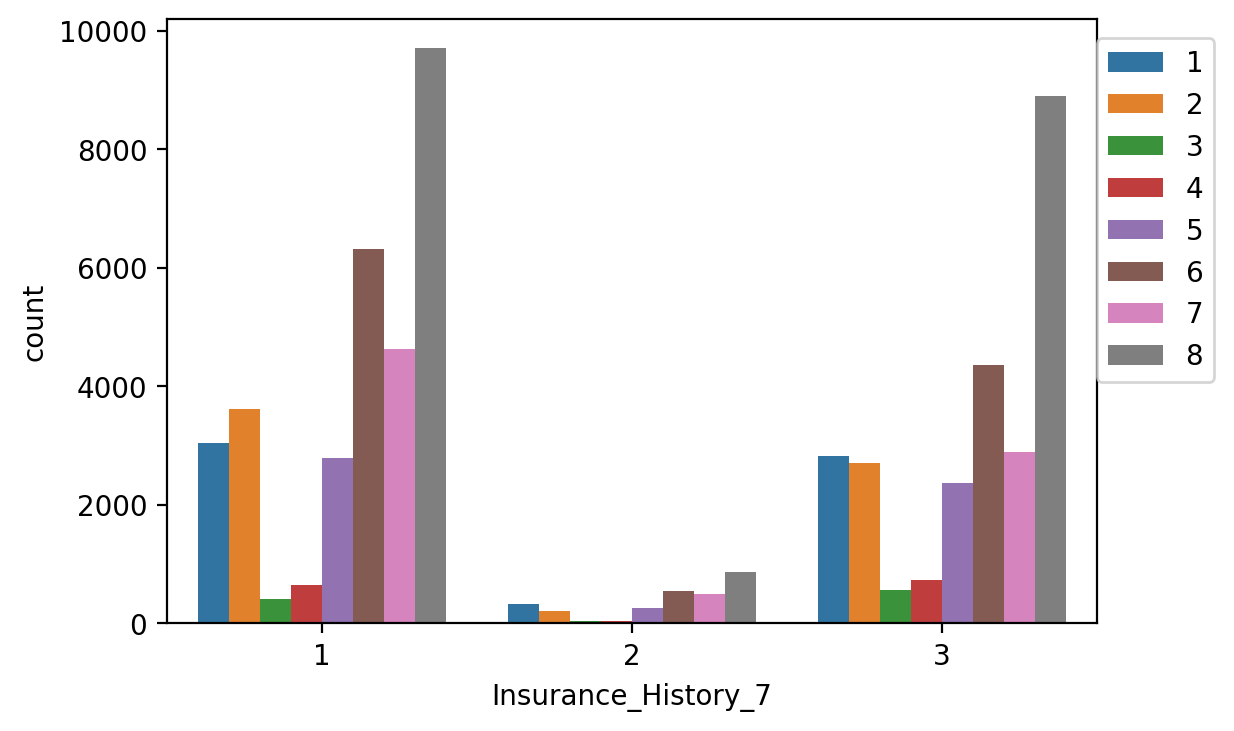

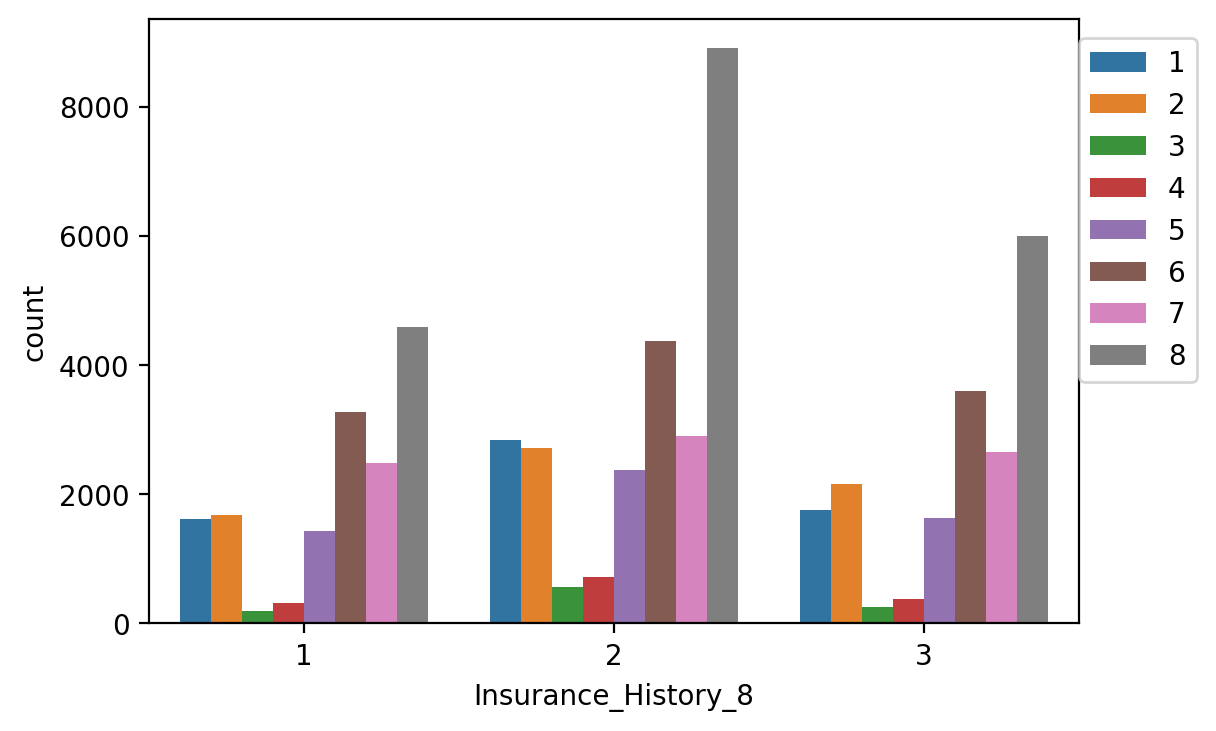

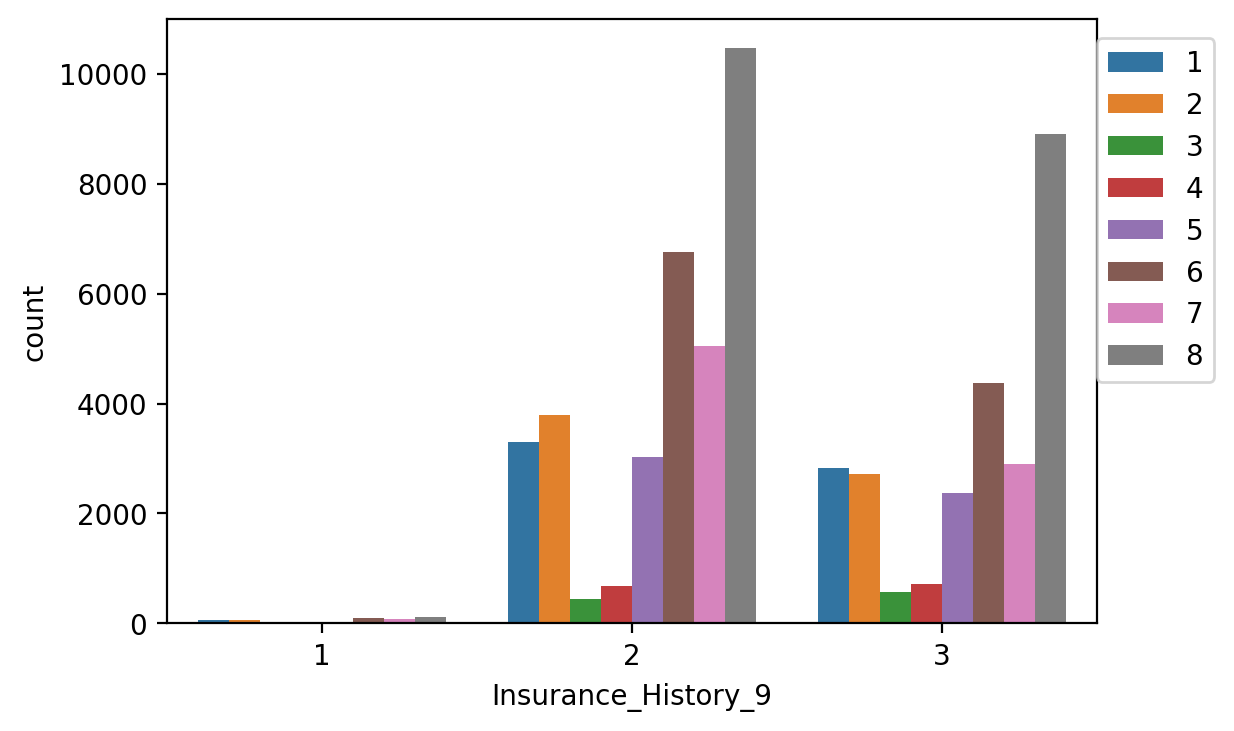

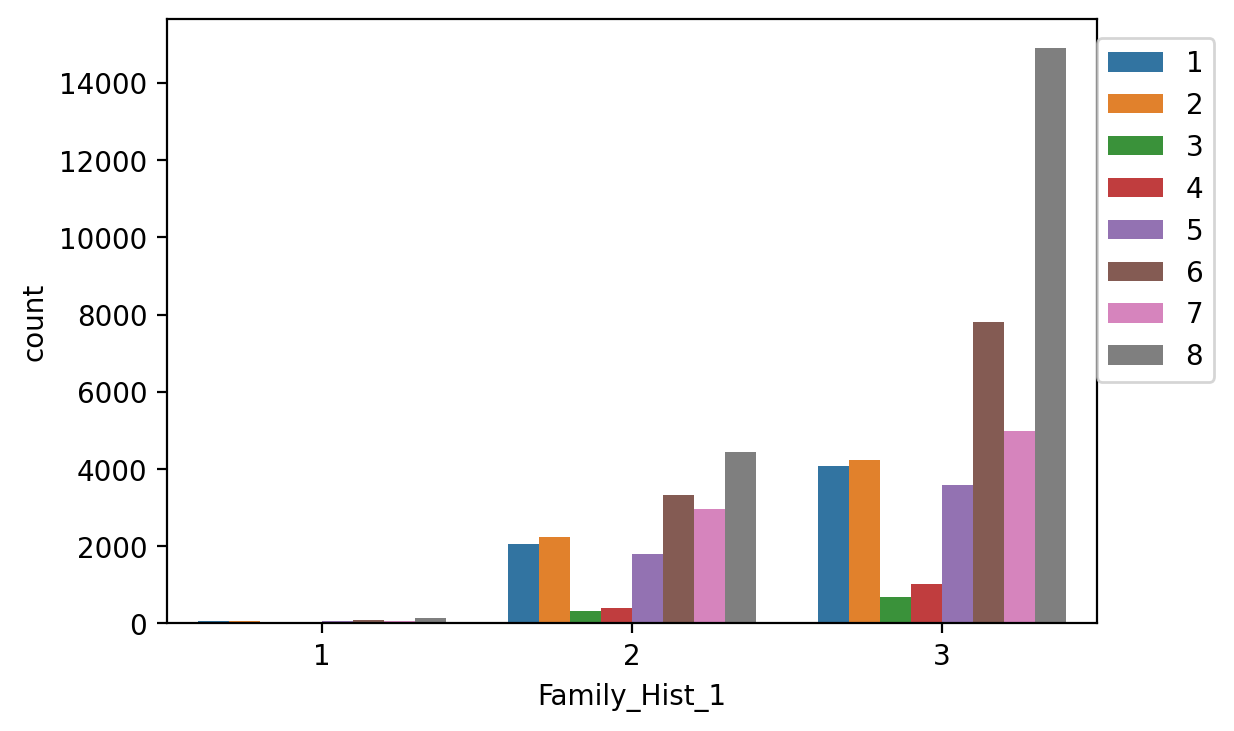

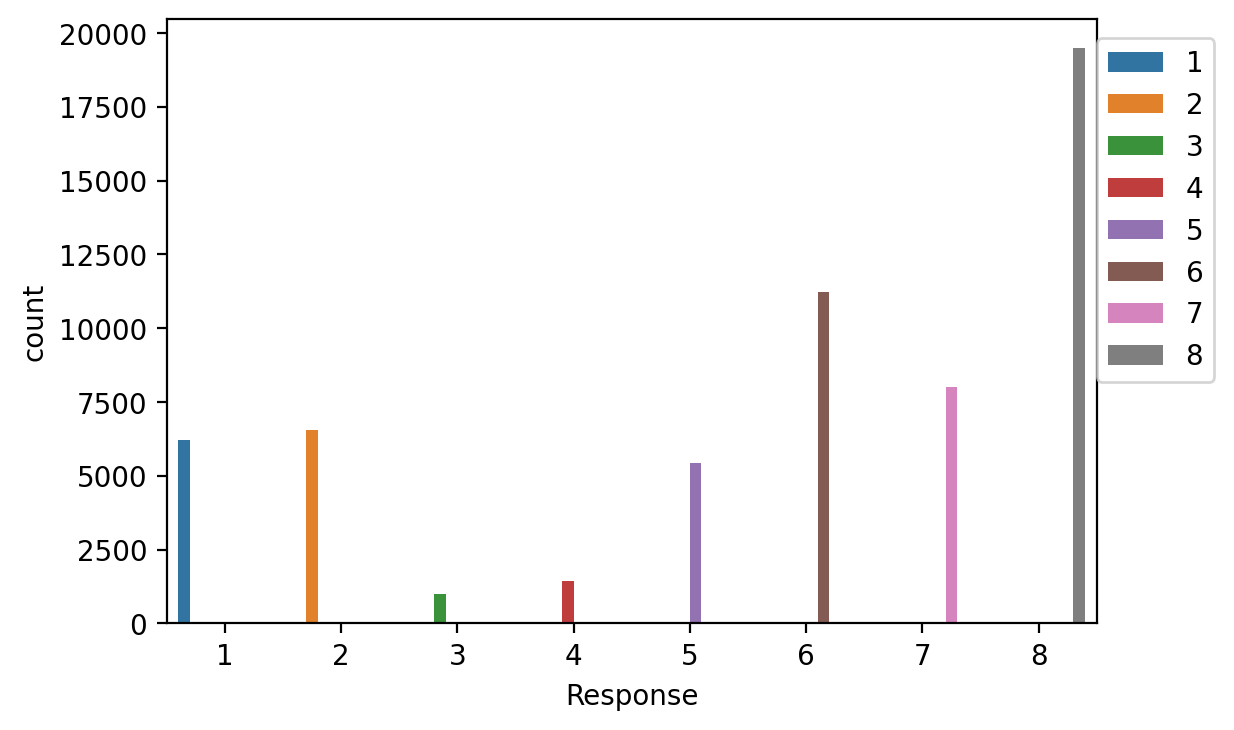

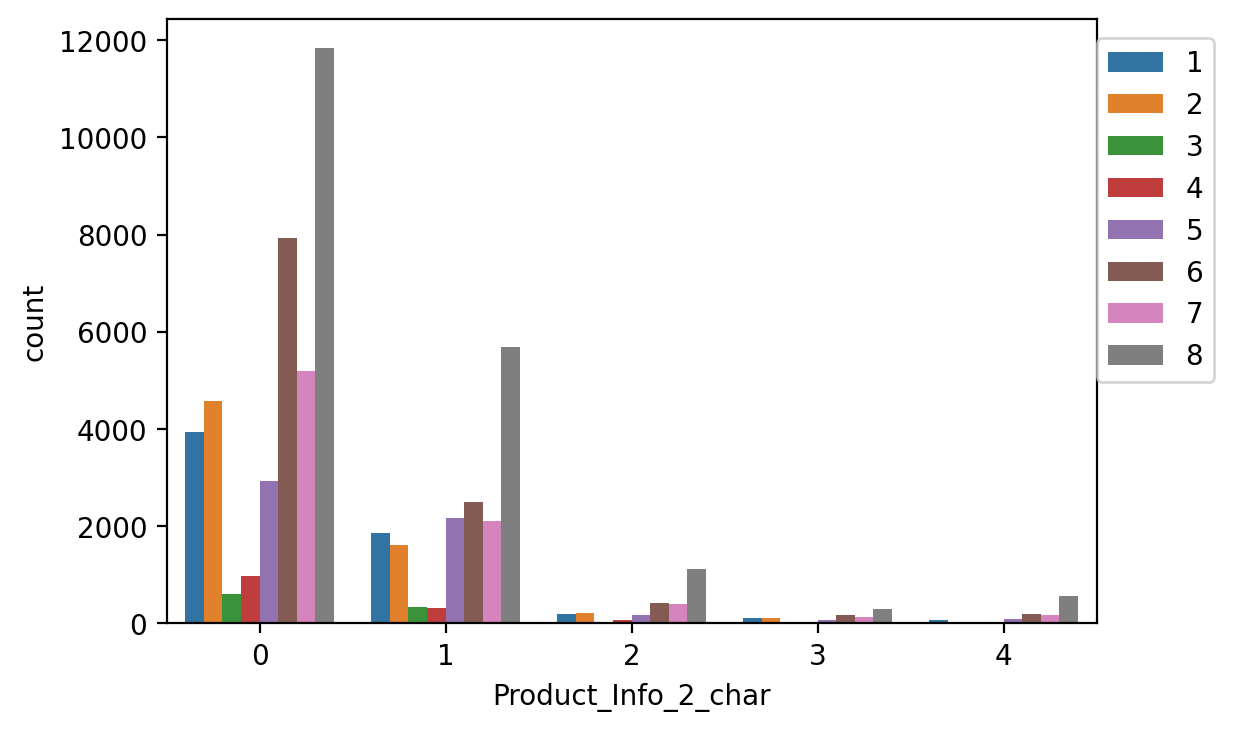

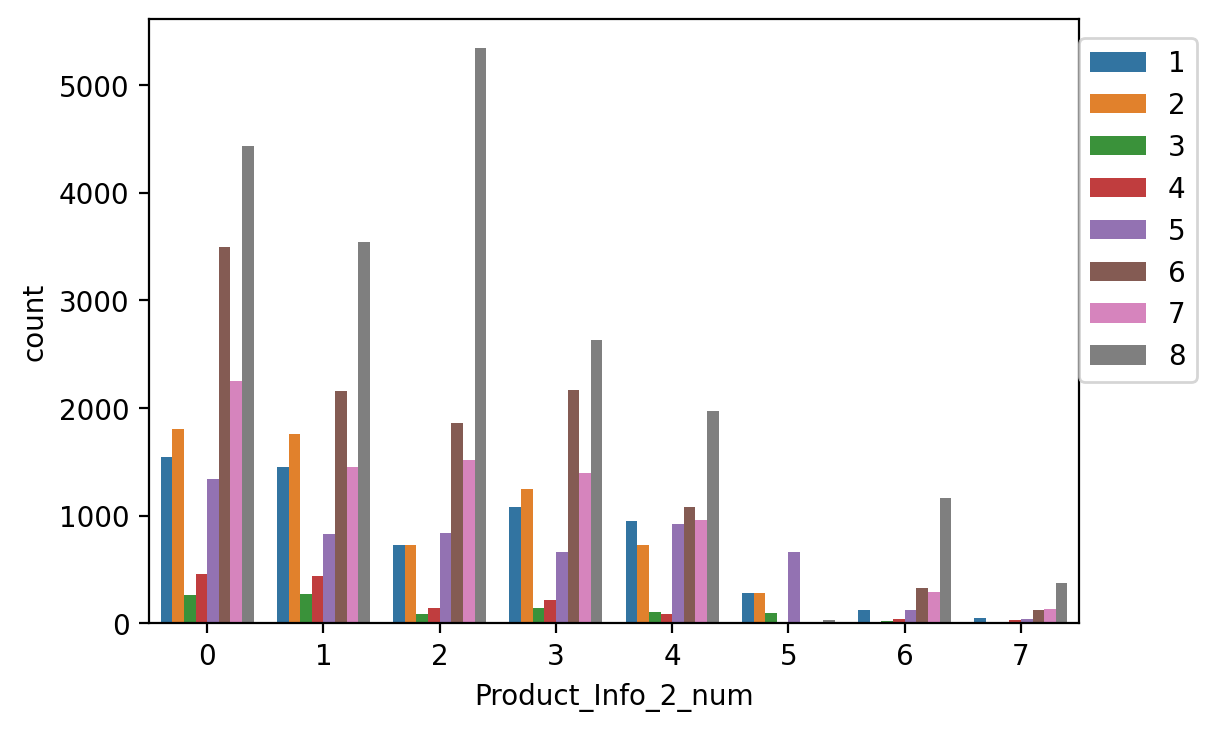

In [131]:
for col in df.select_dtypes(['int64']).columns:
    if col not in medical_history_cols and col not in medical_keywords_cols: 
        plt.figure(dpi = 200)
        sns.countplot(x = df[col], hue = df['Response'])
        plt.legend(loc = [1,0.4])
        plt.show();

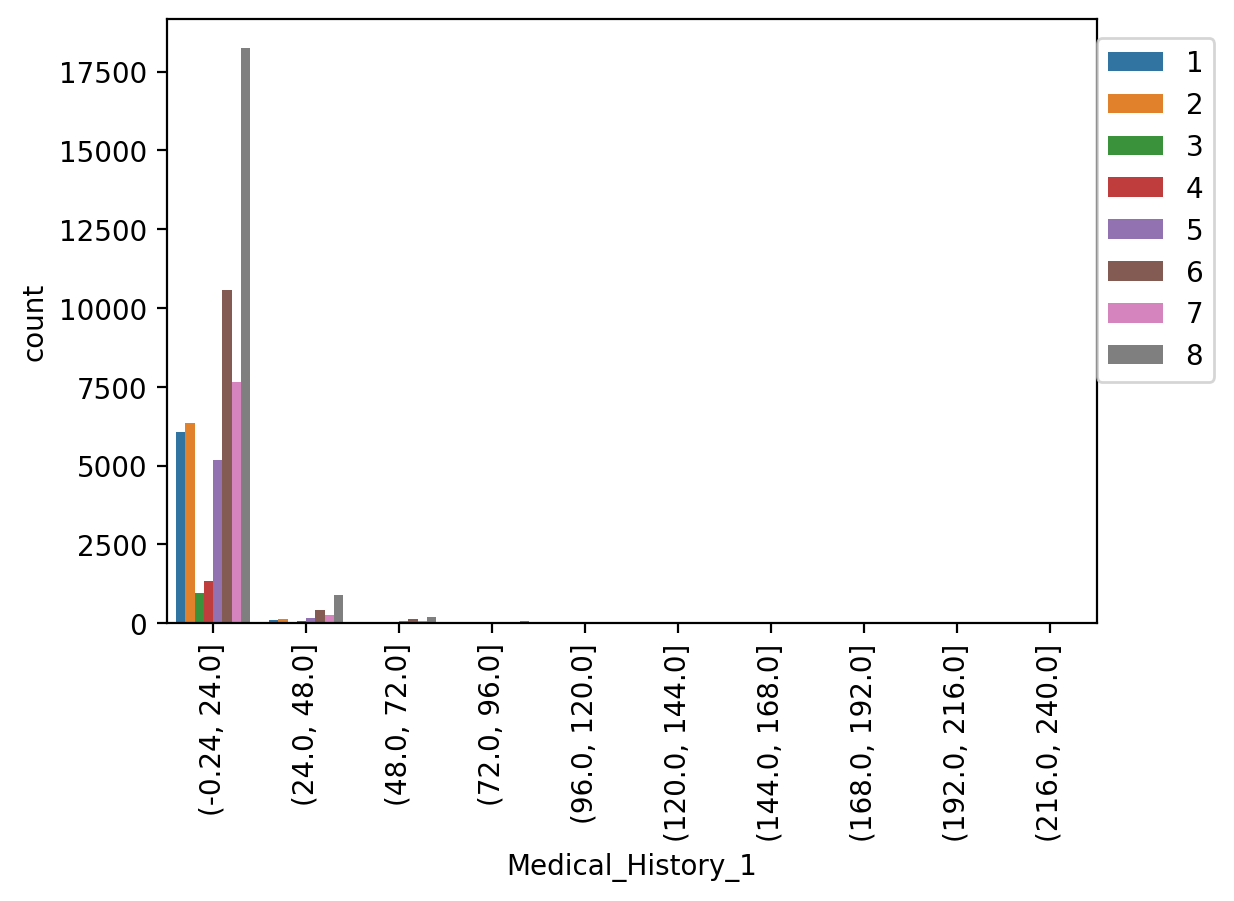

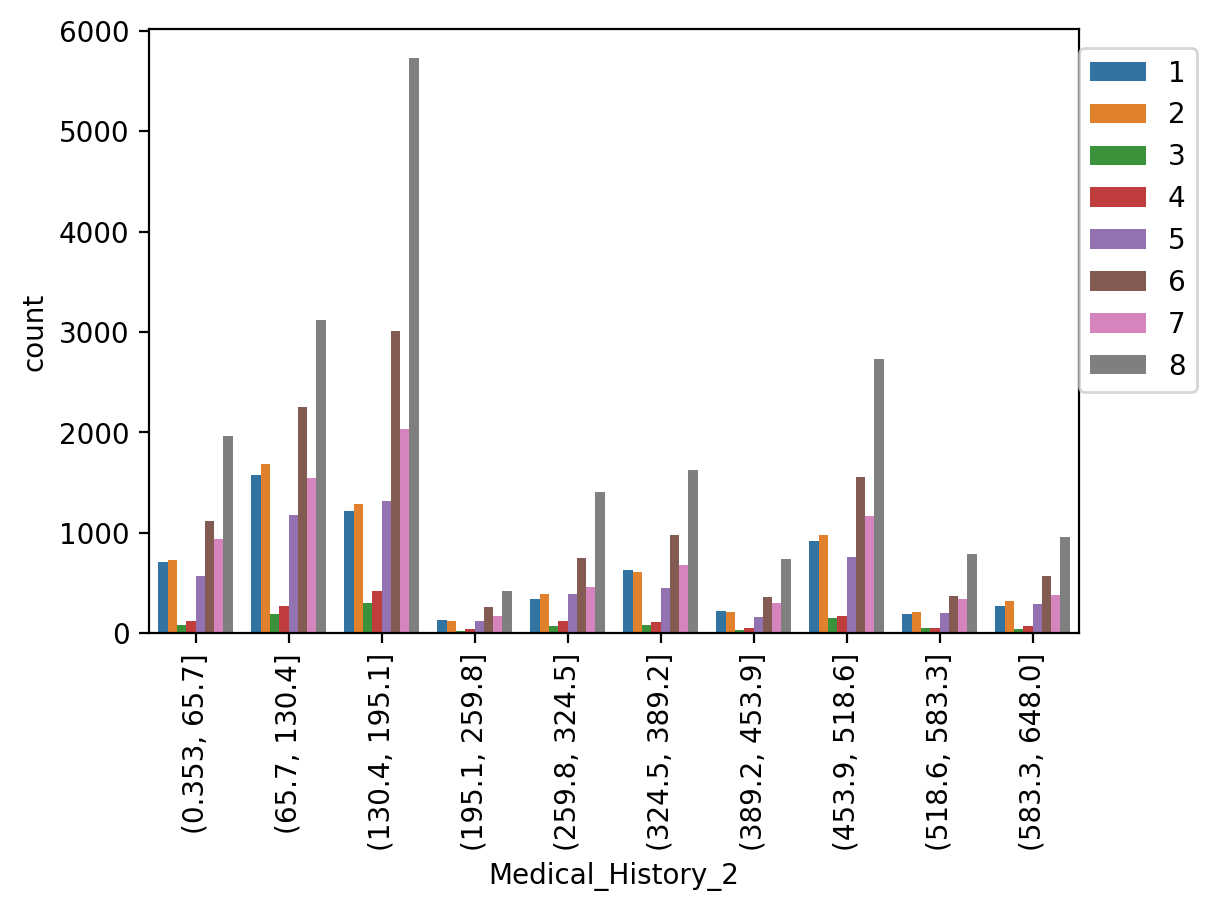

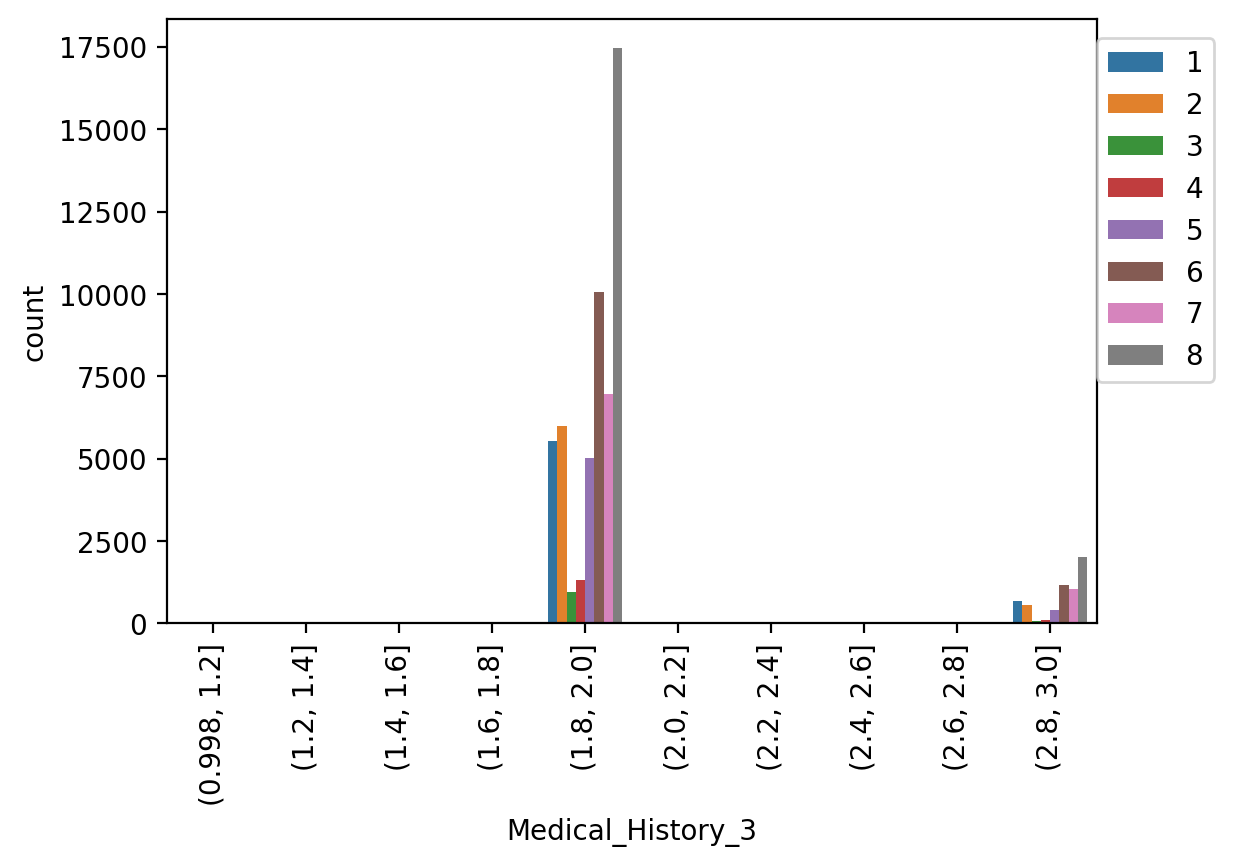

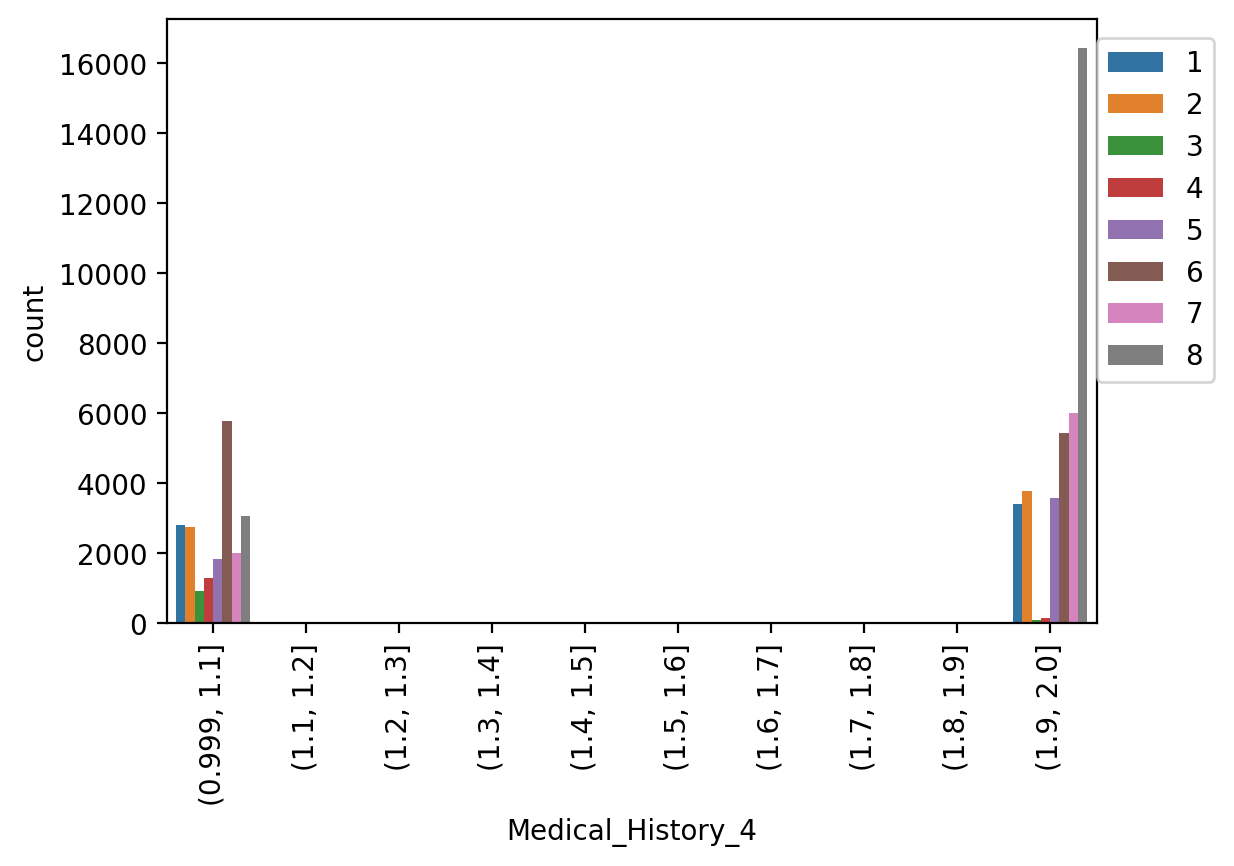

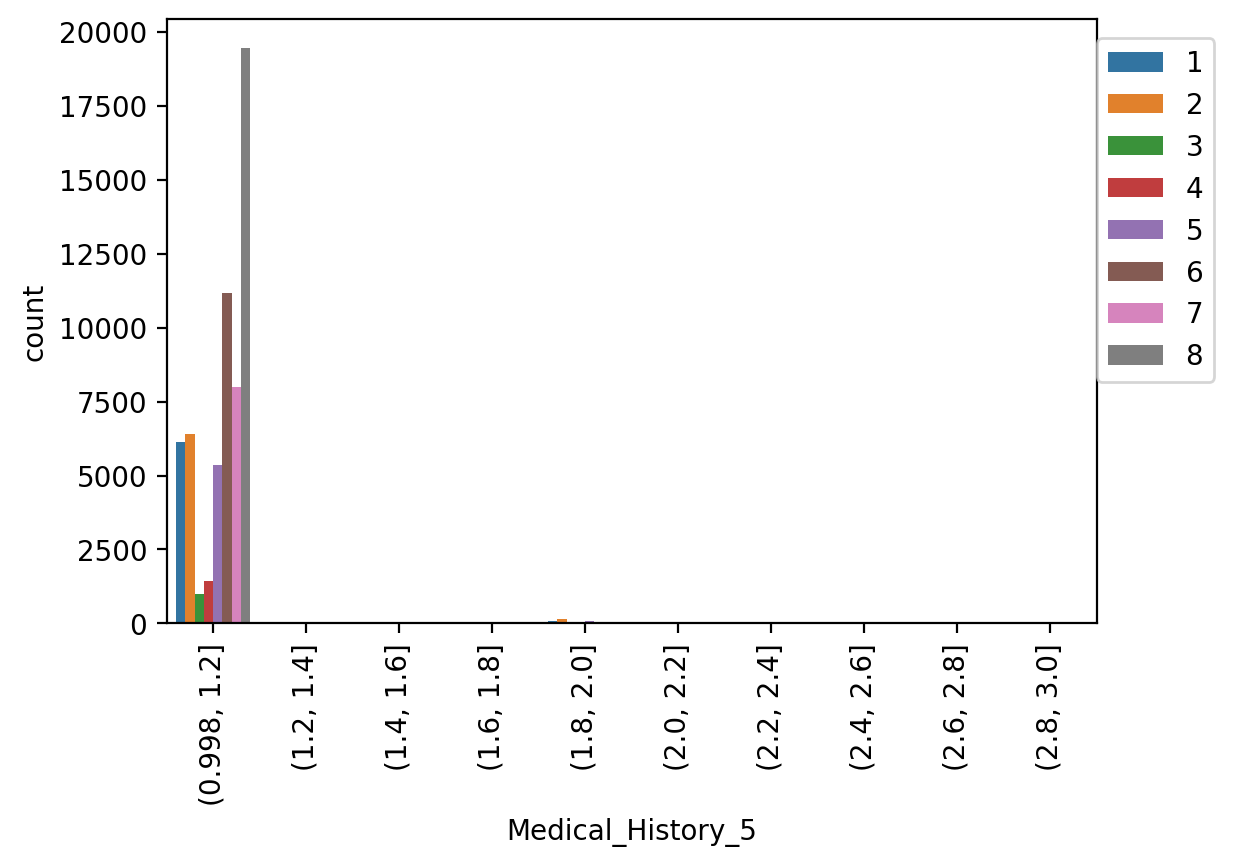

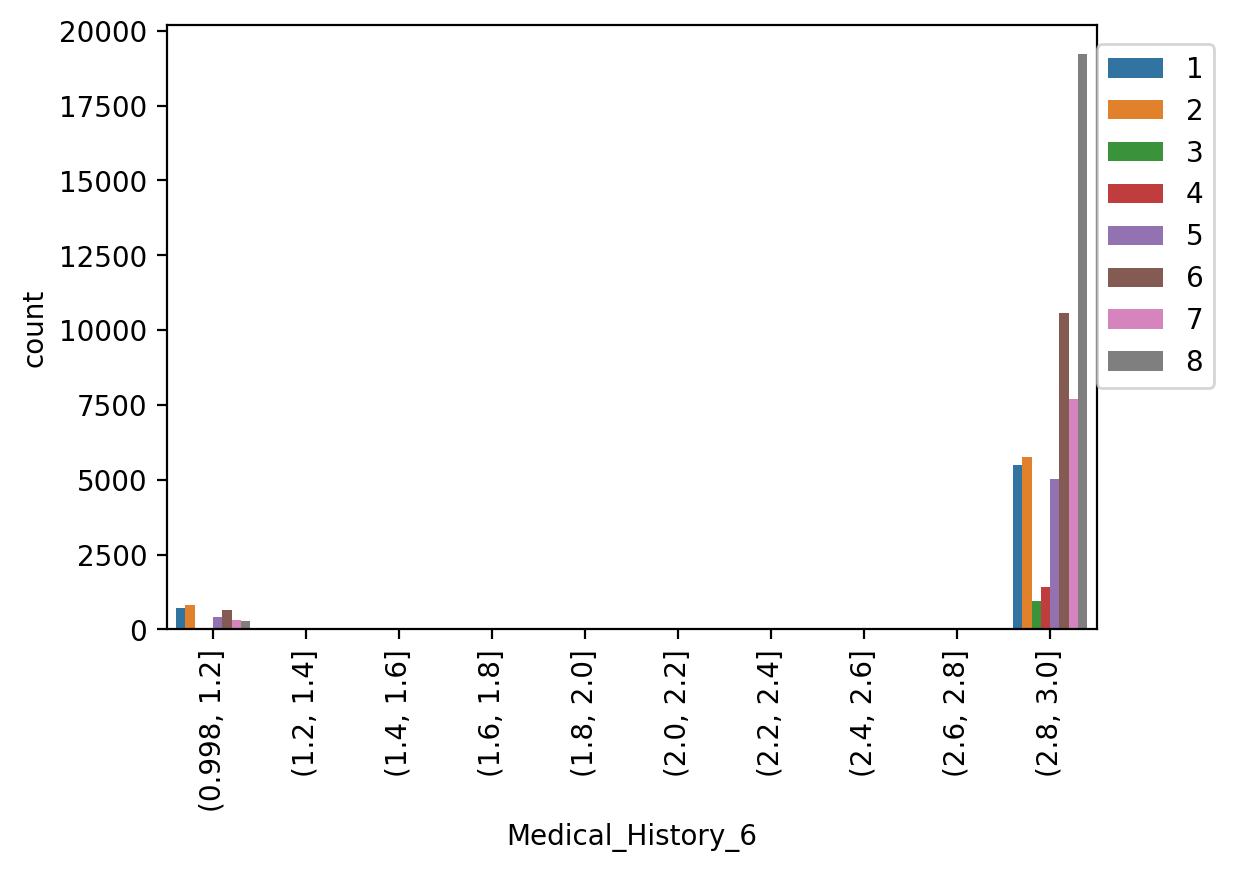

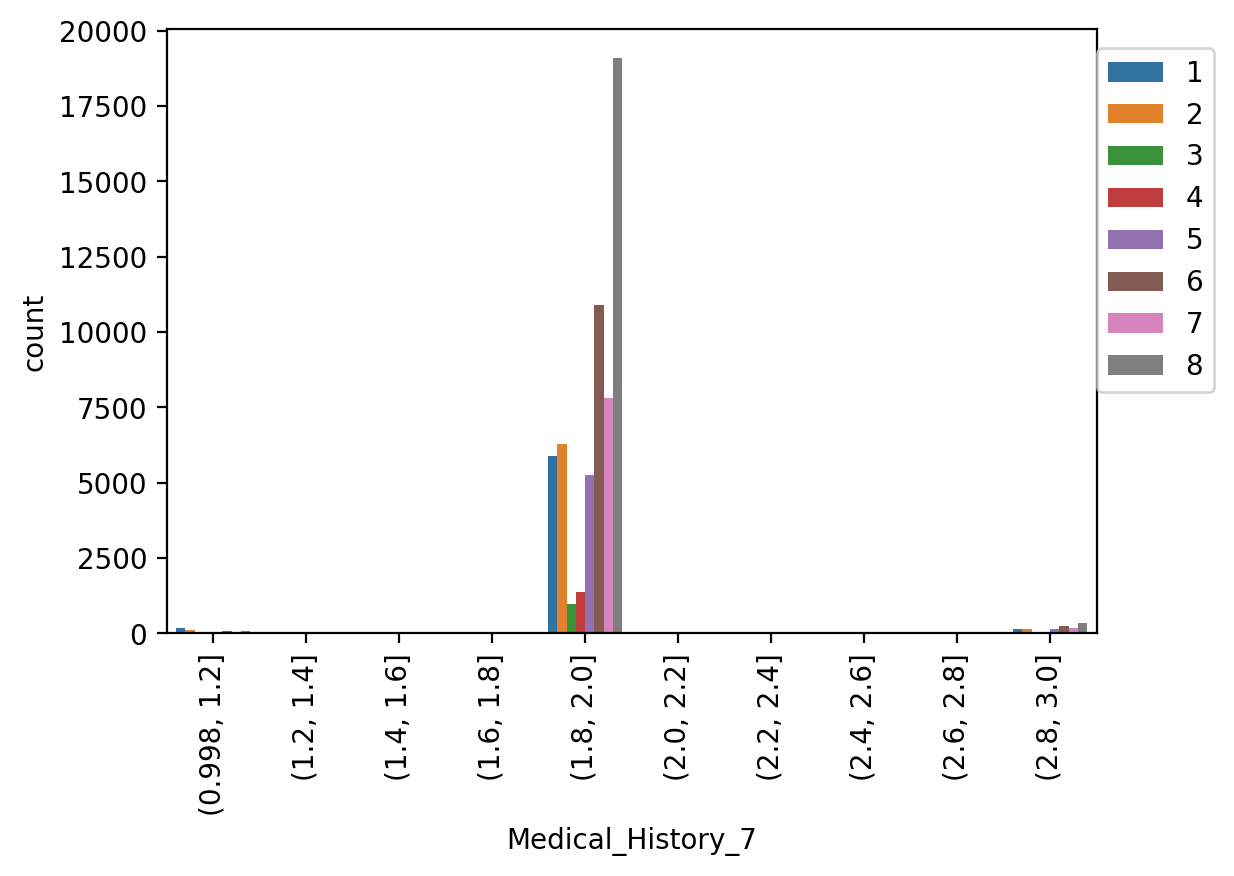

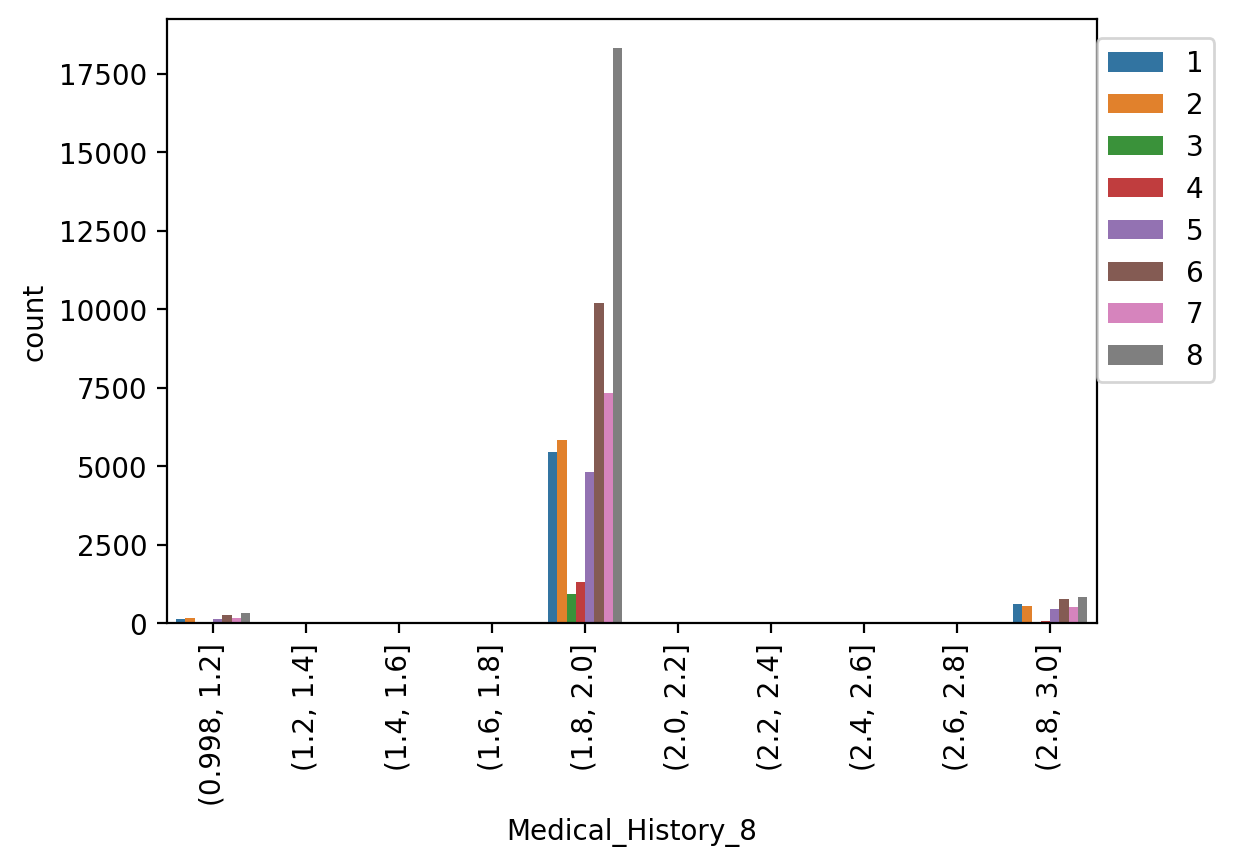

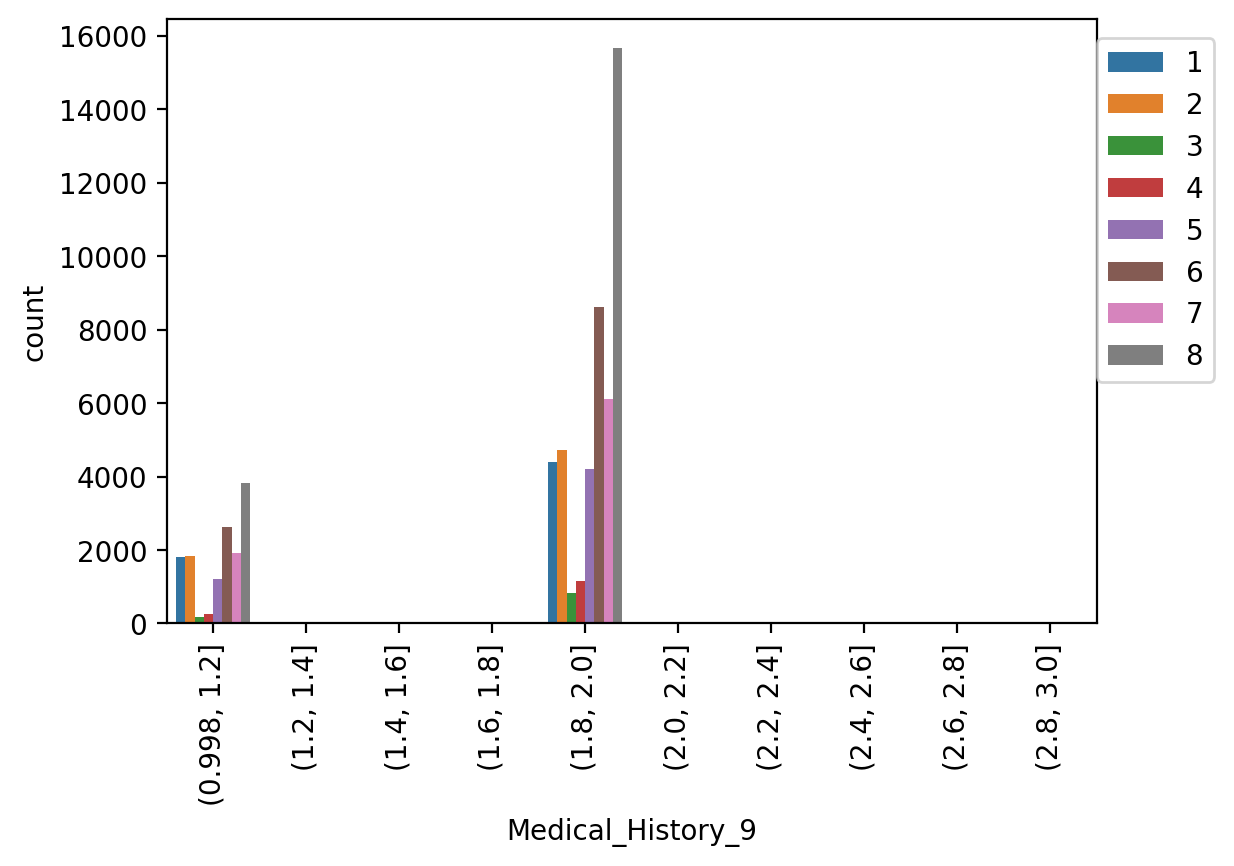

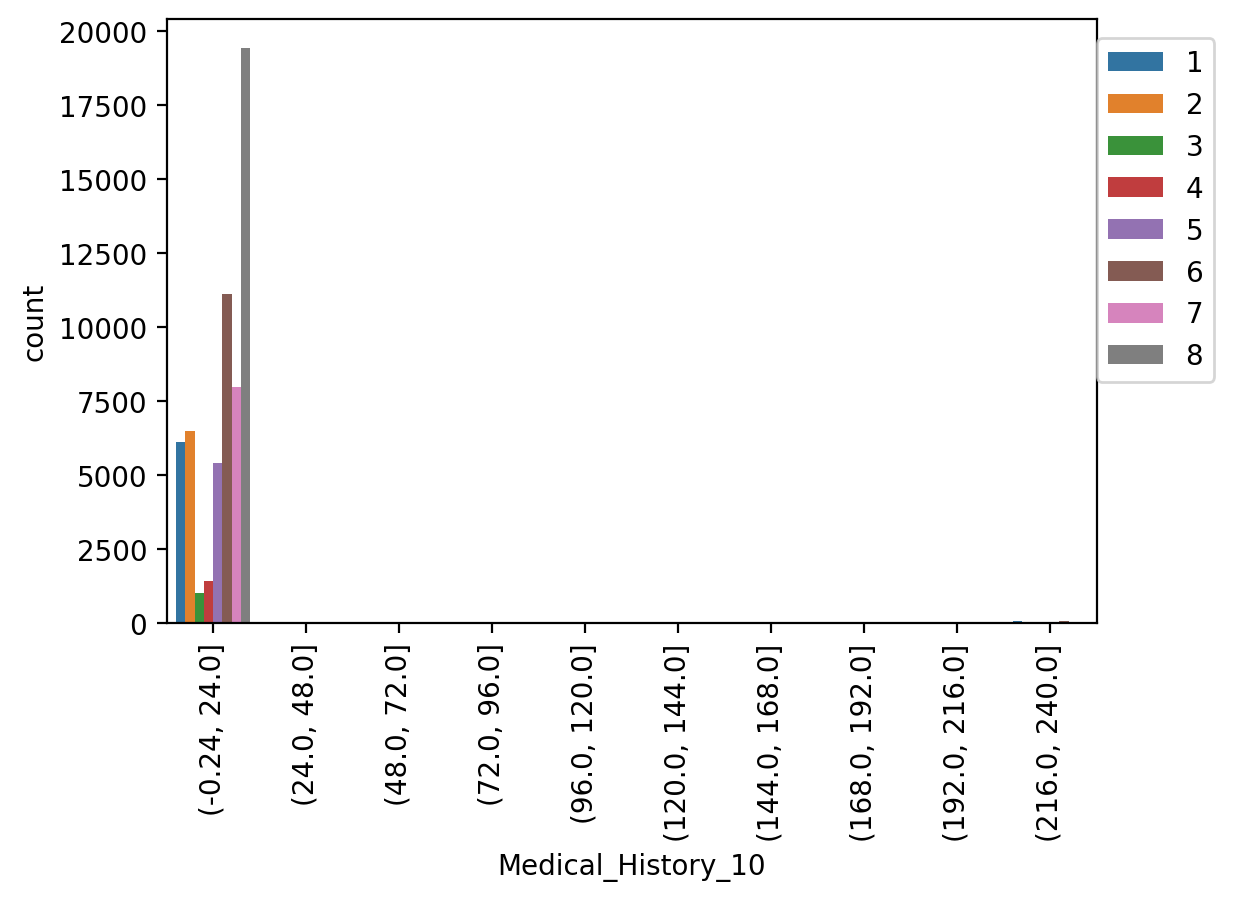

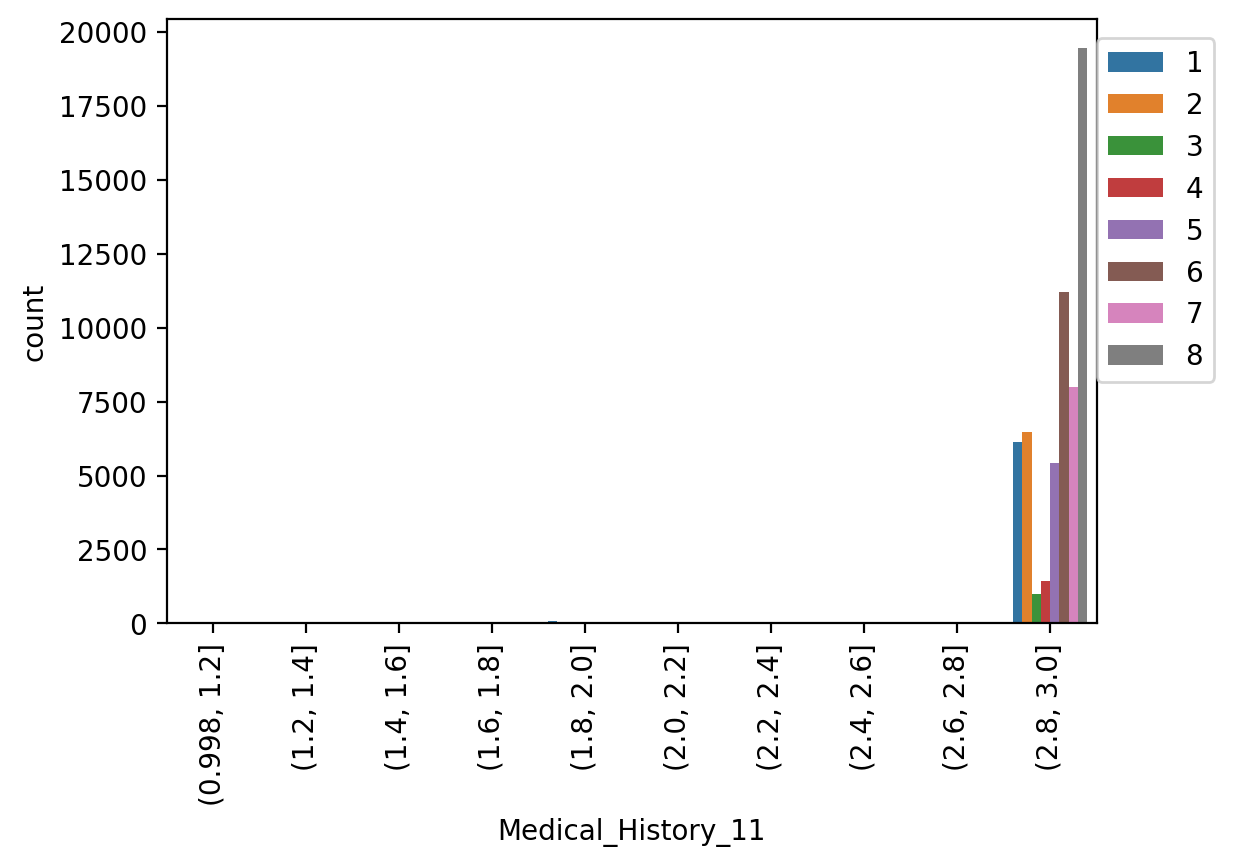

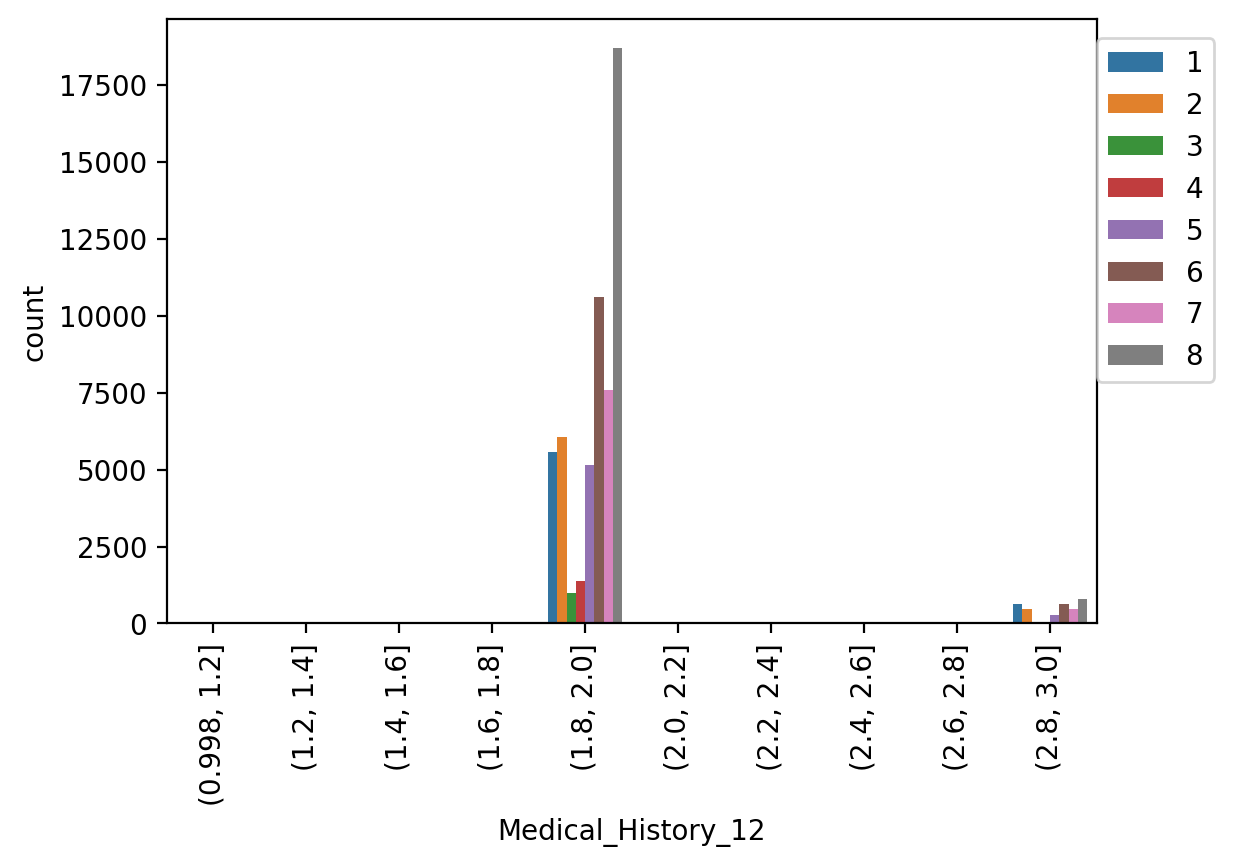

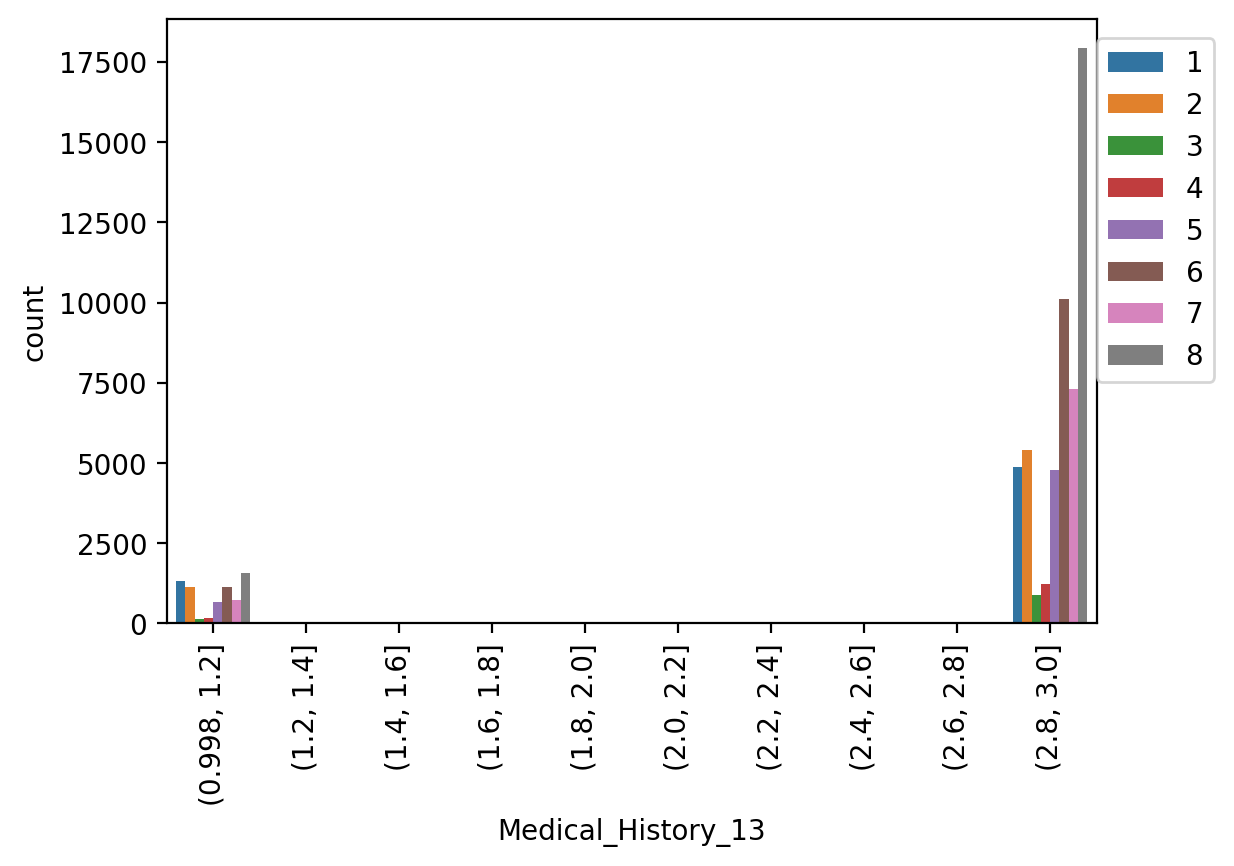

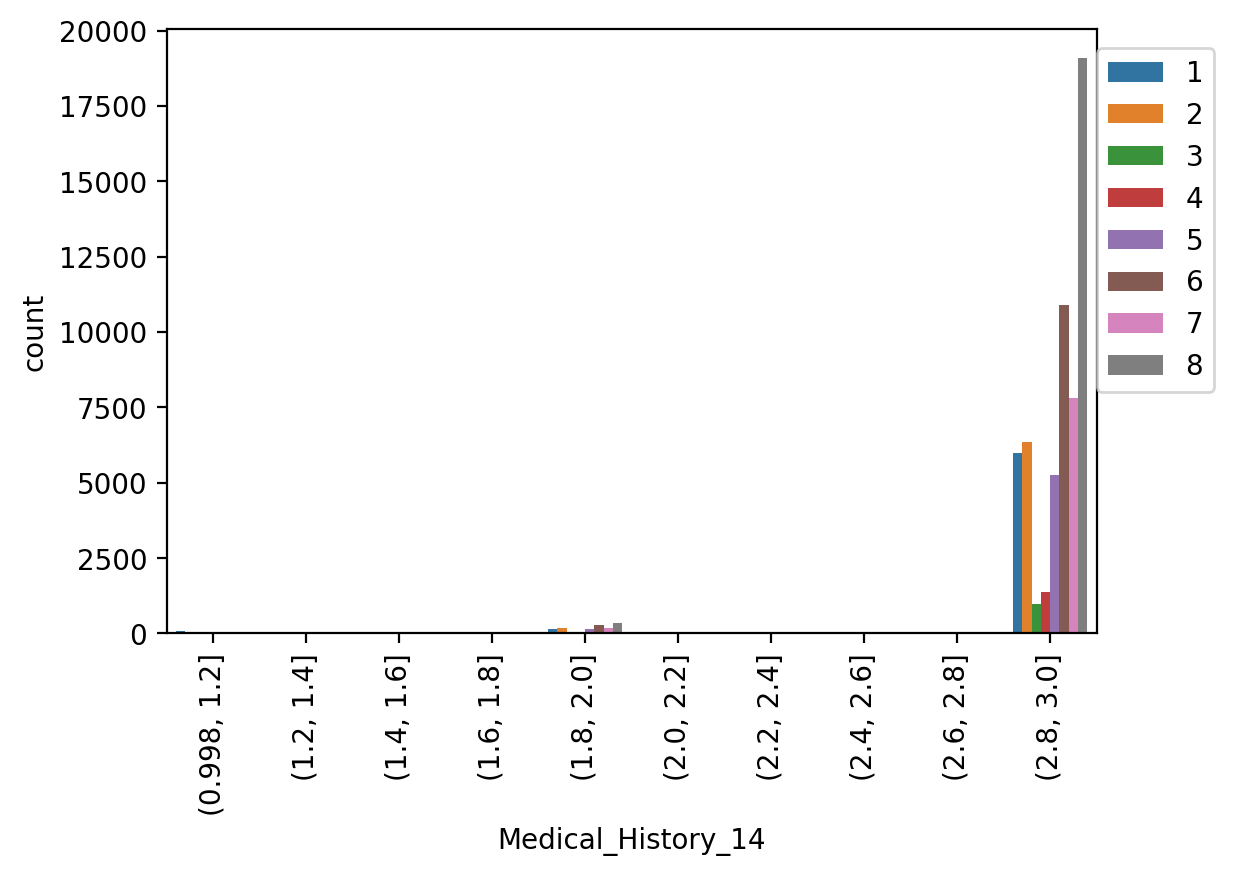

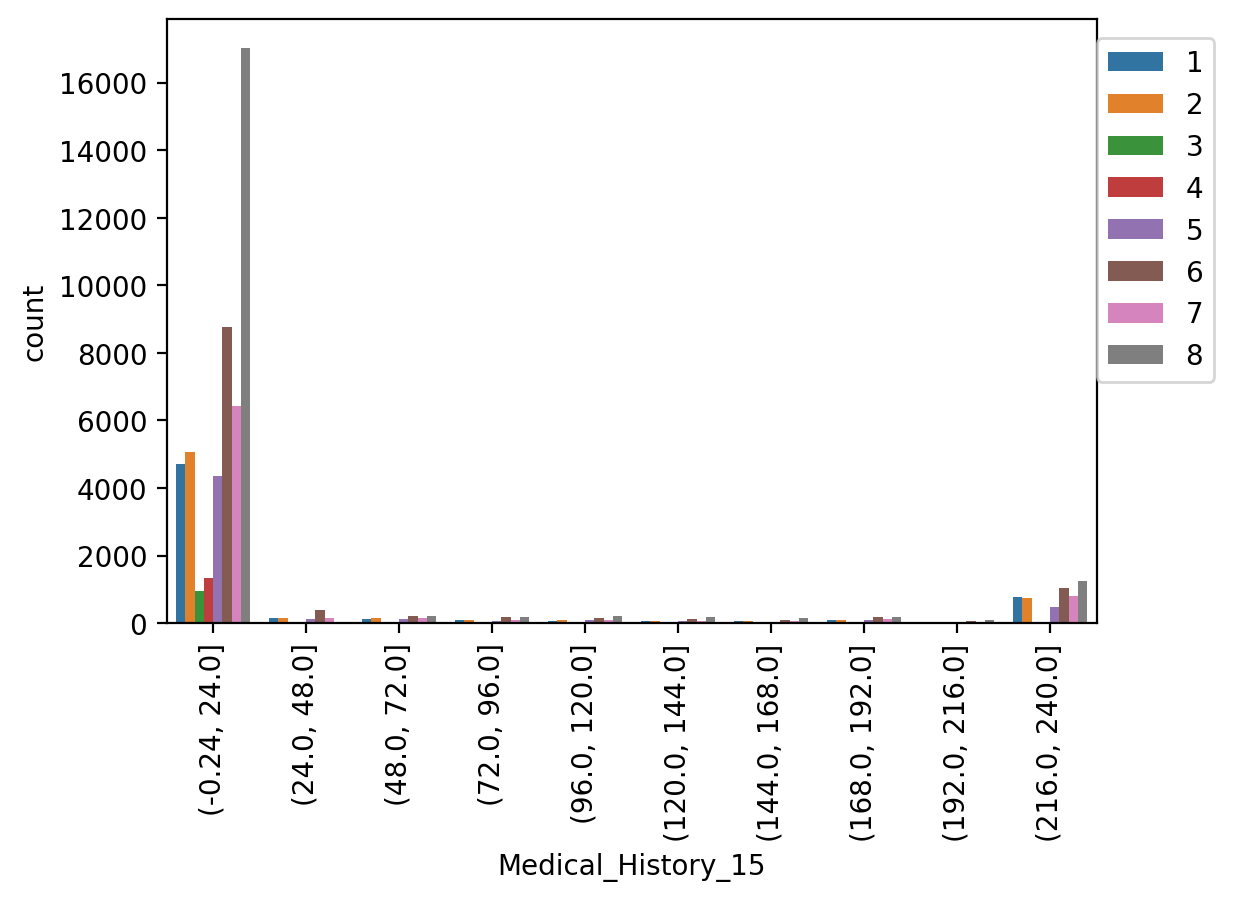

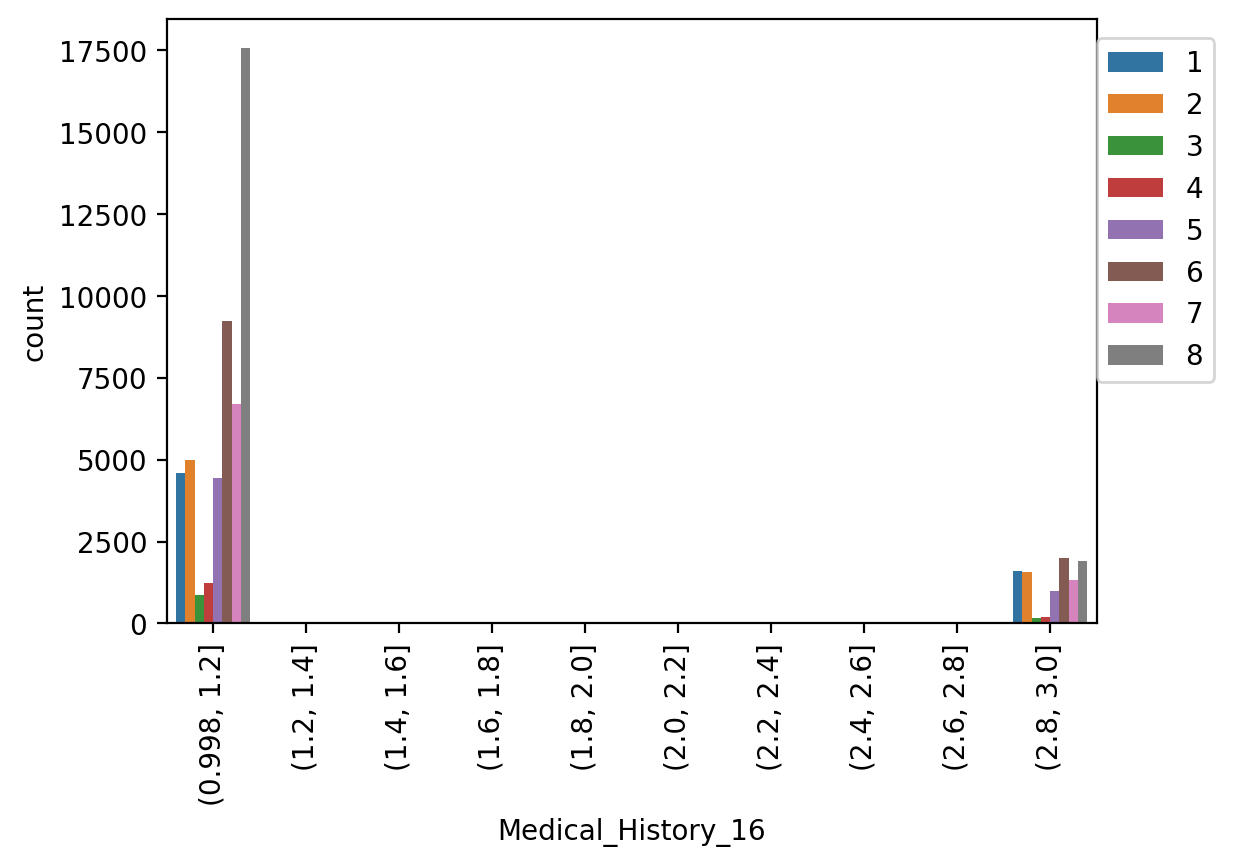

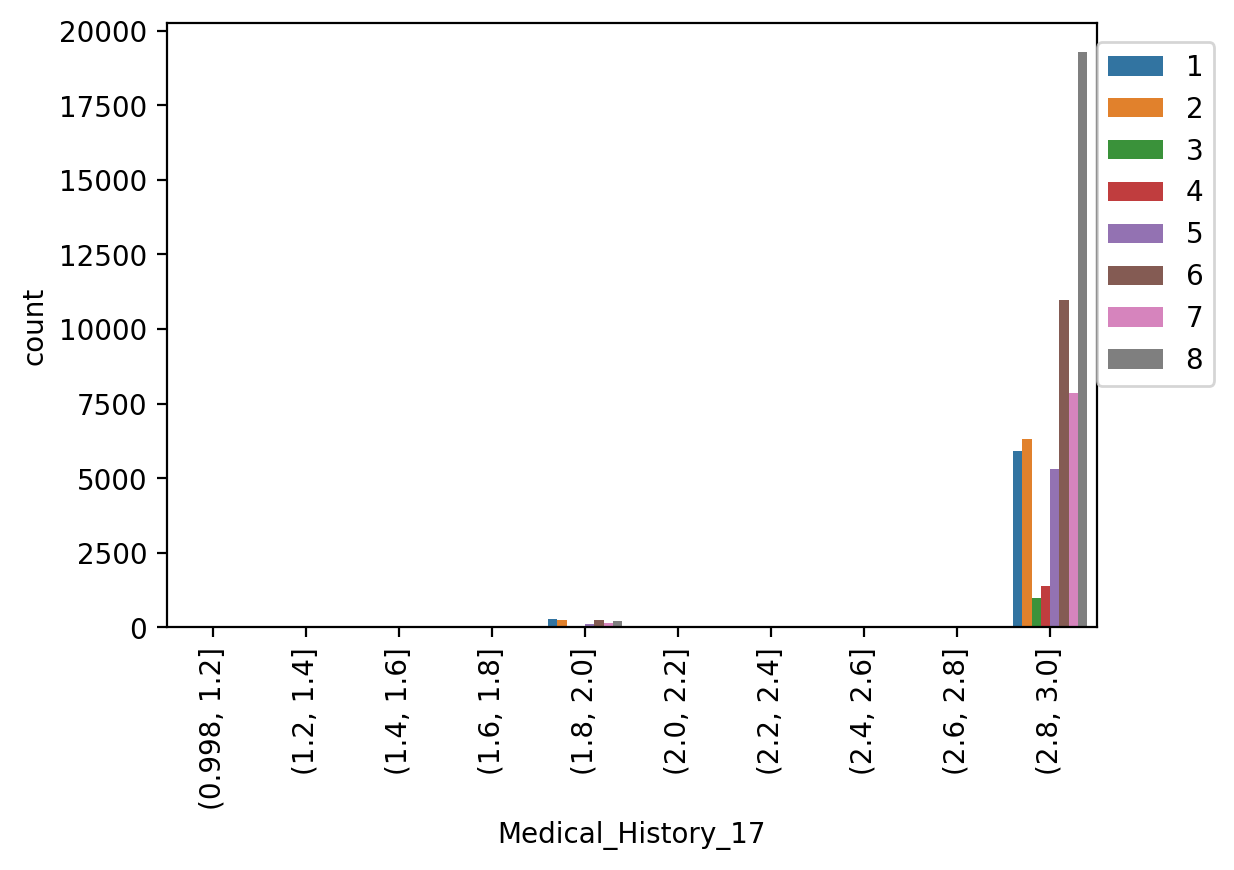

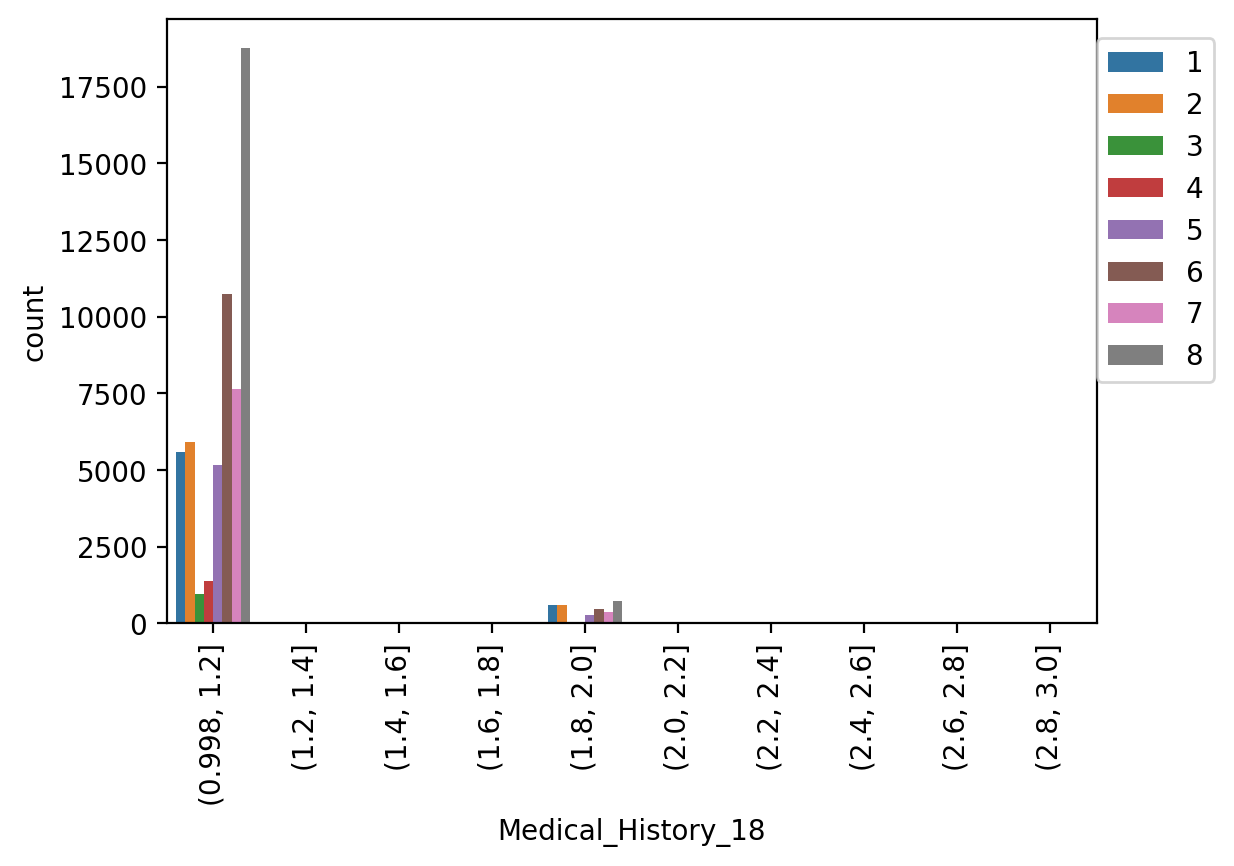

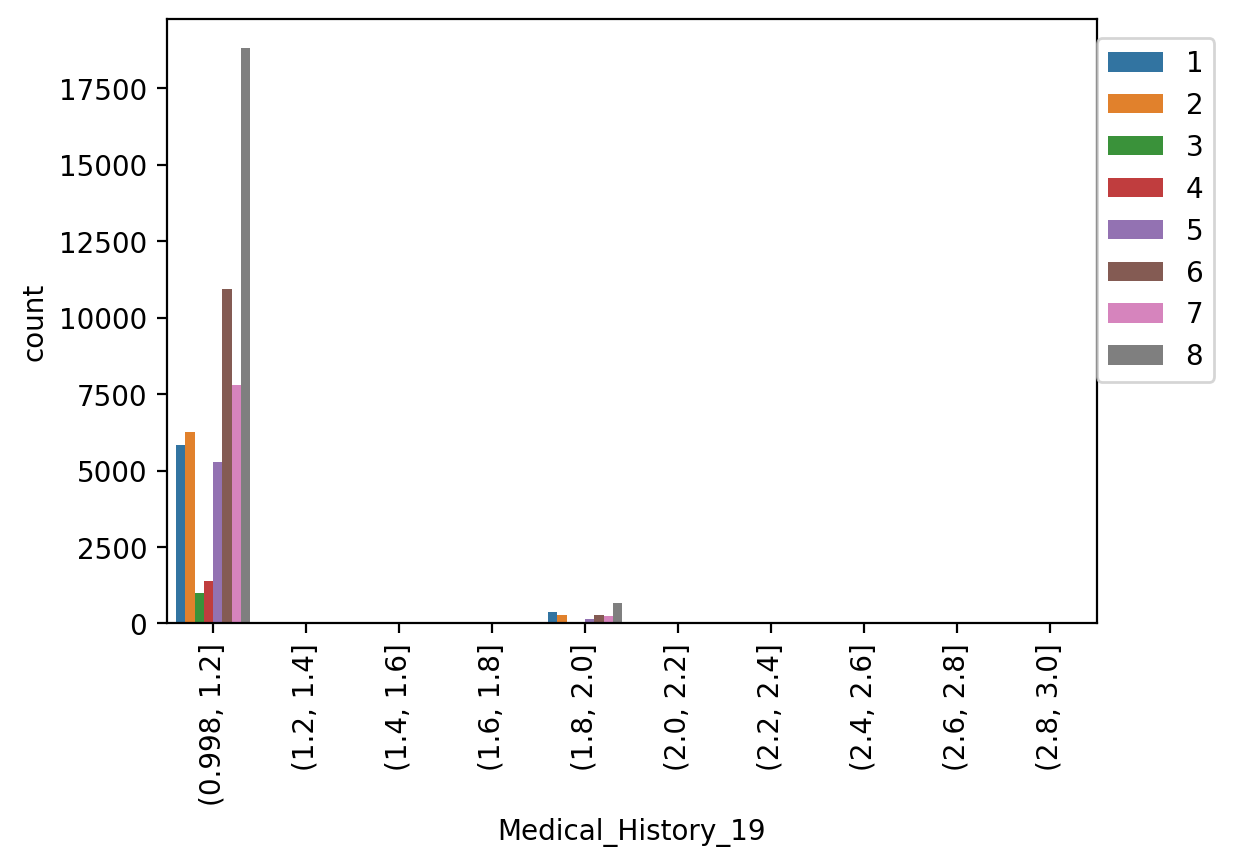

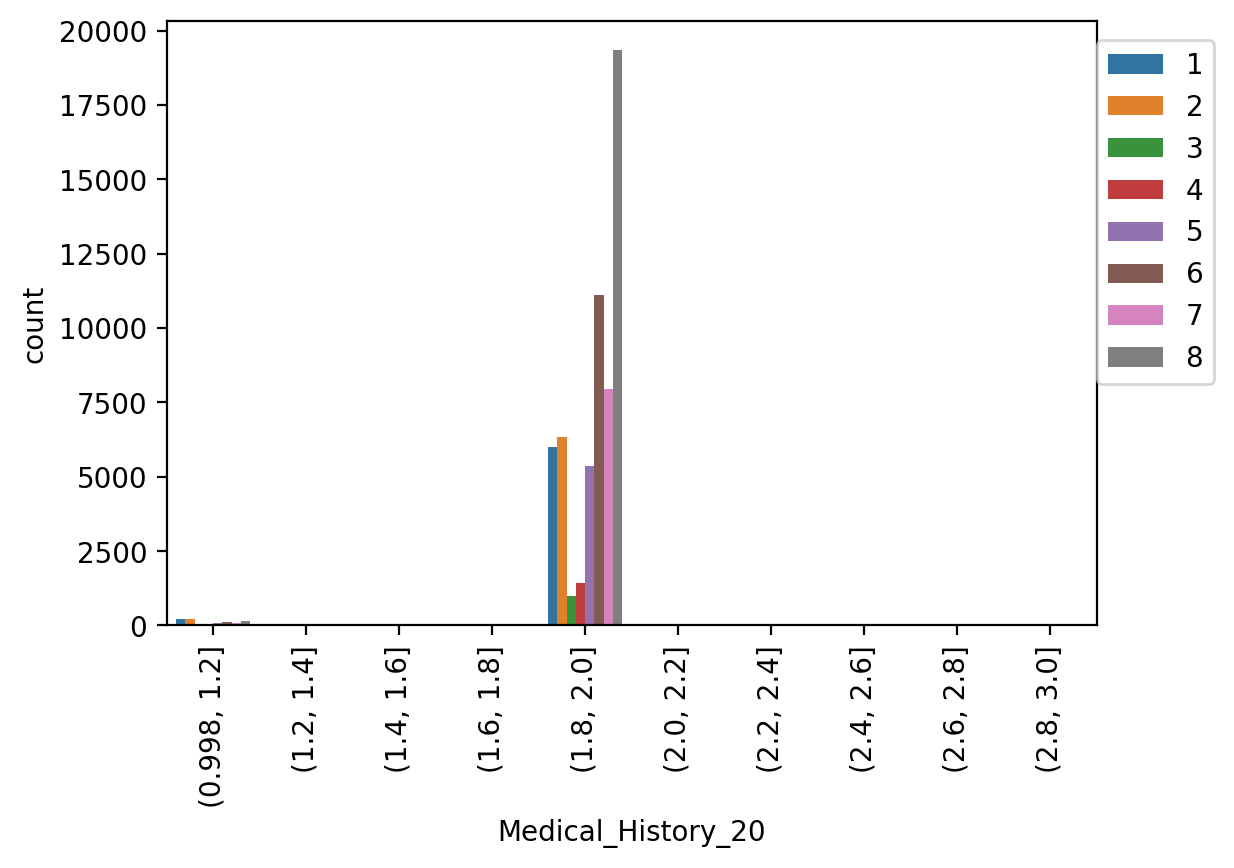

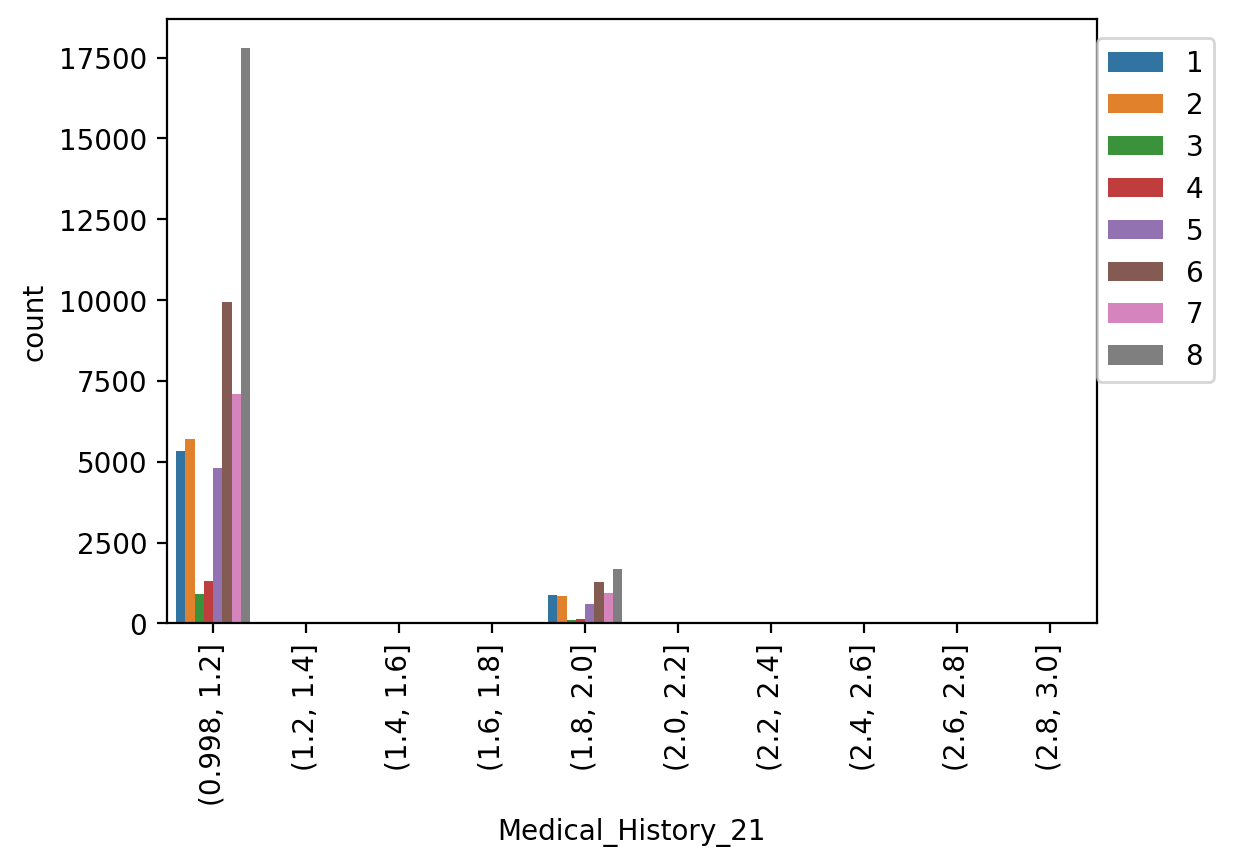

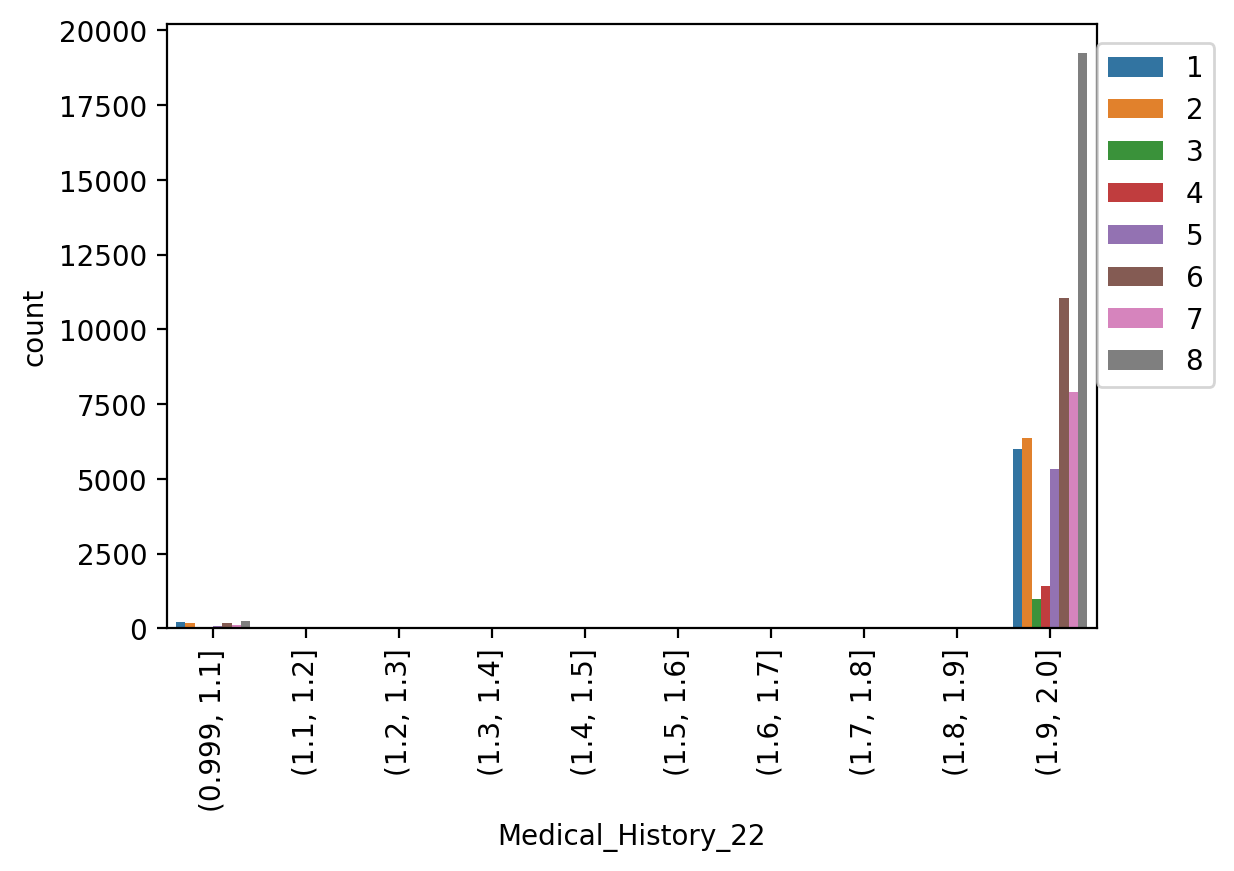

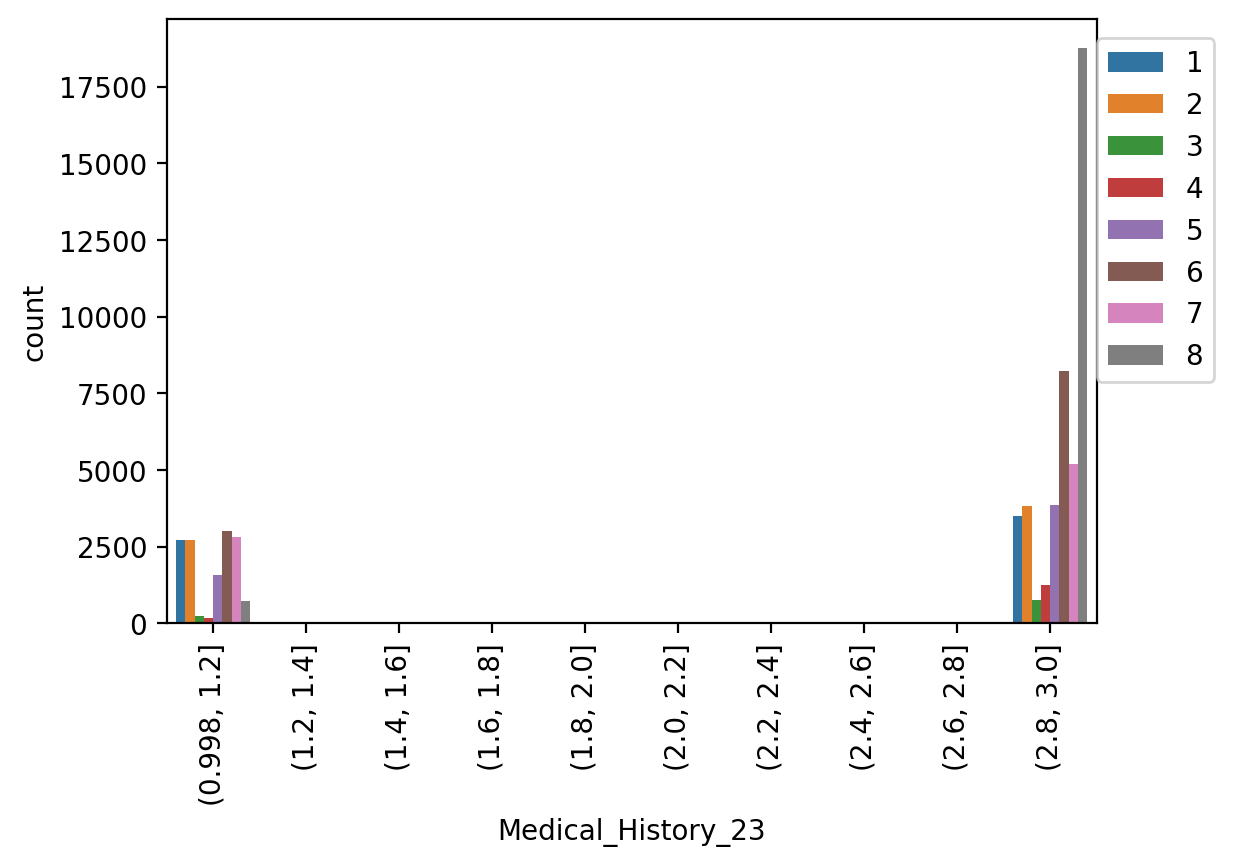

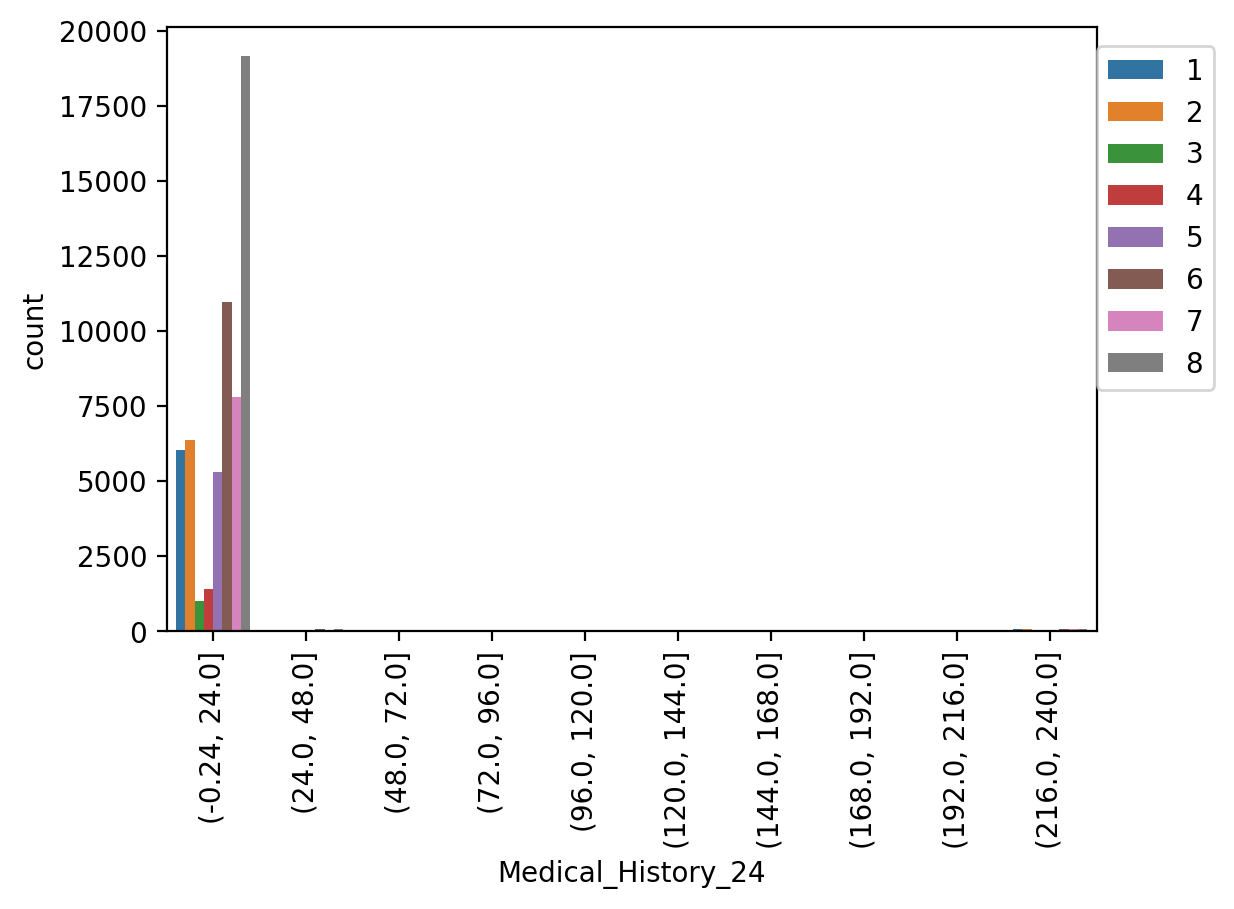

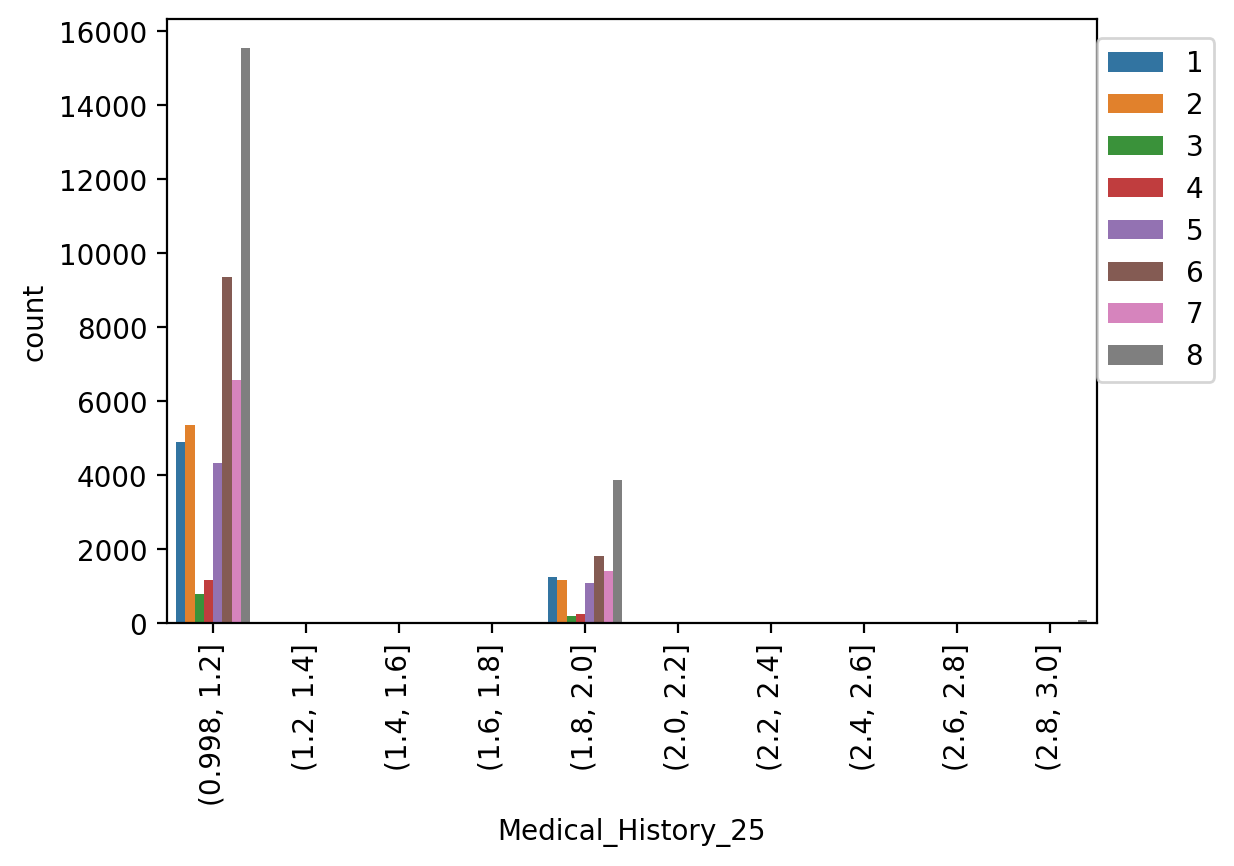

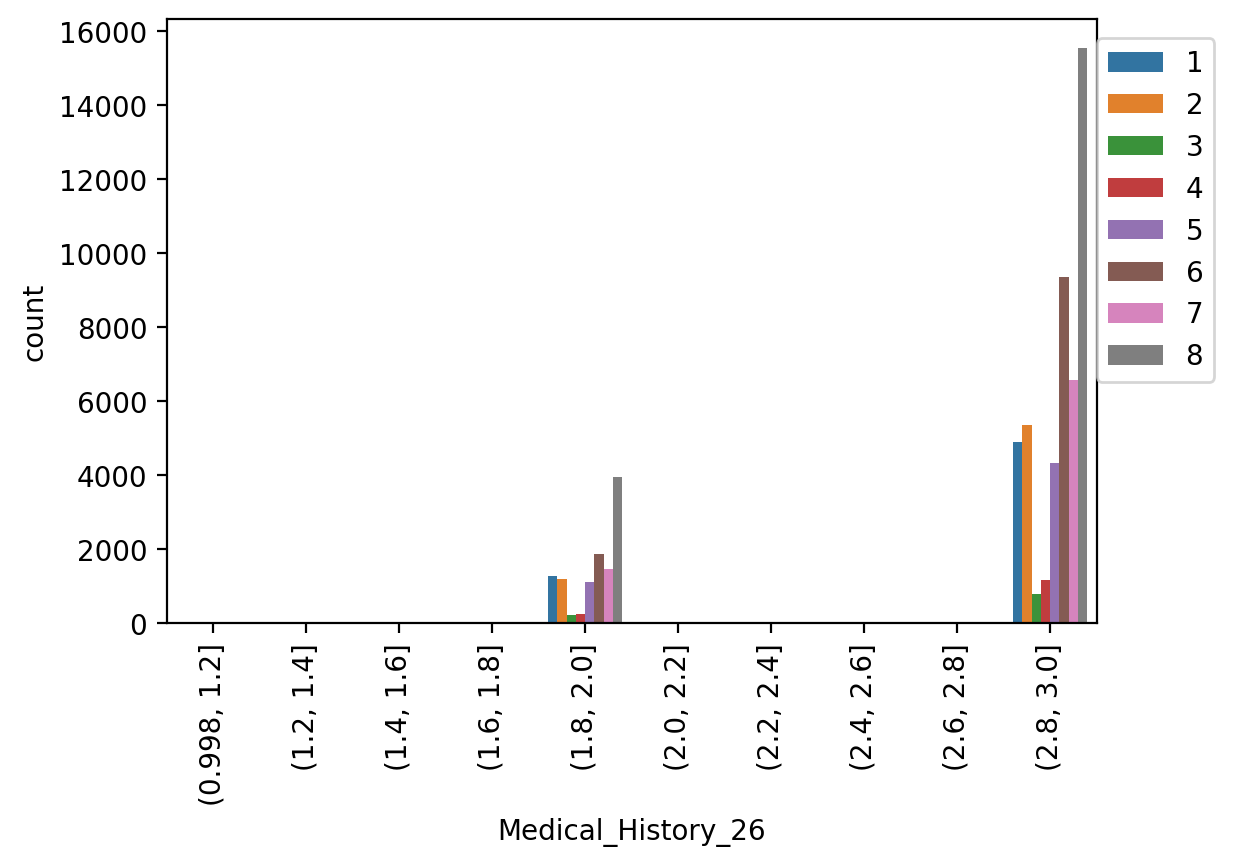

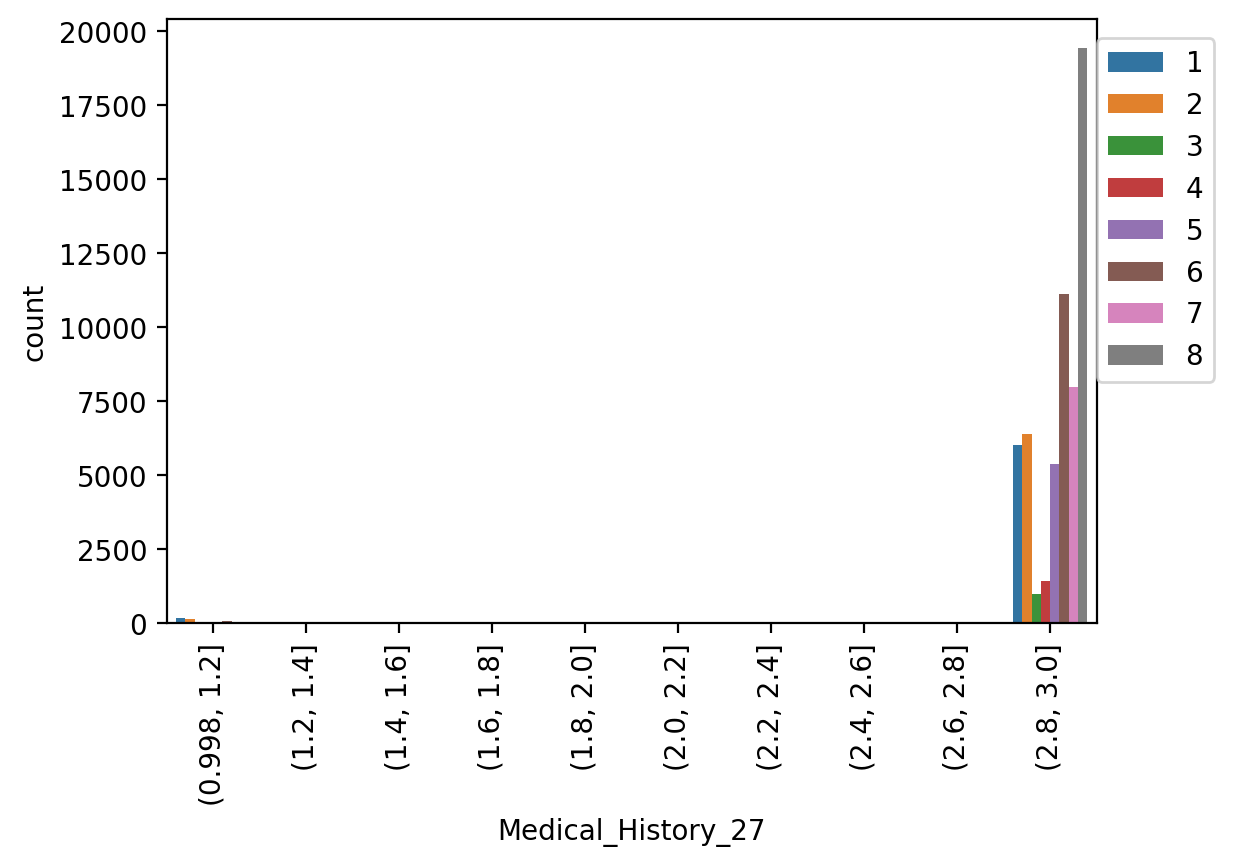

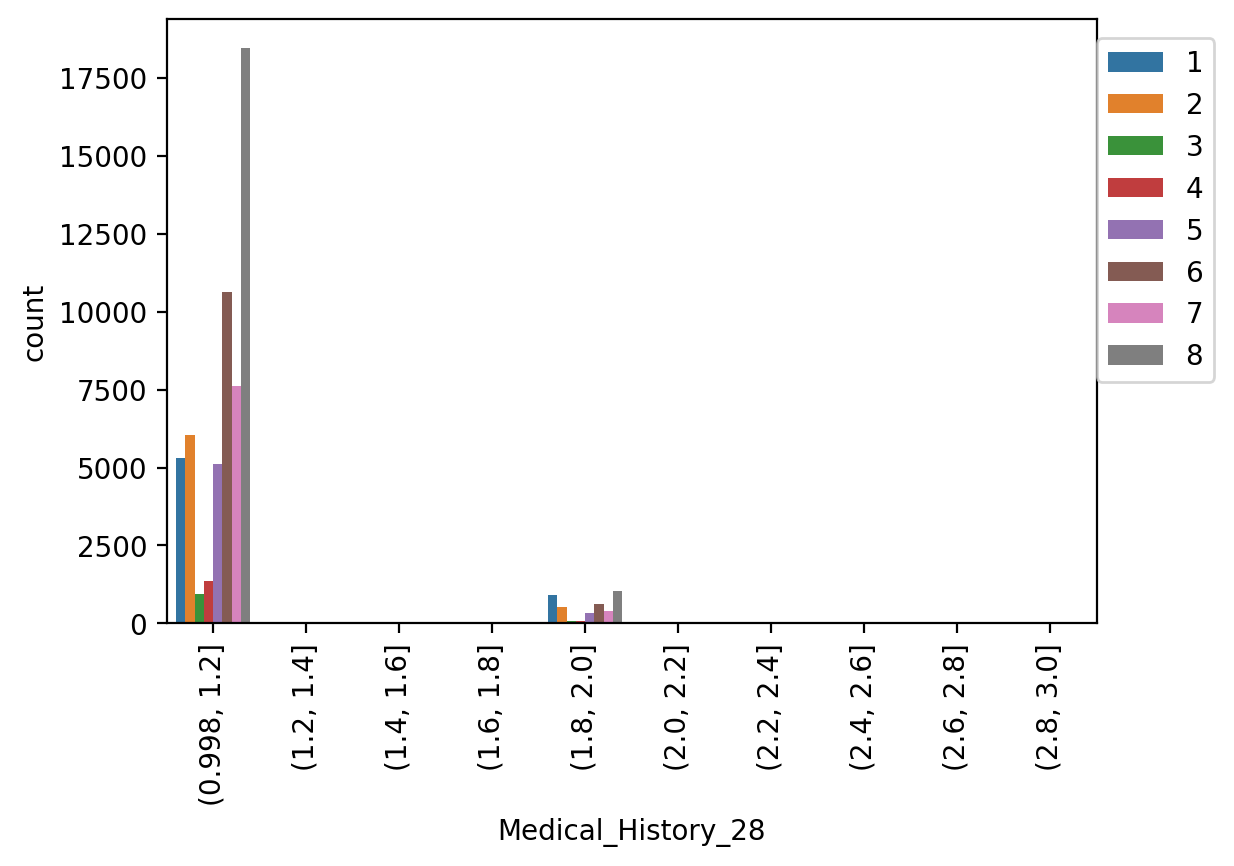

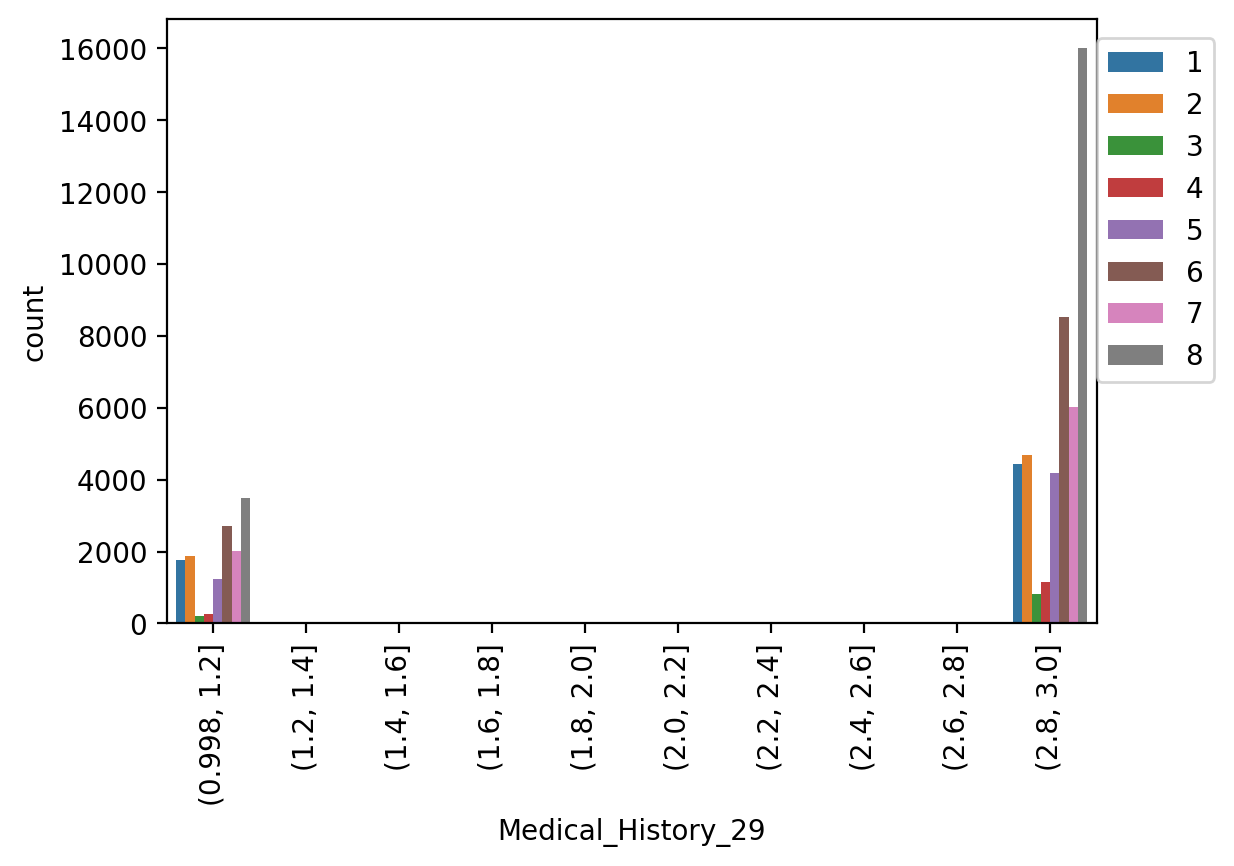

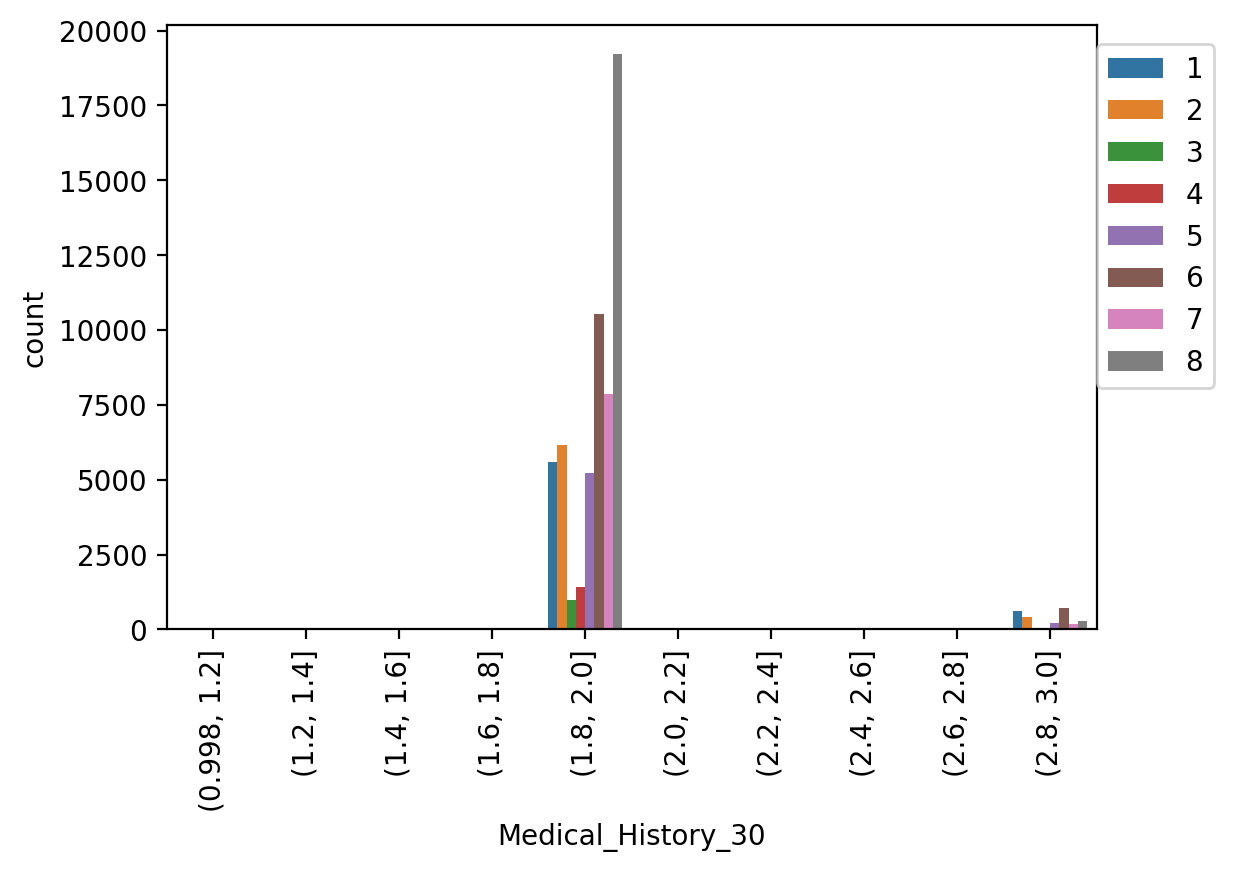

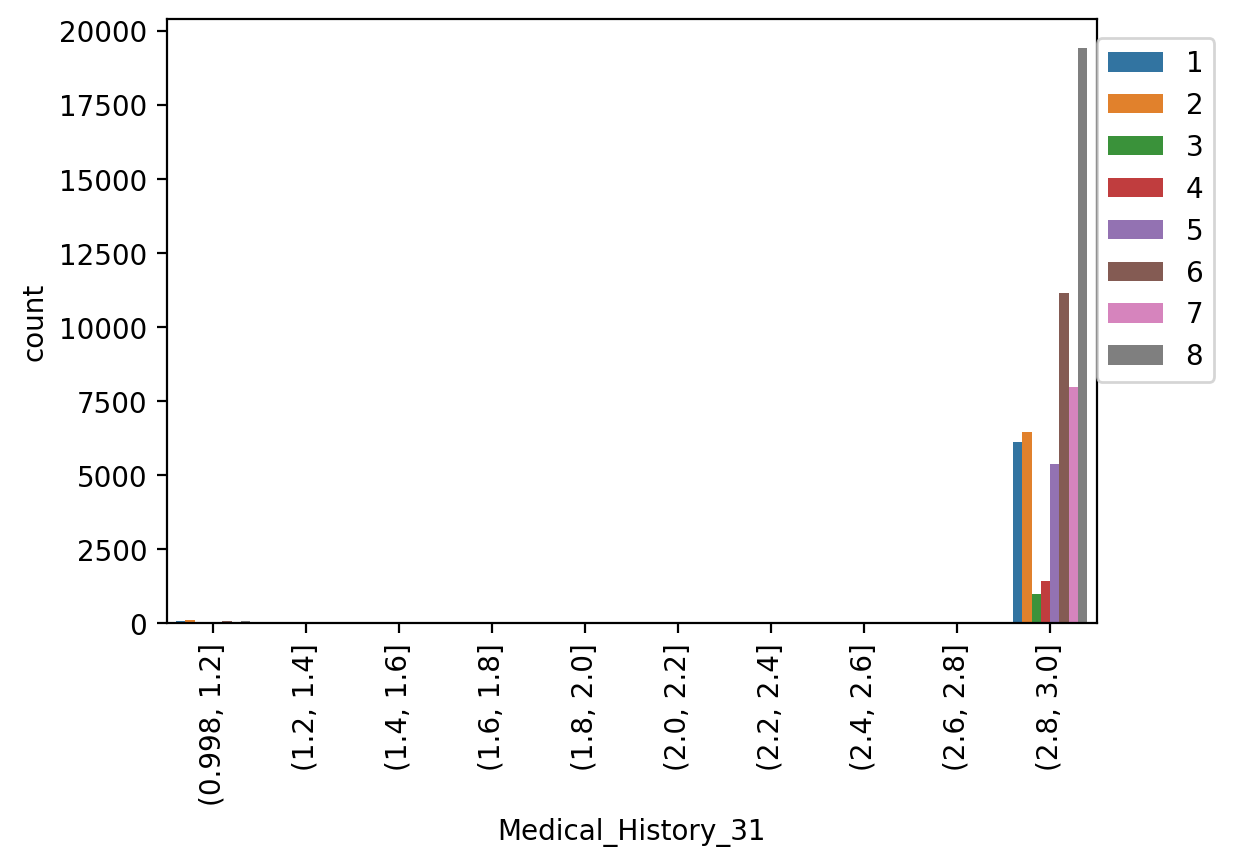

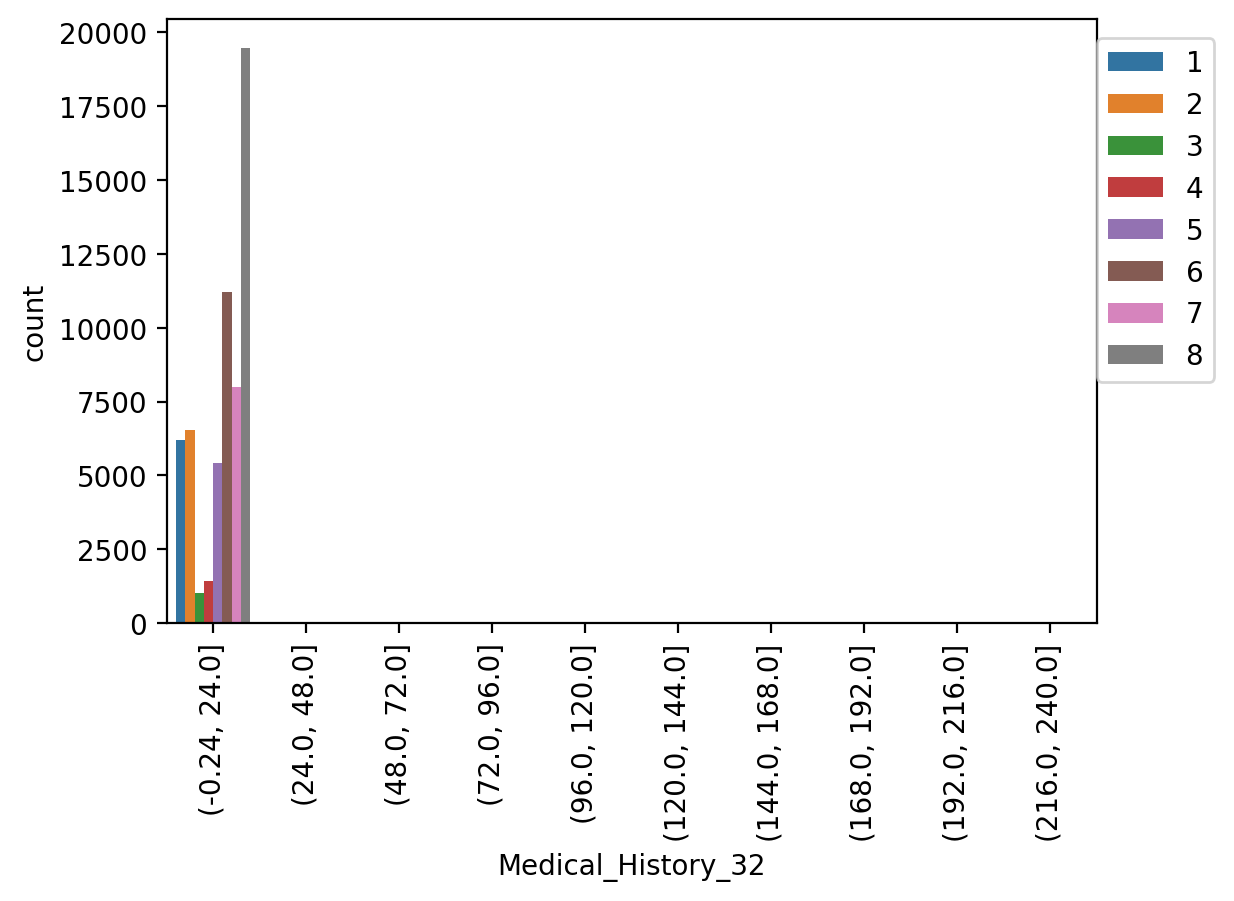

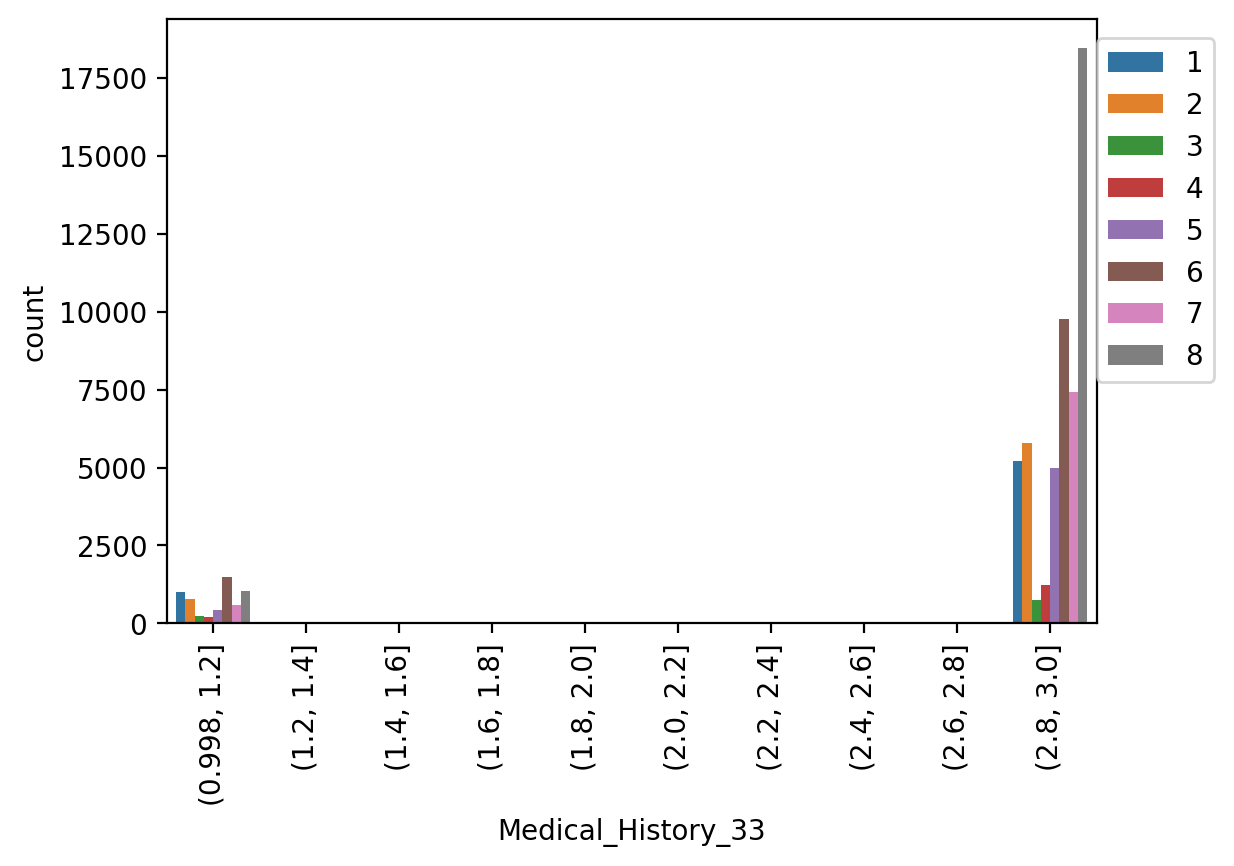

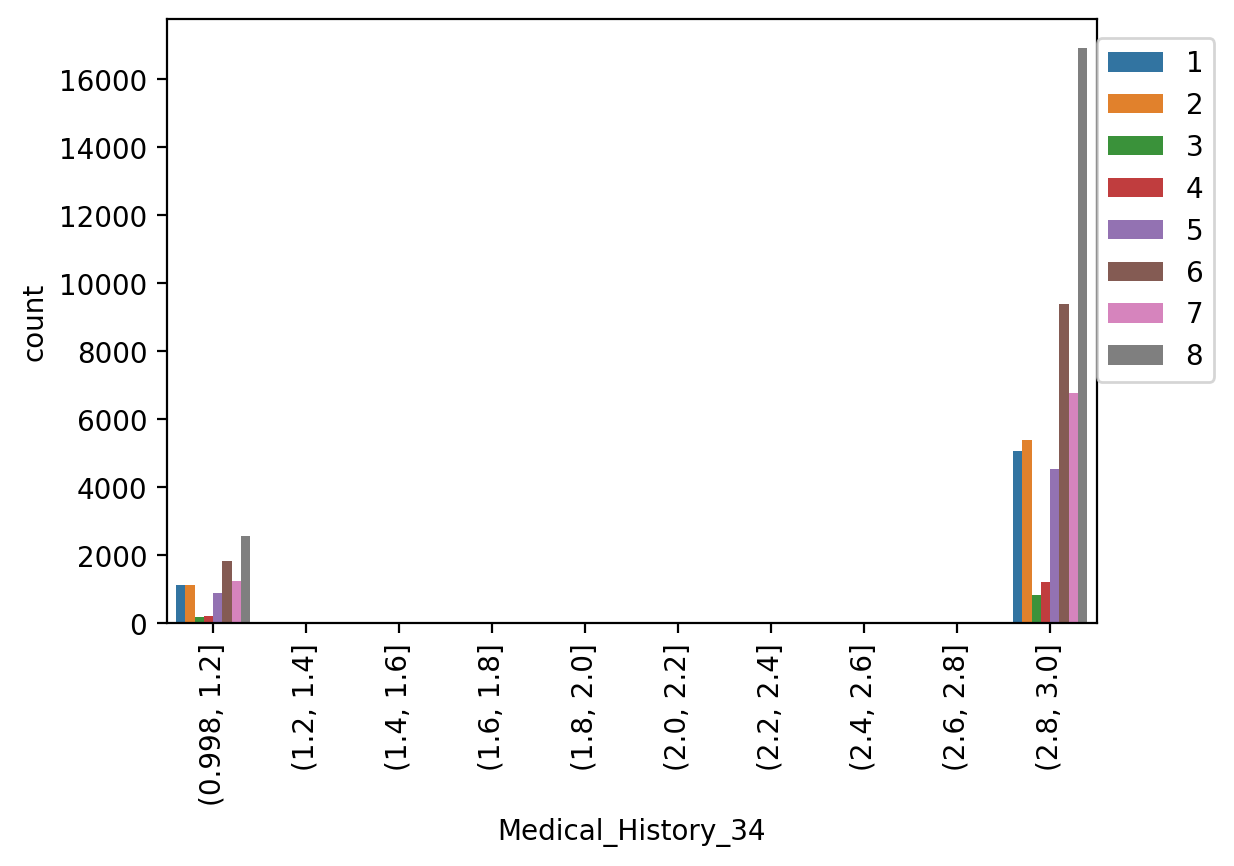

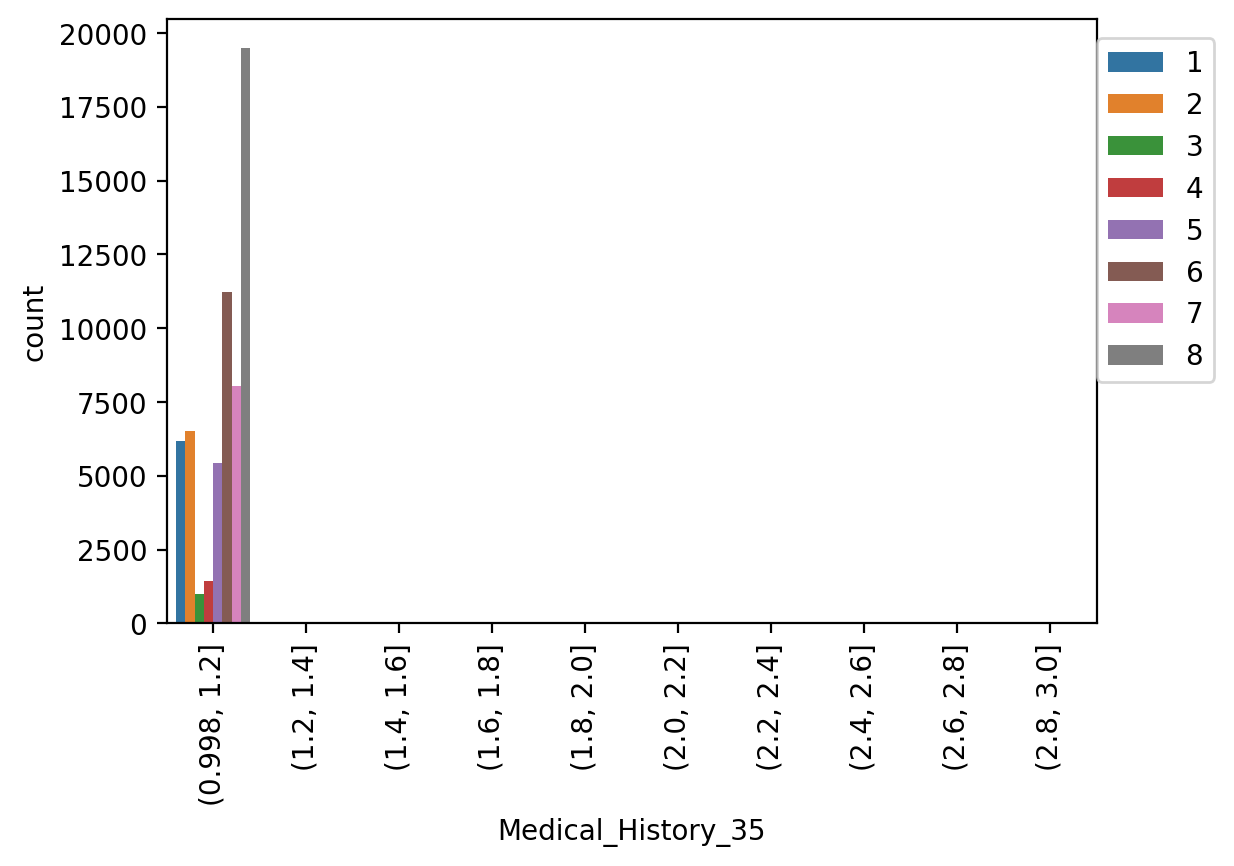

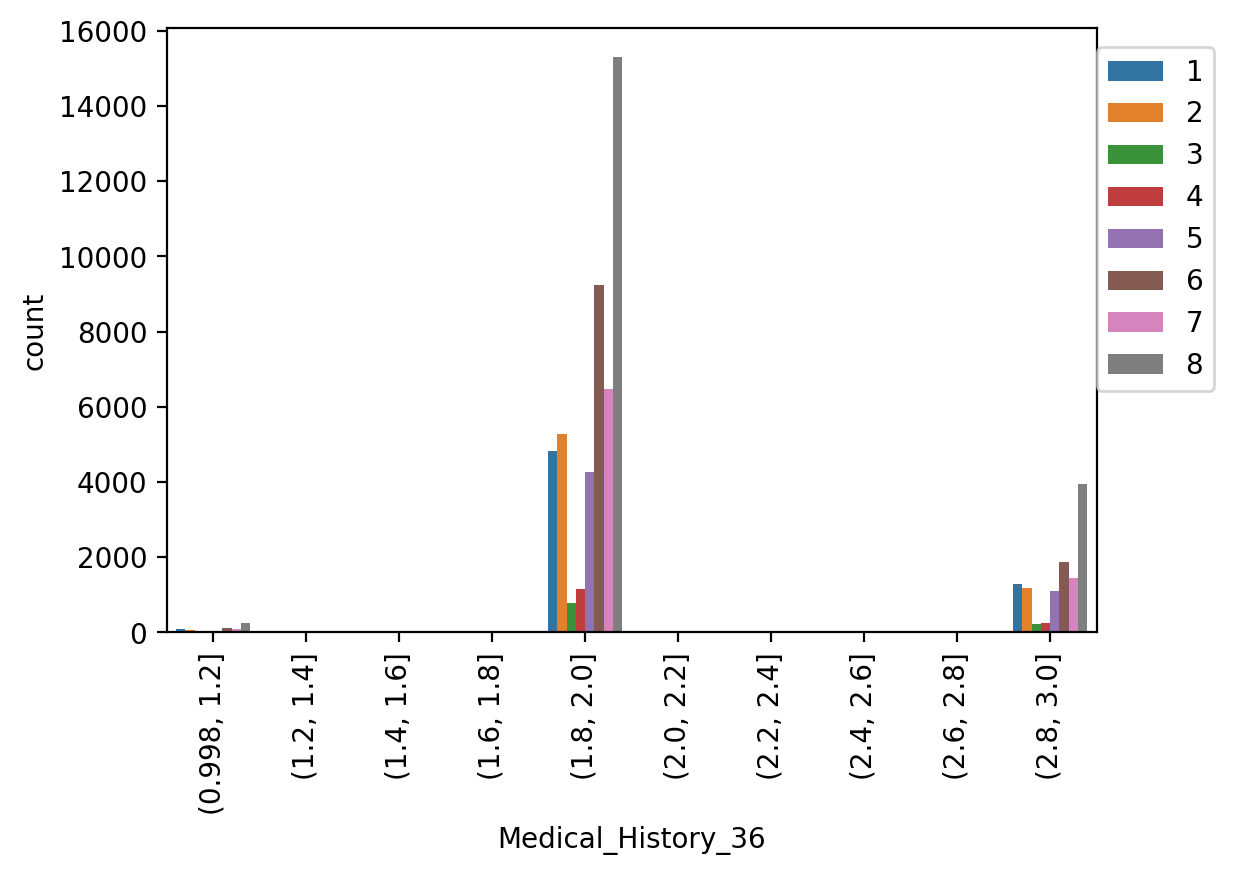

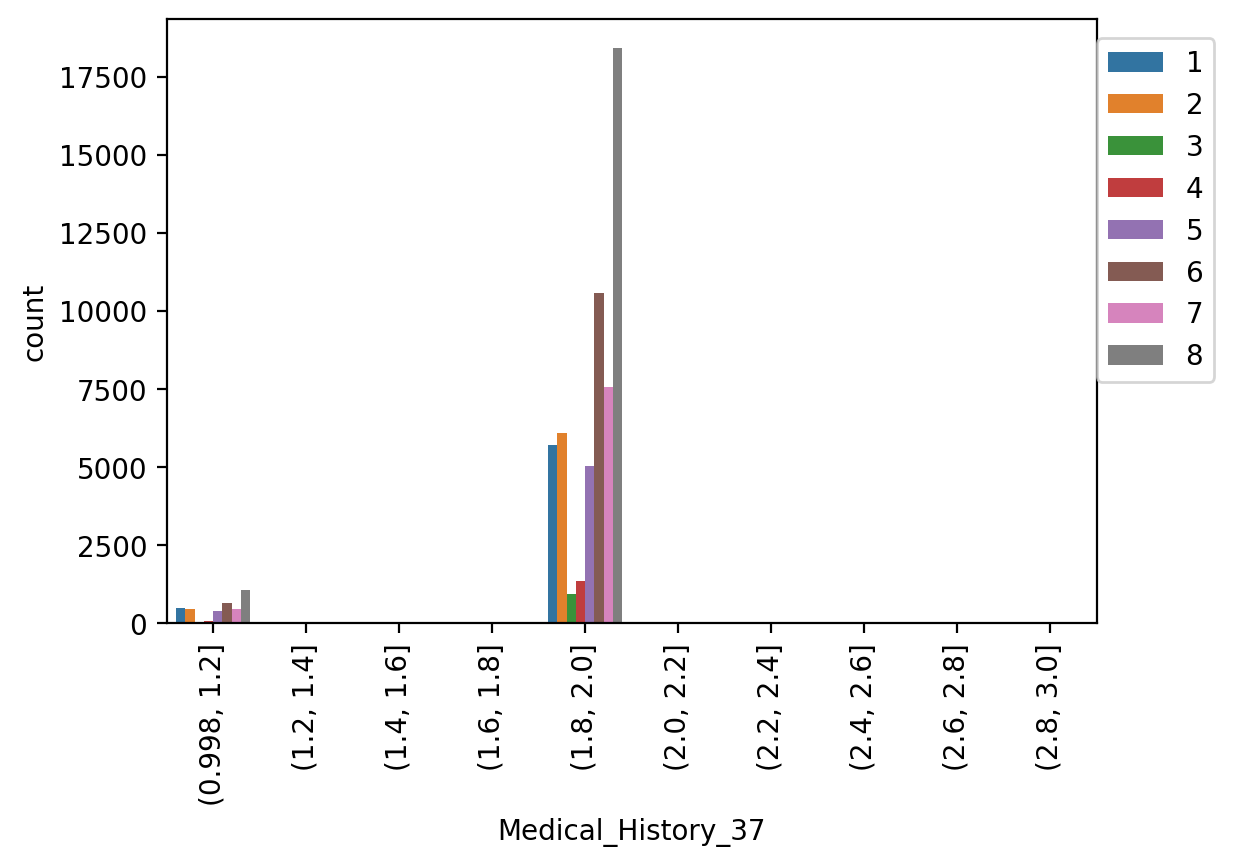

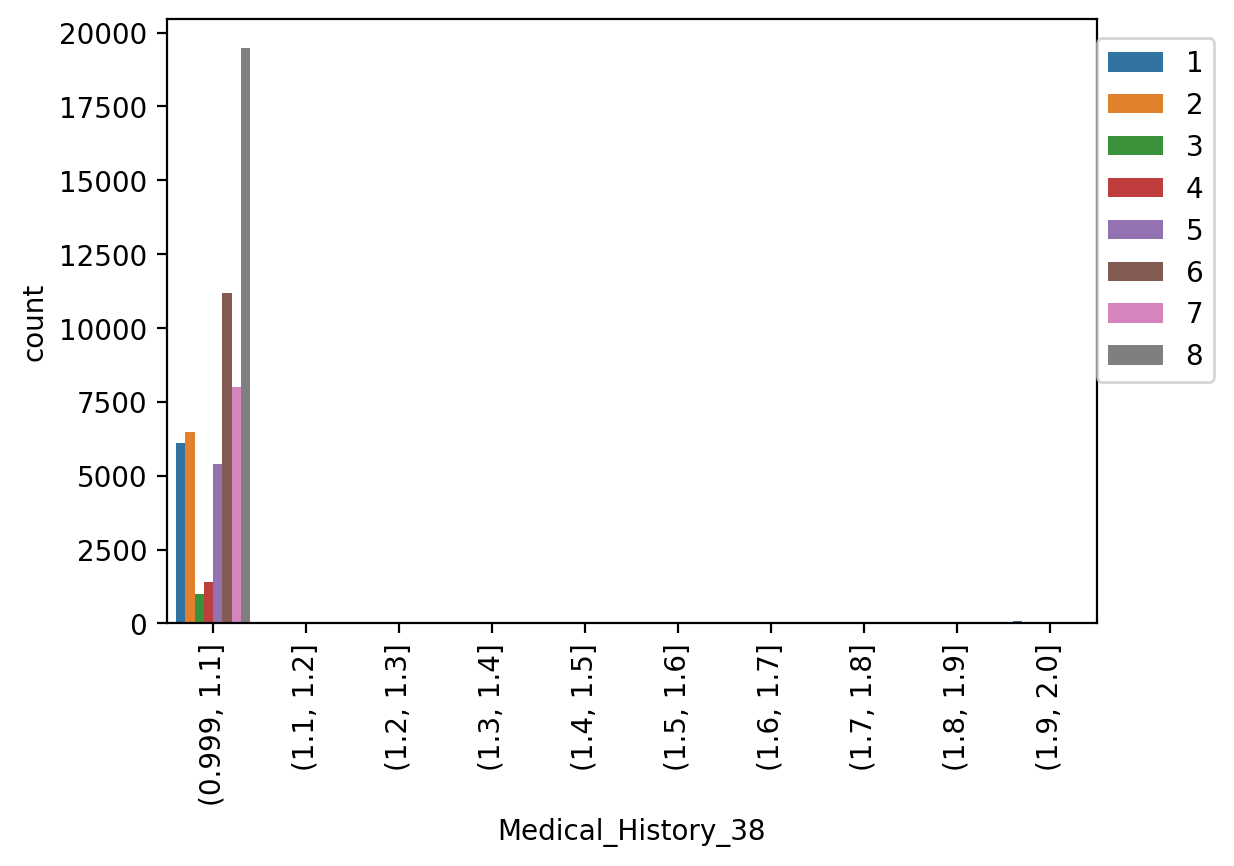

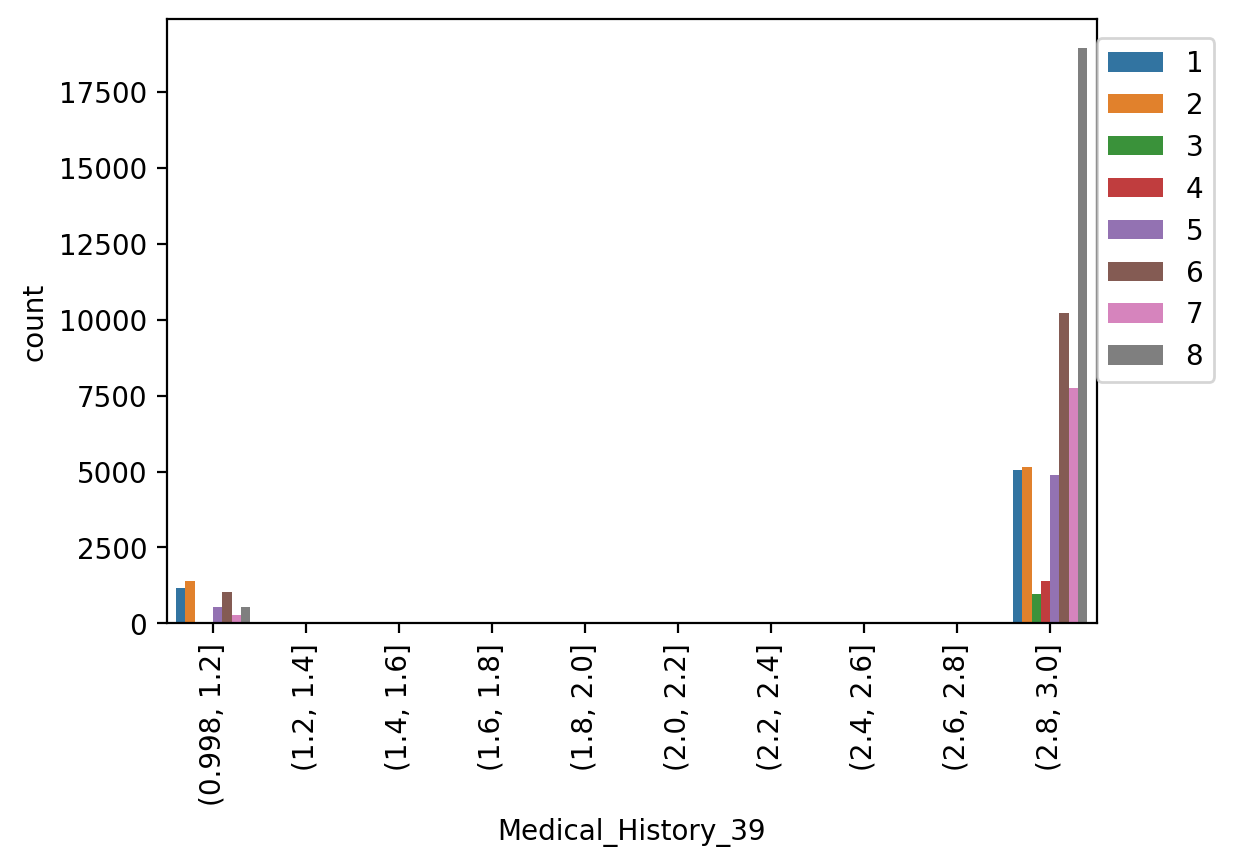

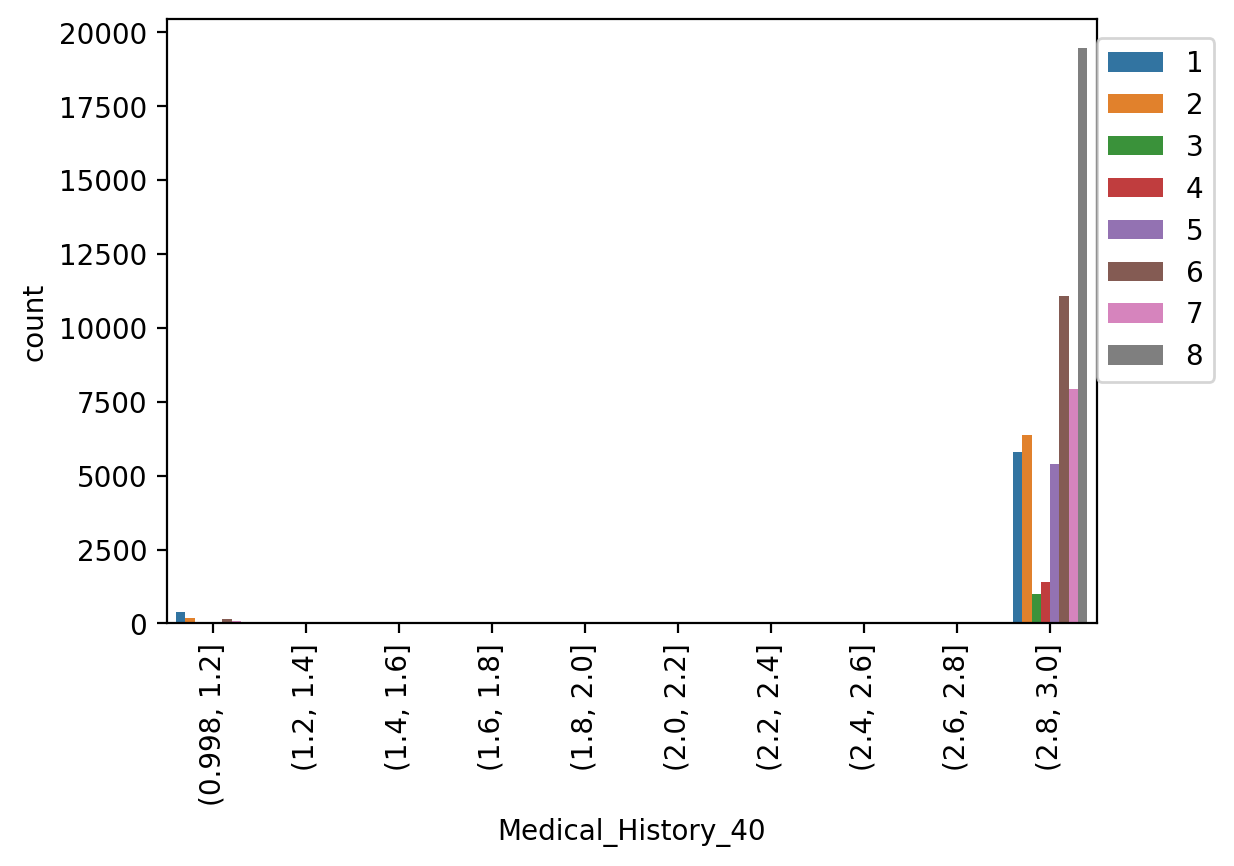

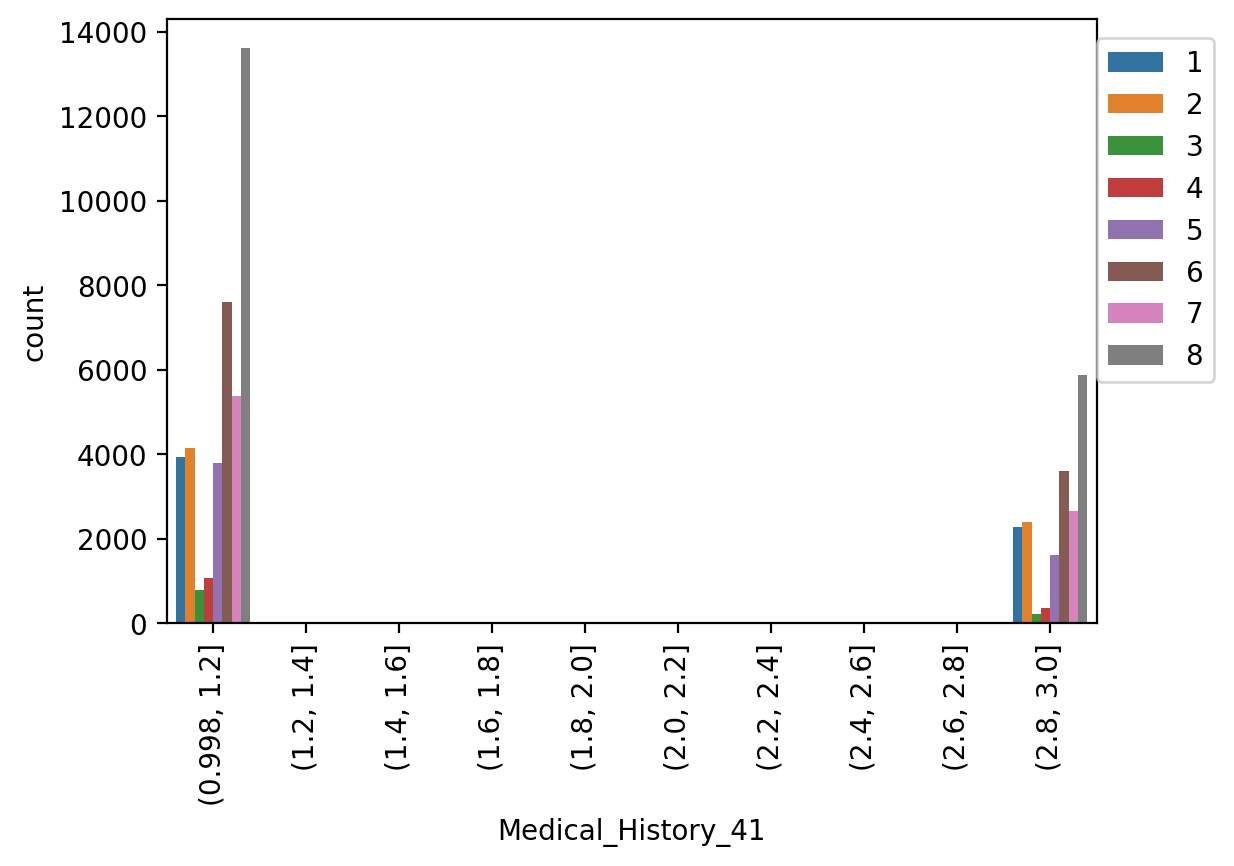

In [203]:
# Showing medical history columns
for col in medical_history_cols:
    plt.figure(dpi = 200)
    sns.countplot(x = pd.cut(df[col], bins=10), hue = df['Response'])
    plt.legend(loc = [1,0.4])
    plt.xticks(rotation = 90)
    plt.show();

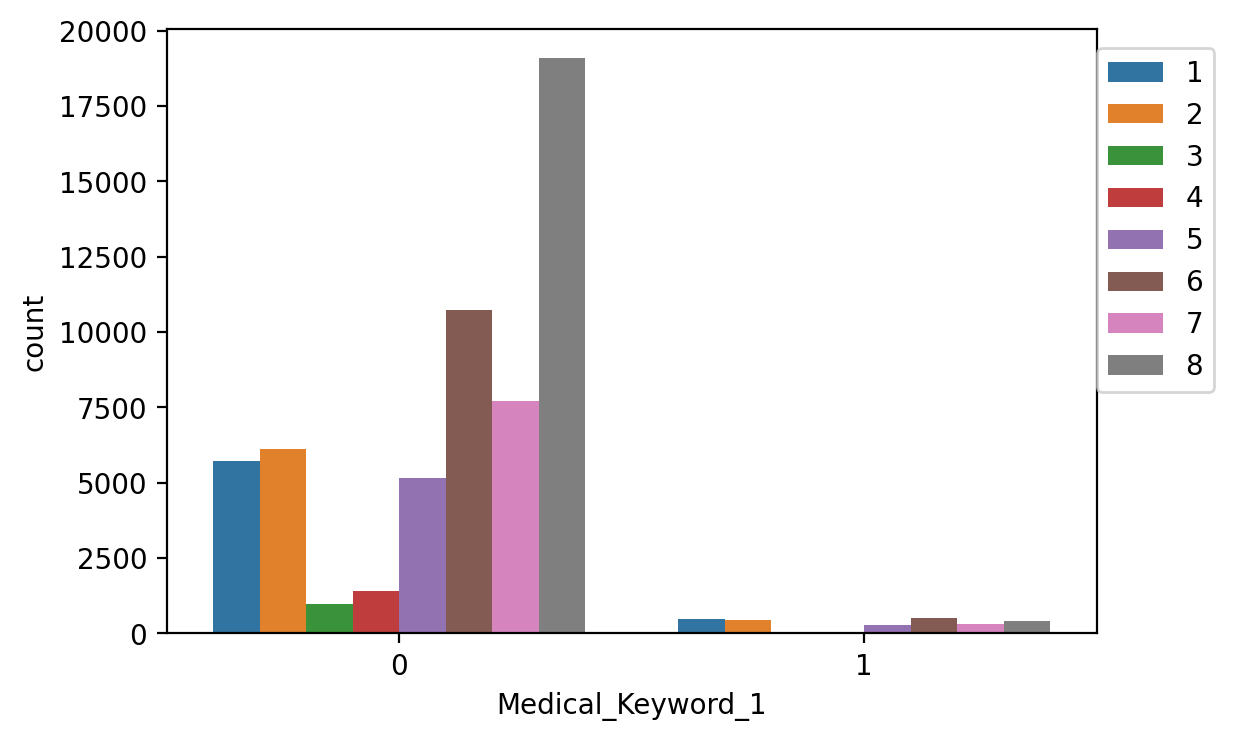

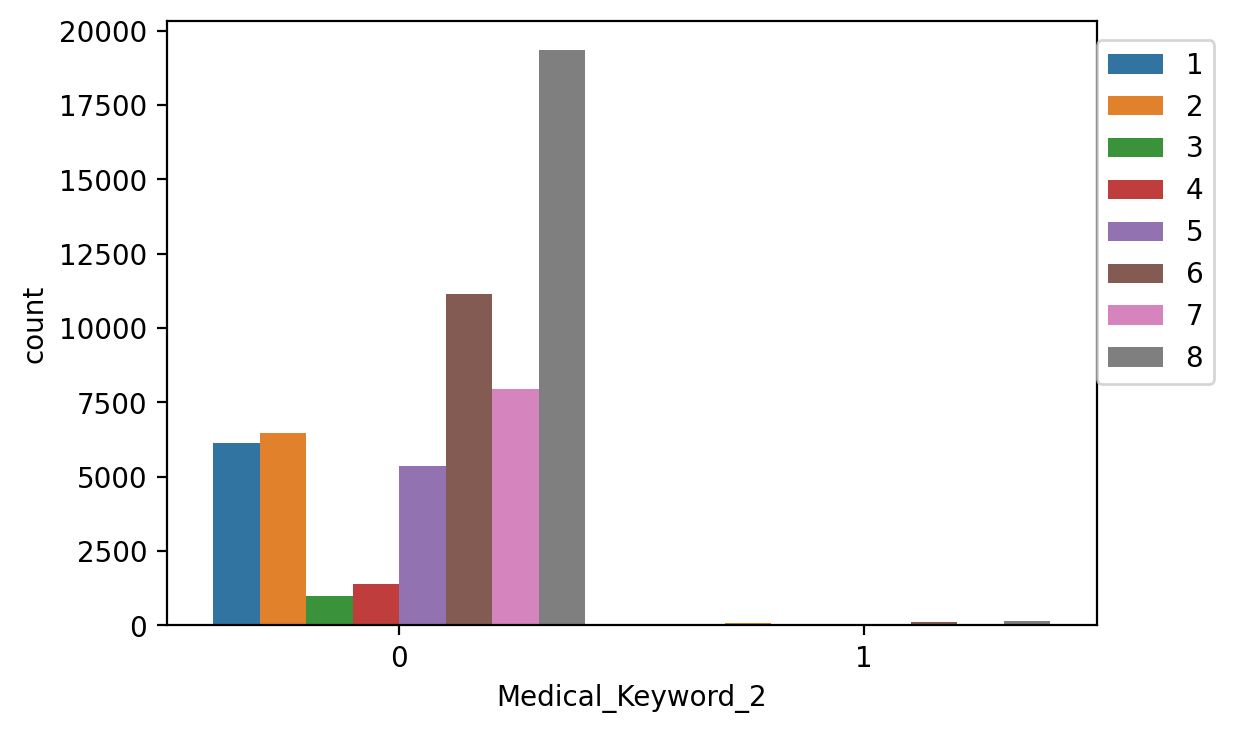

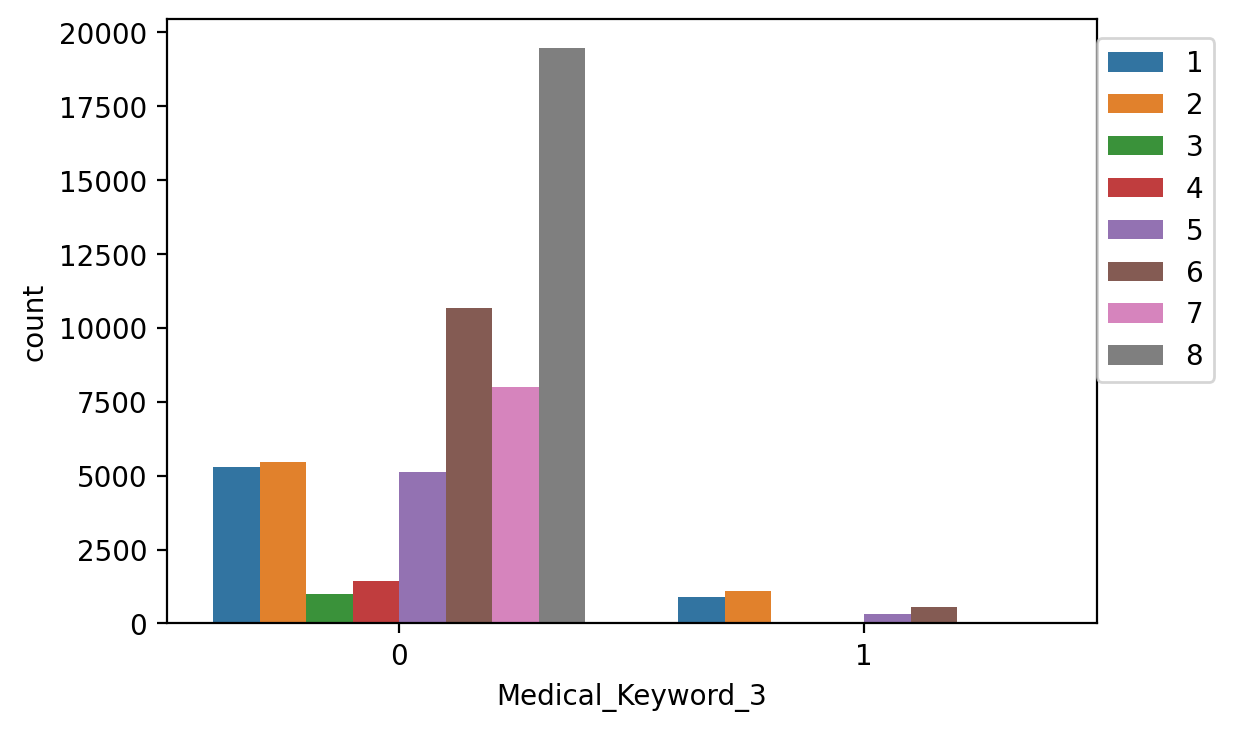

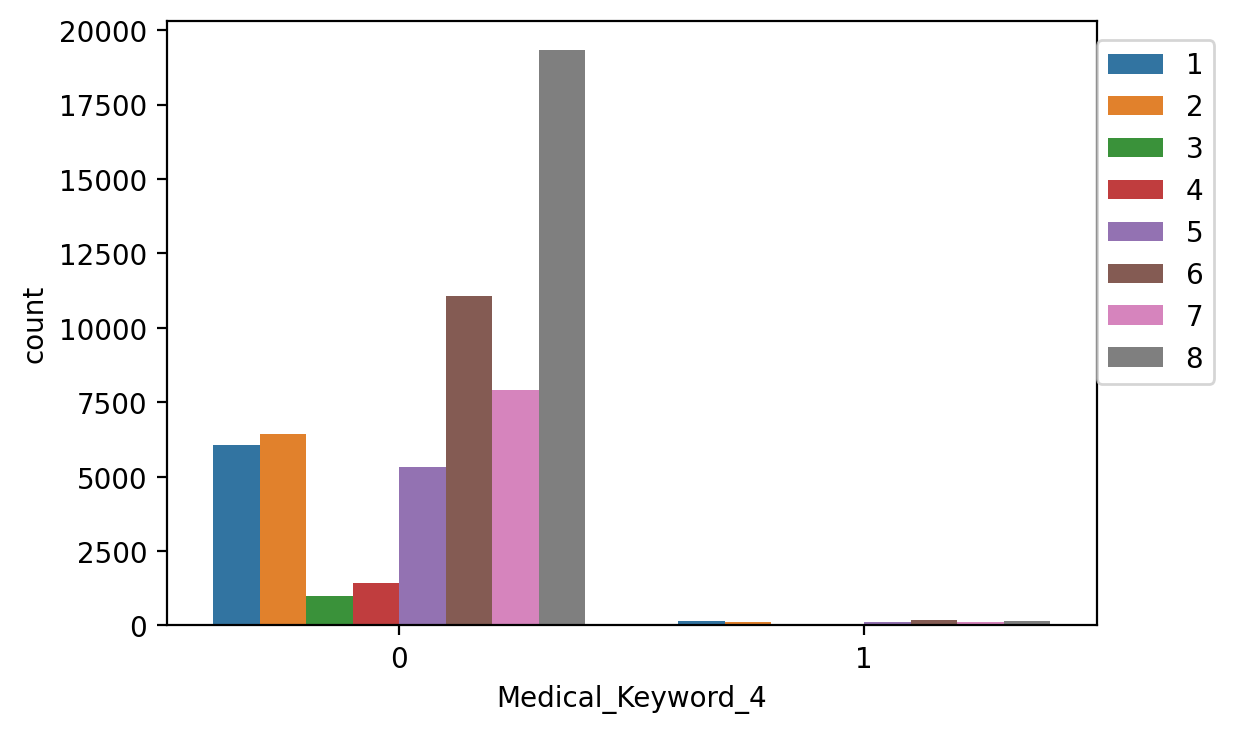

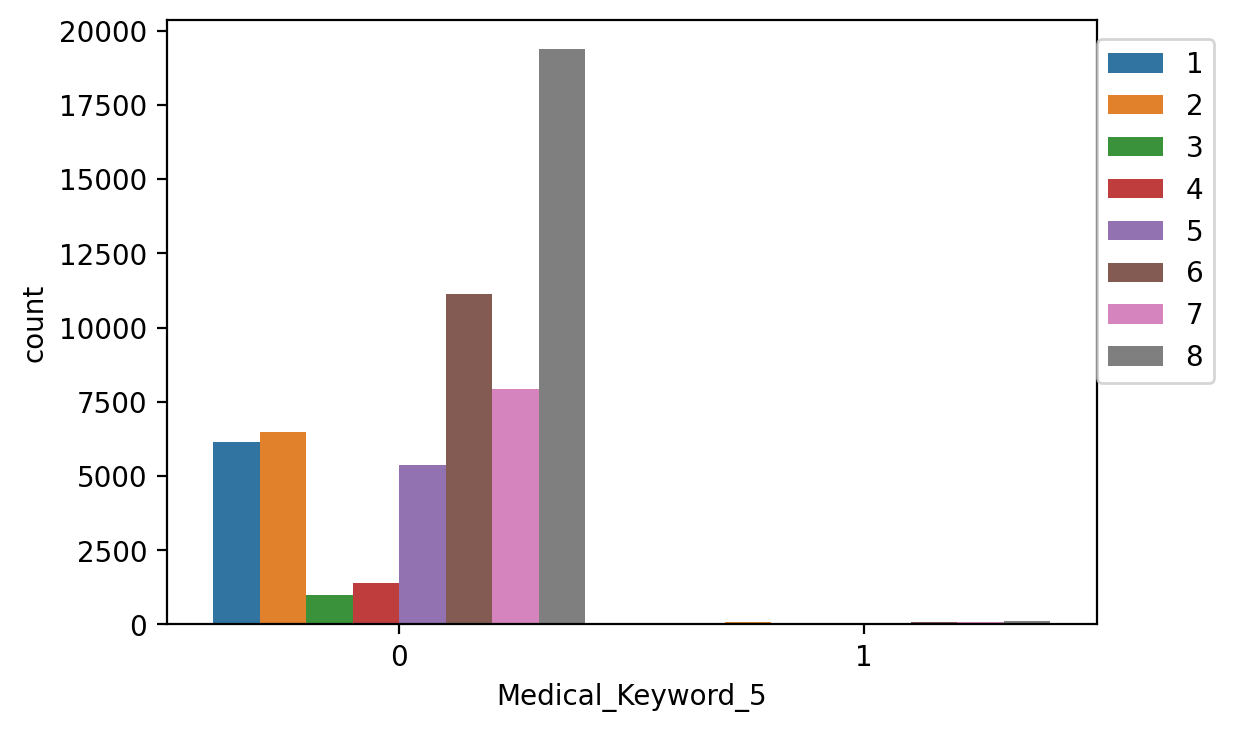

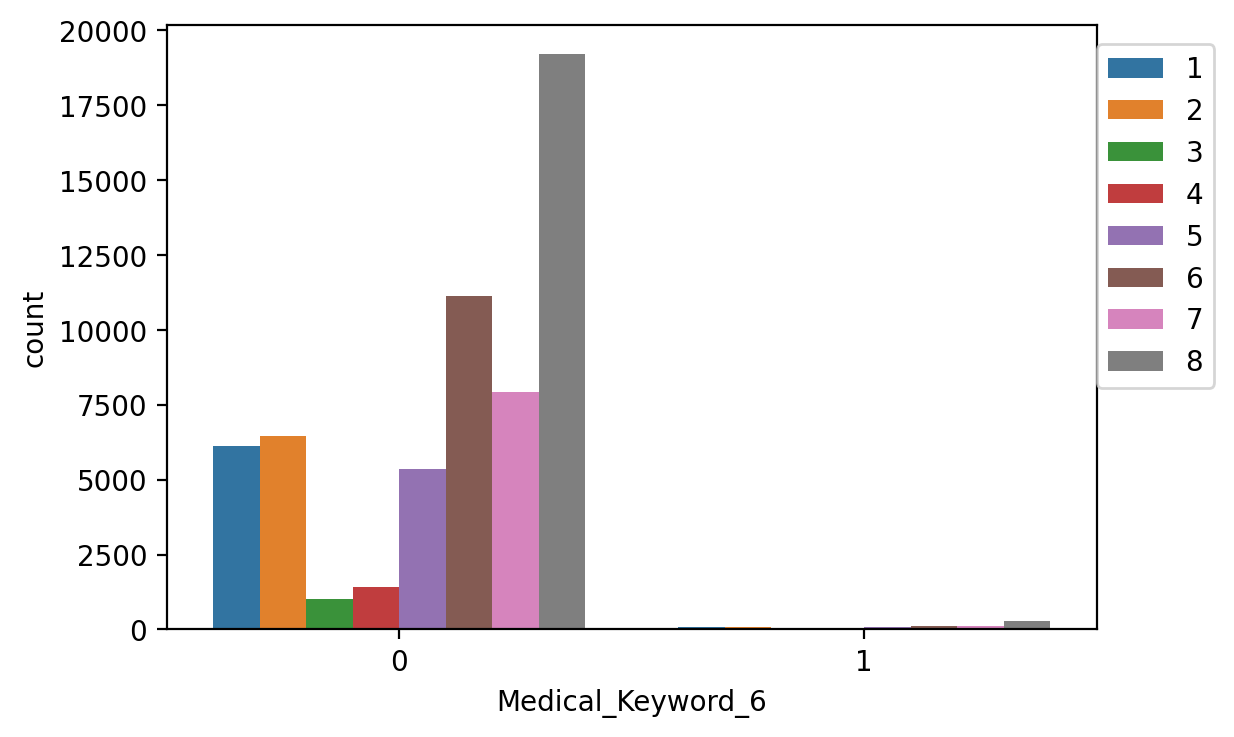

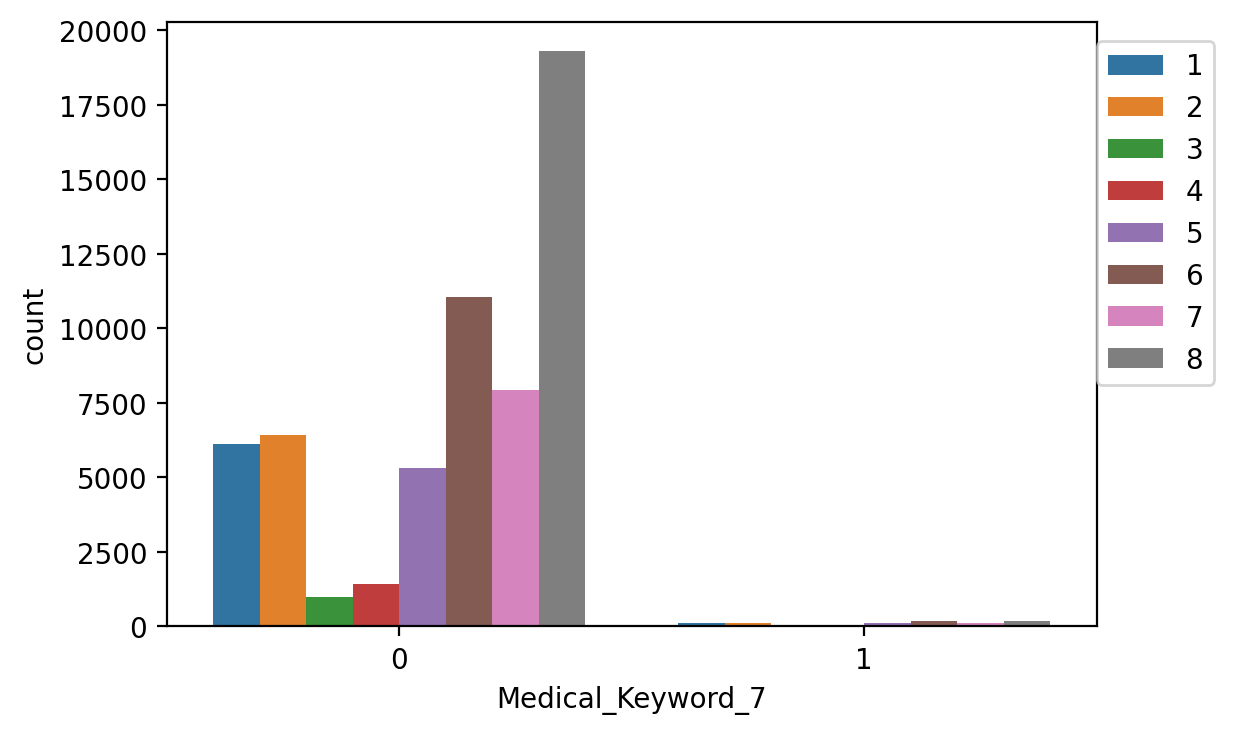

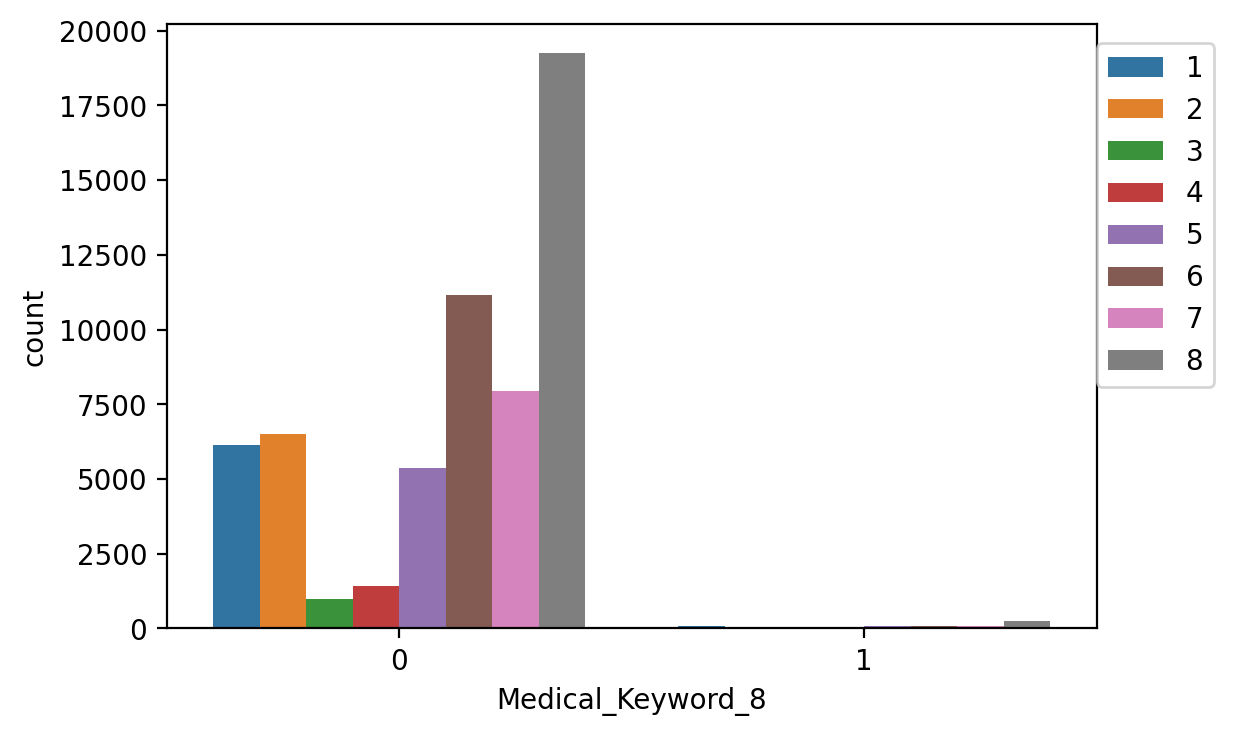

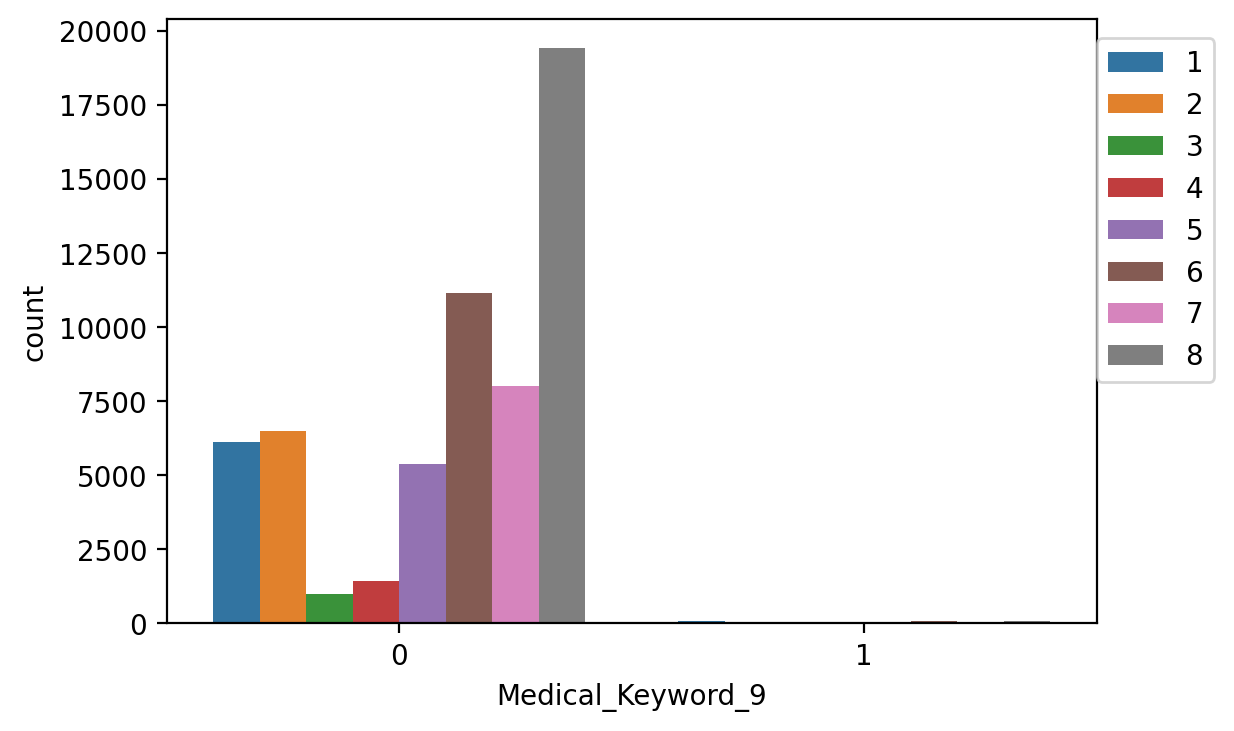

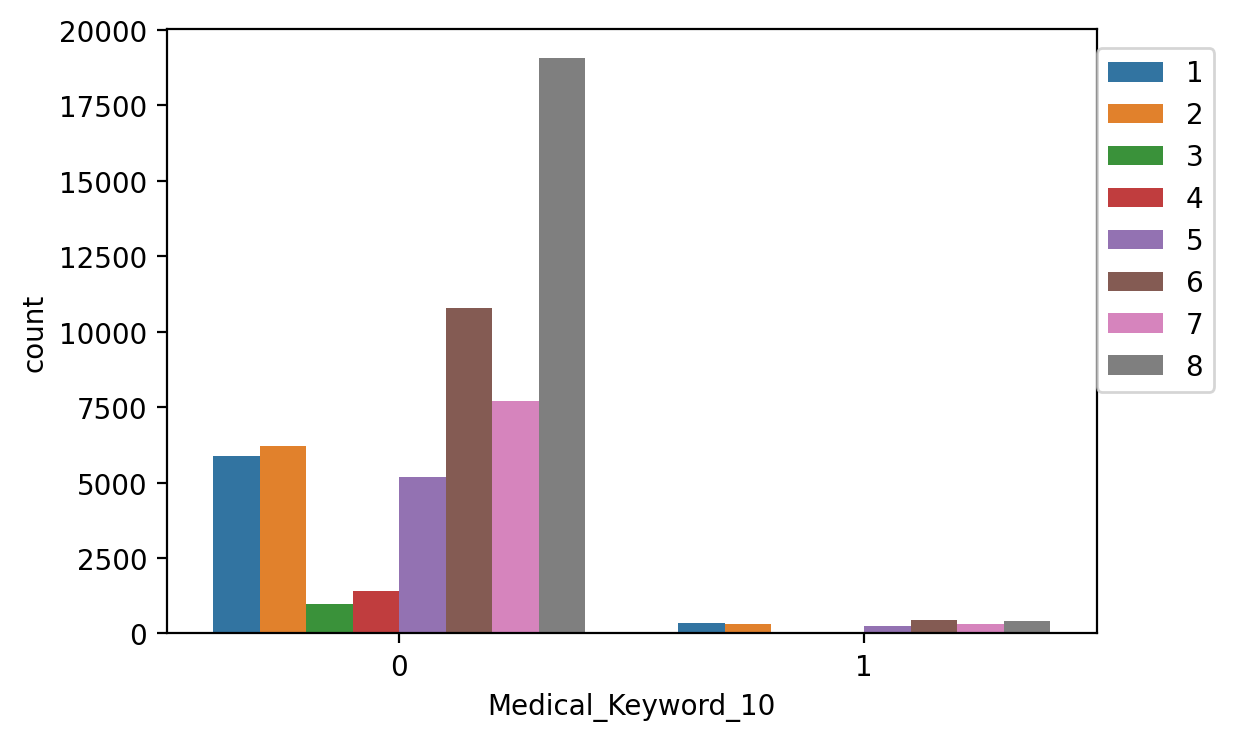

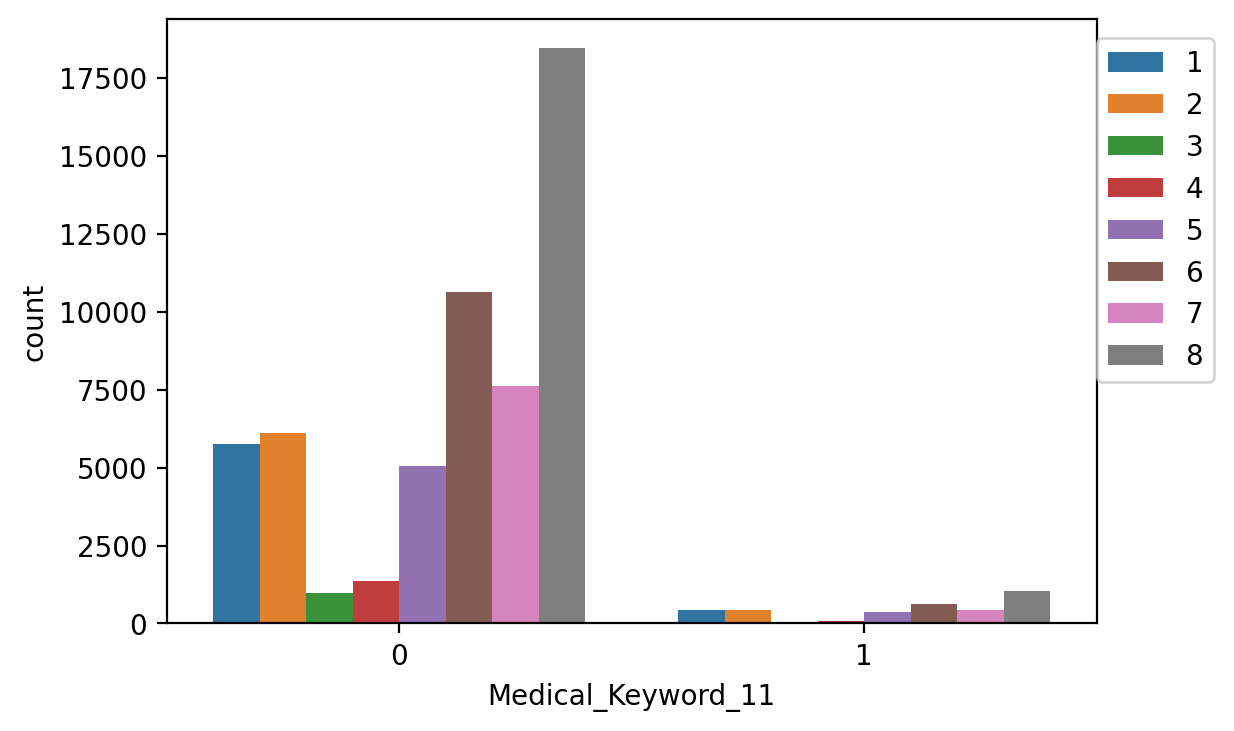

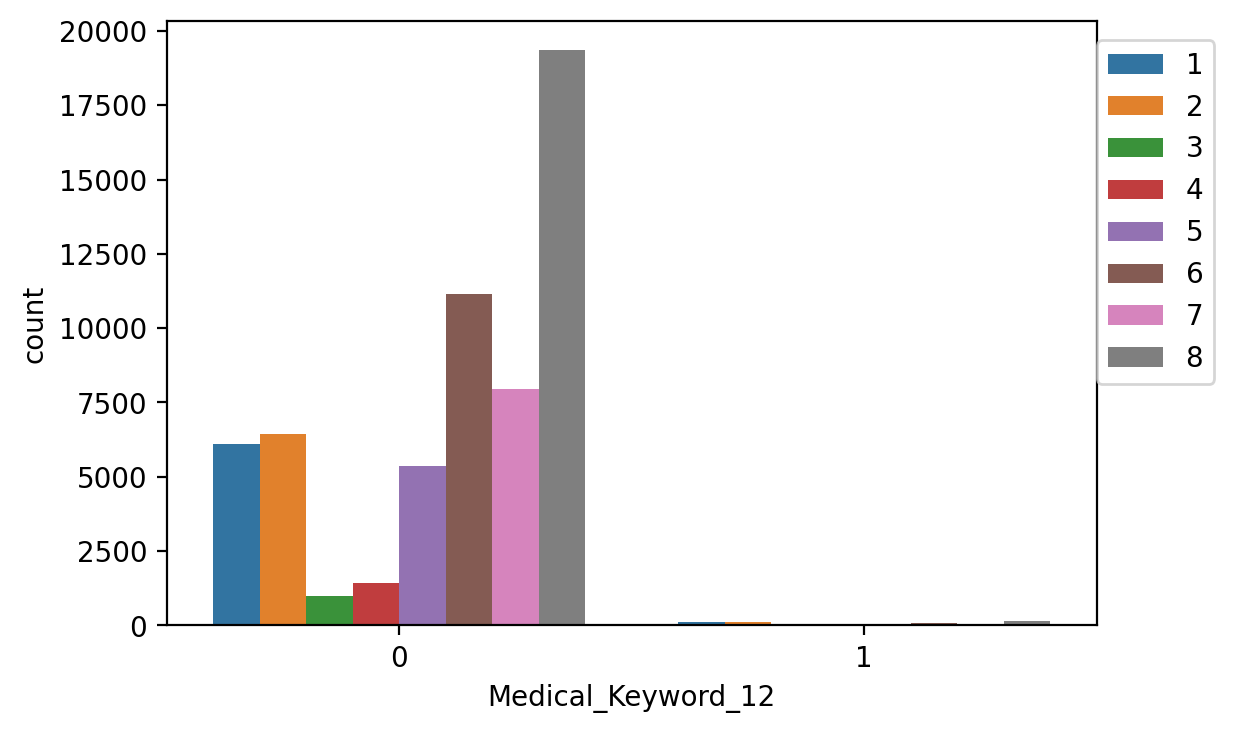

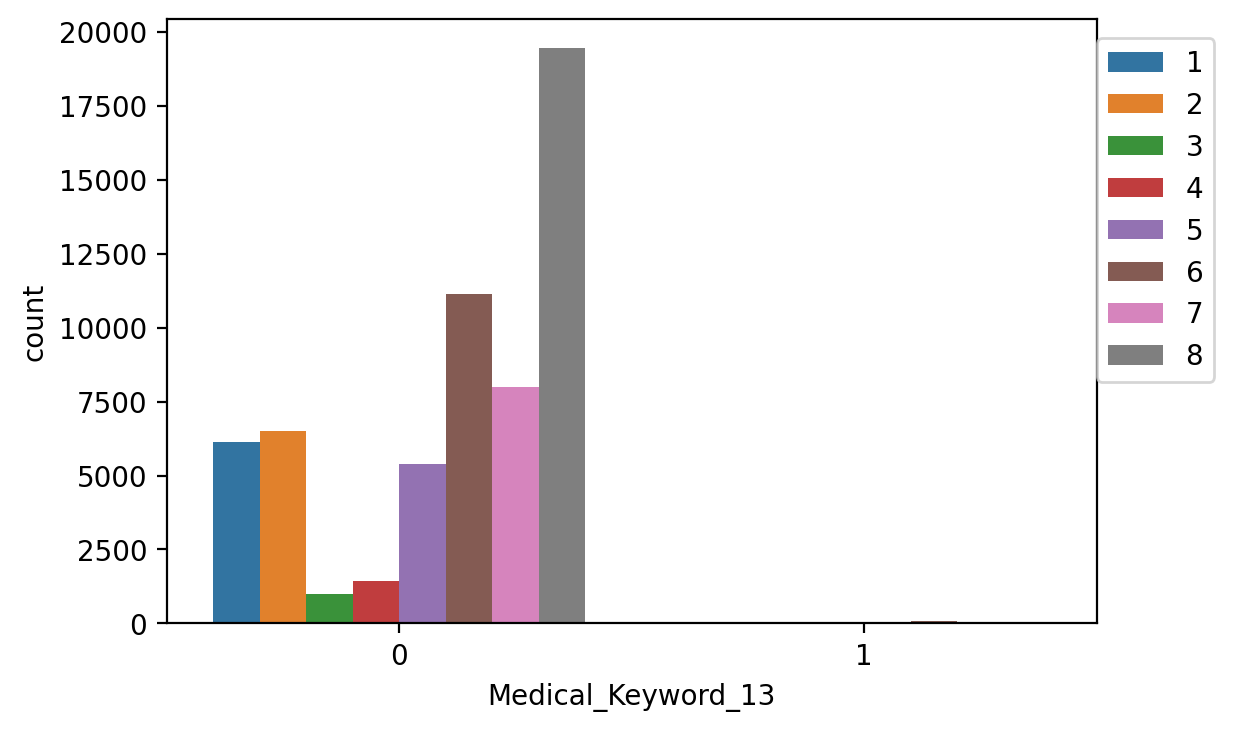

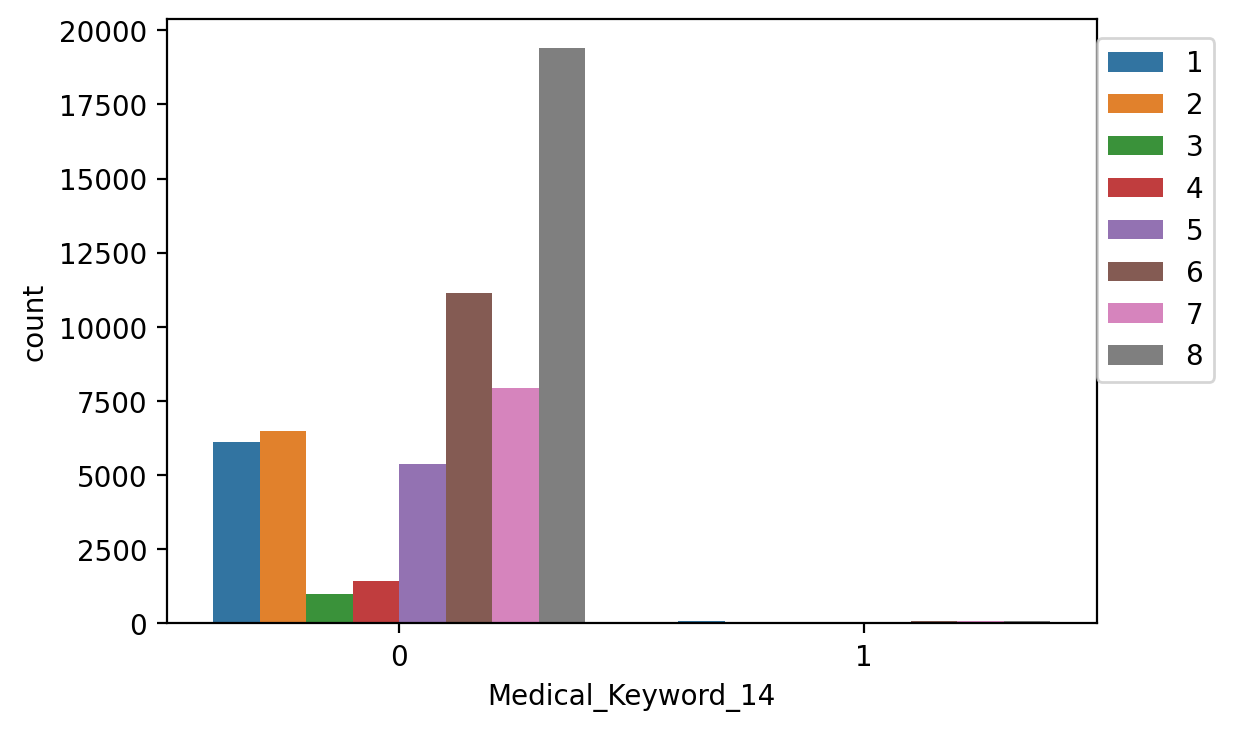

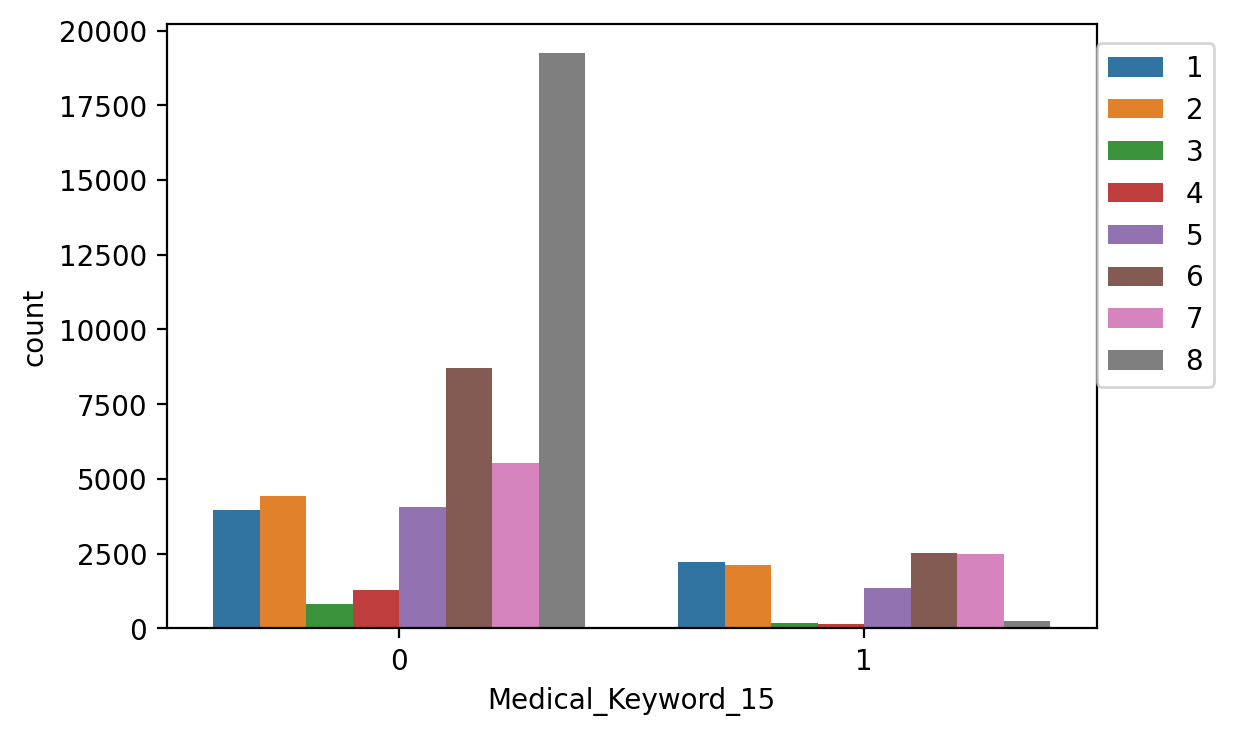

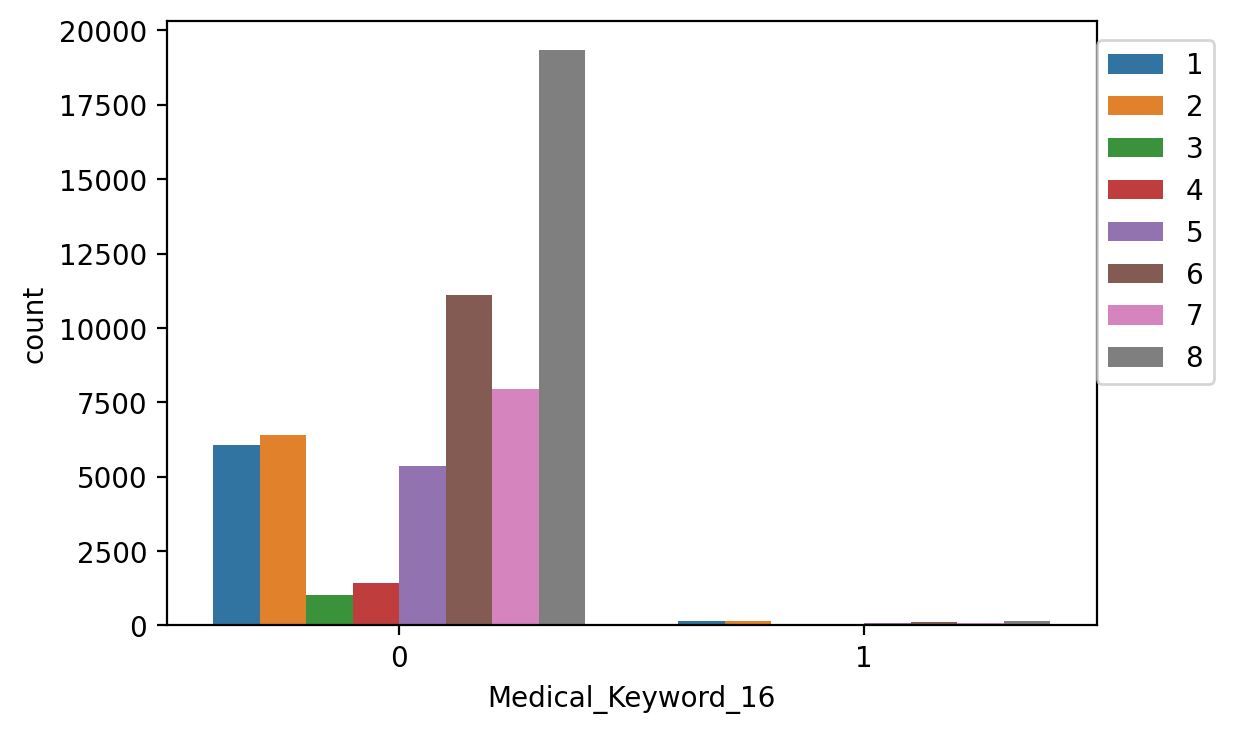

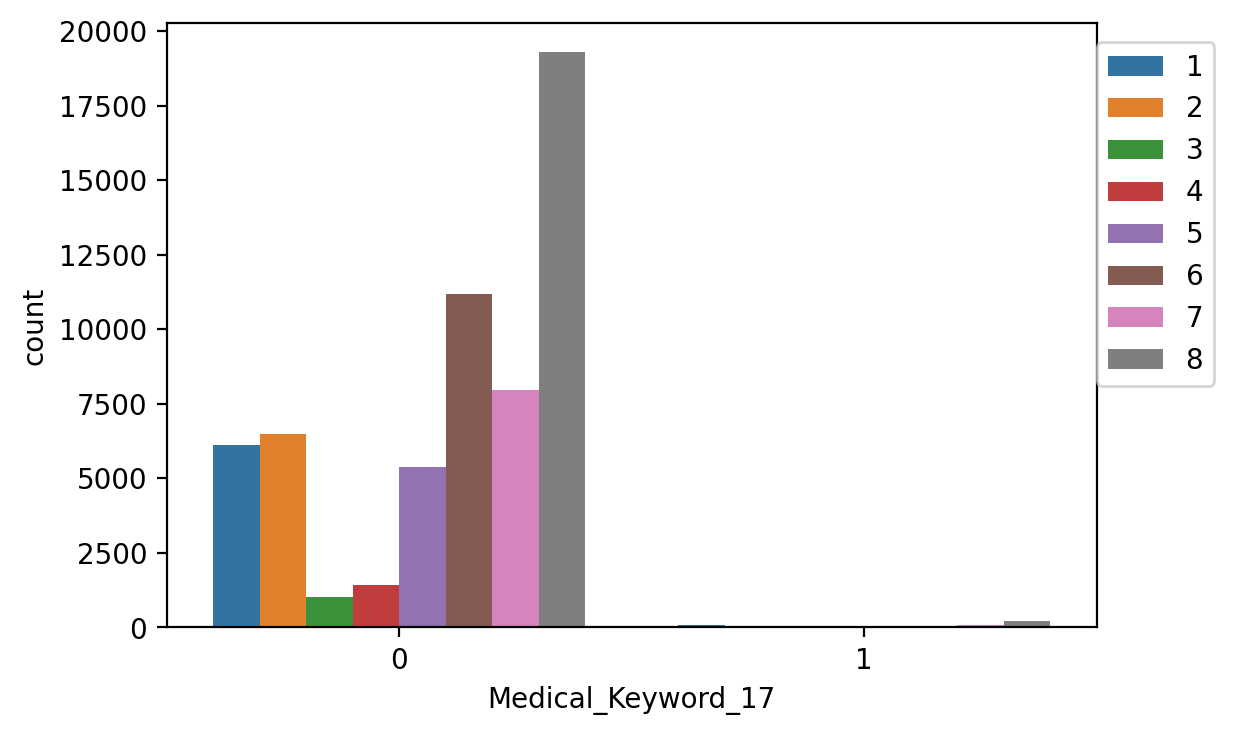

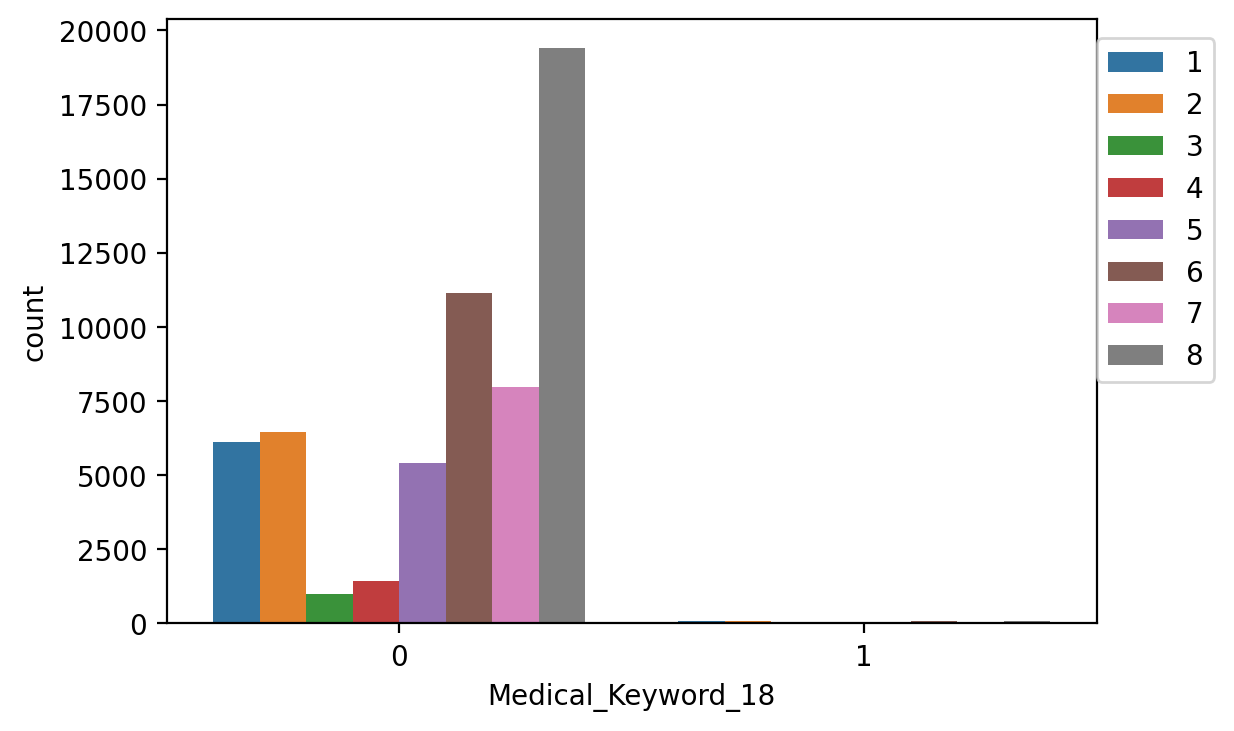

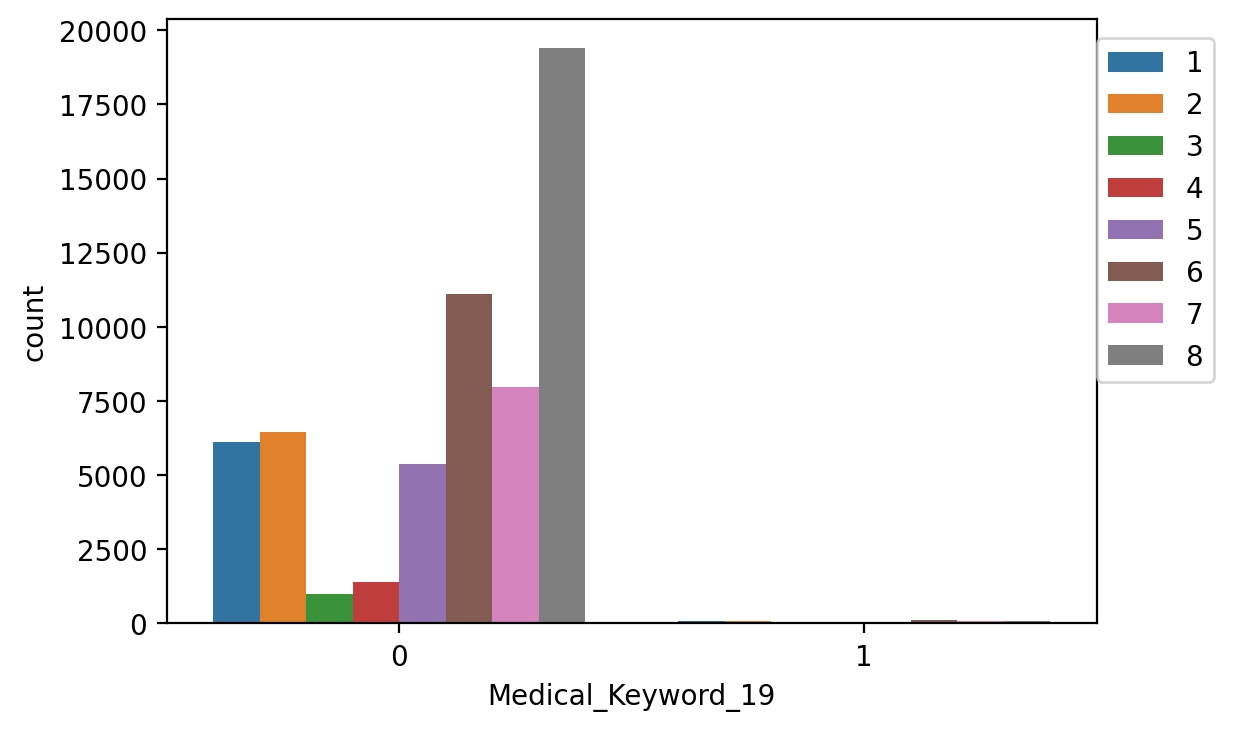

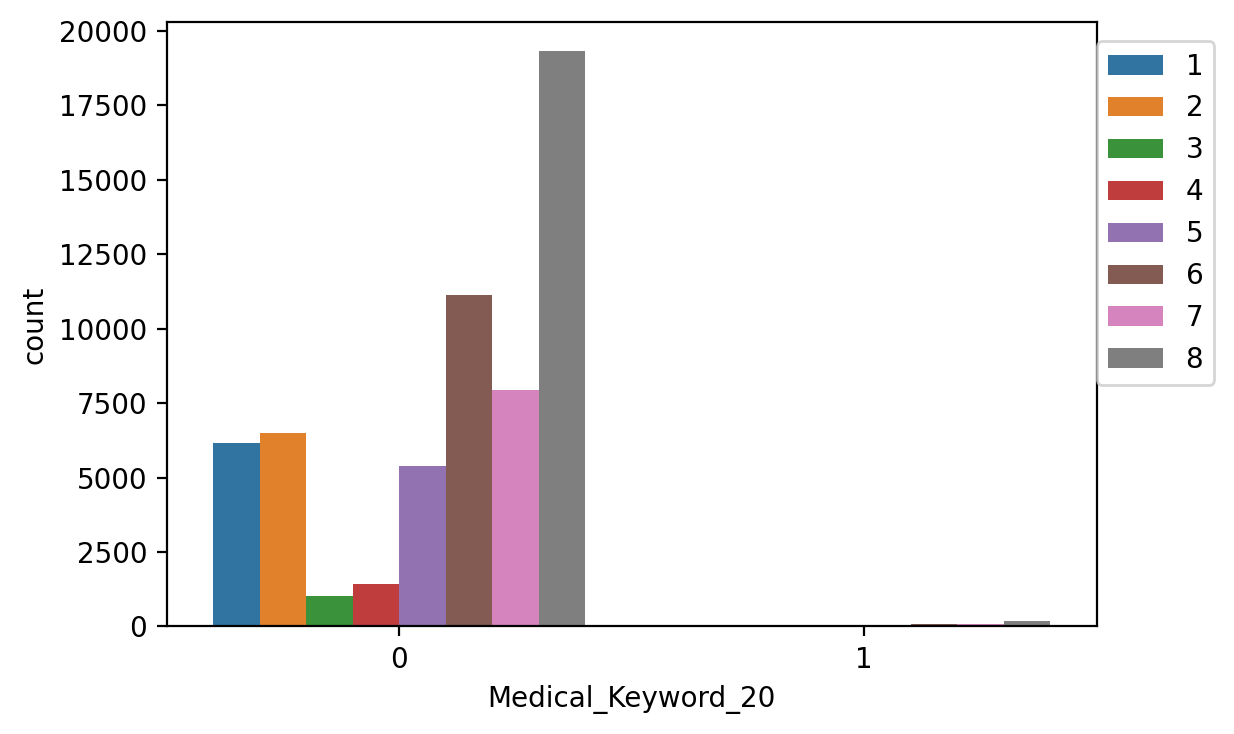

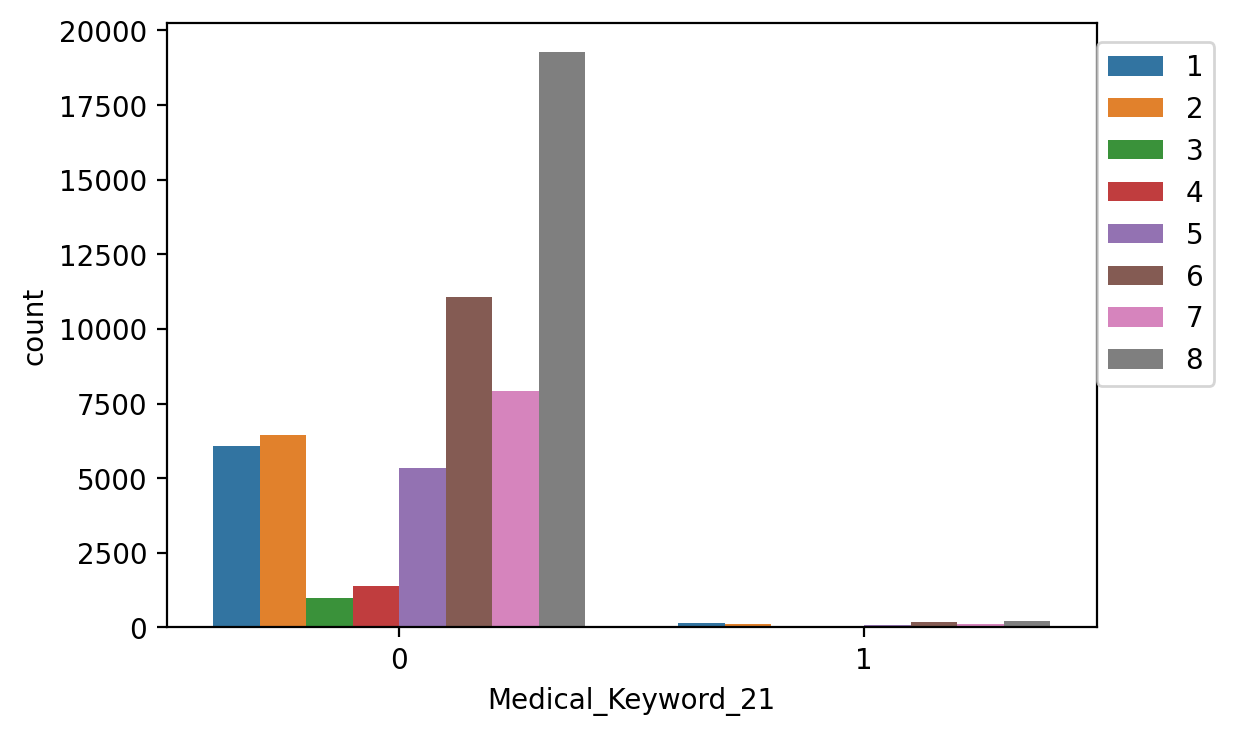

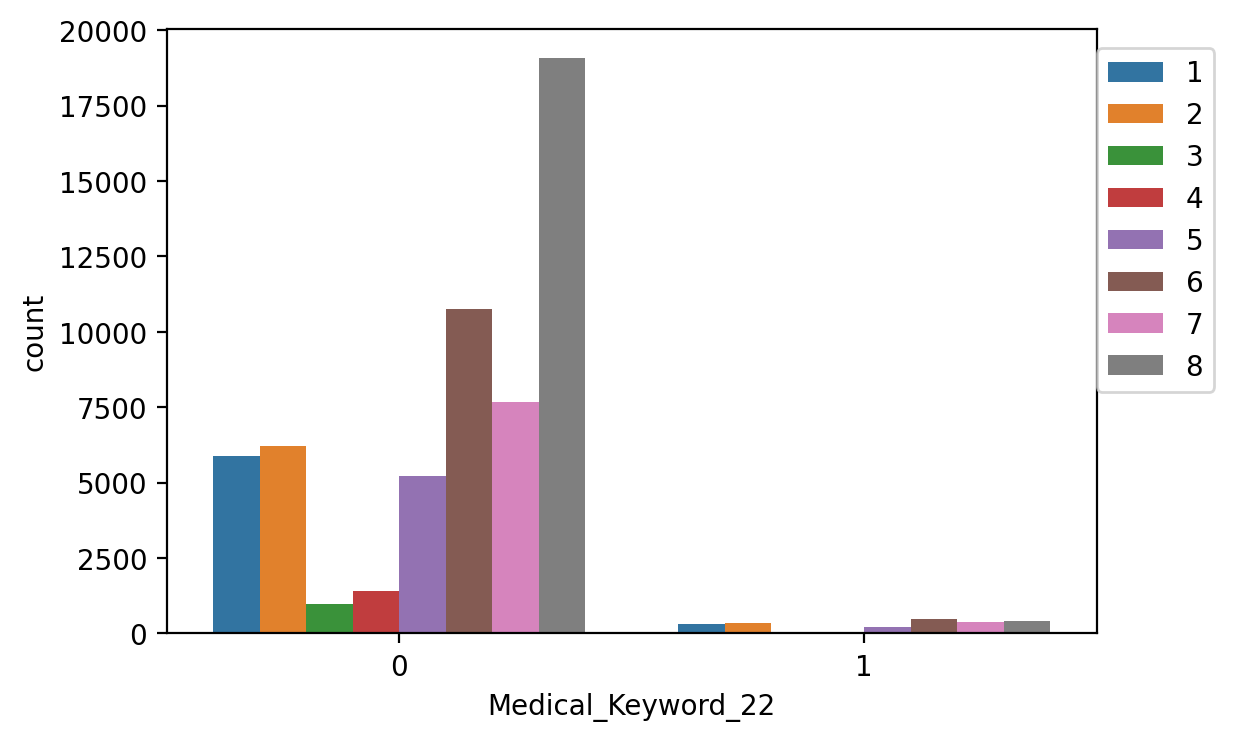

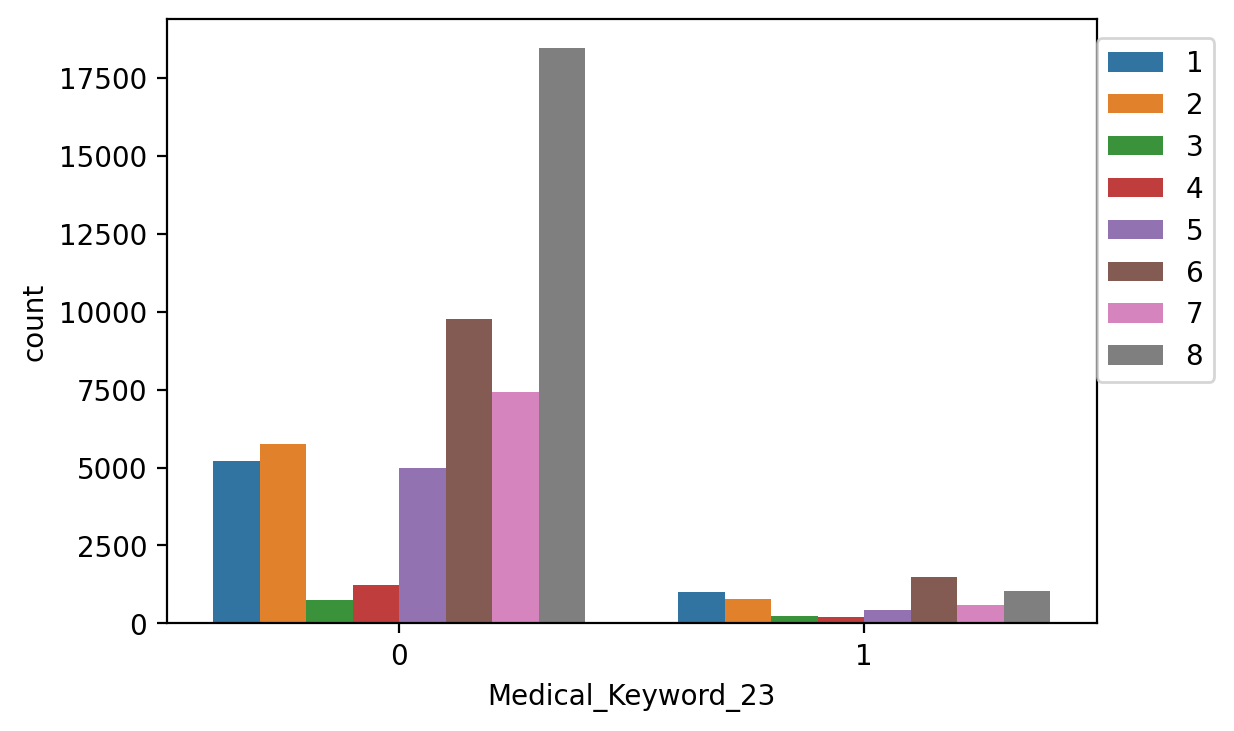

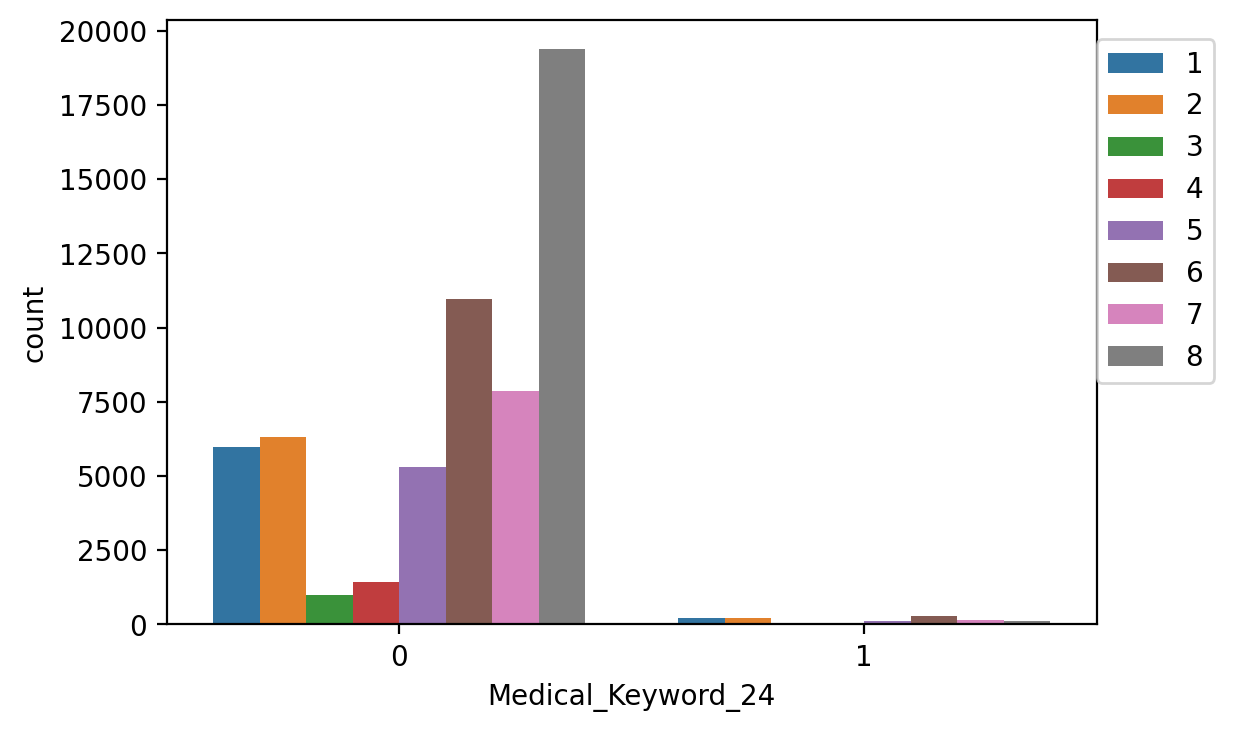

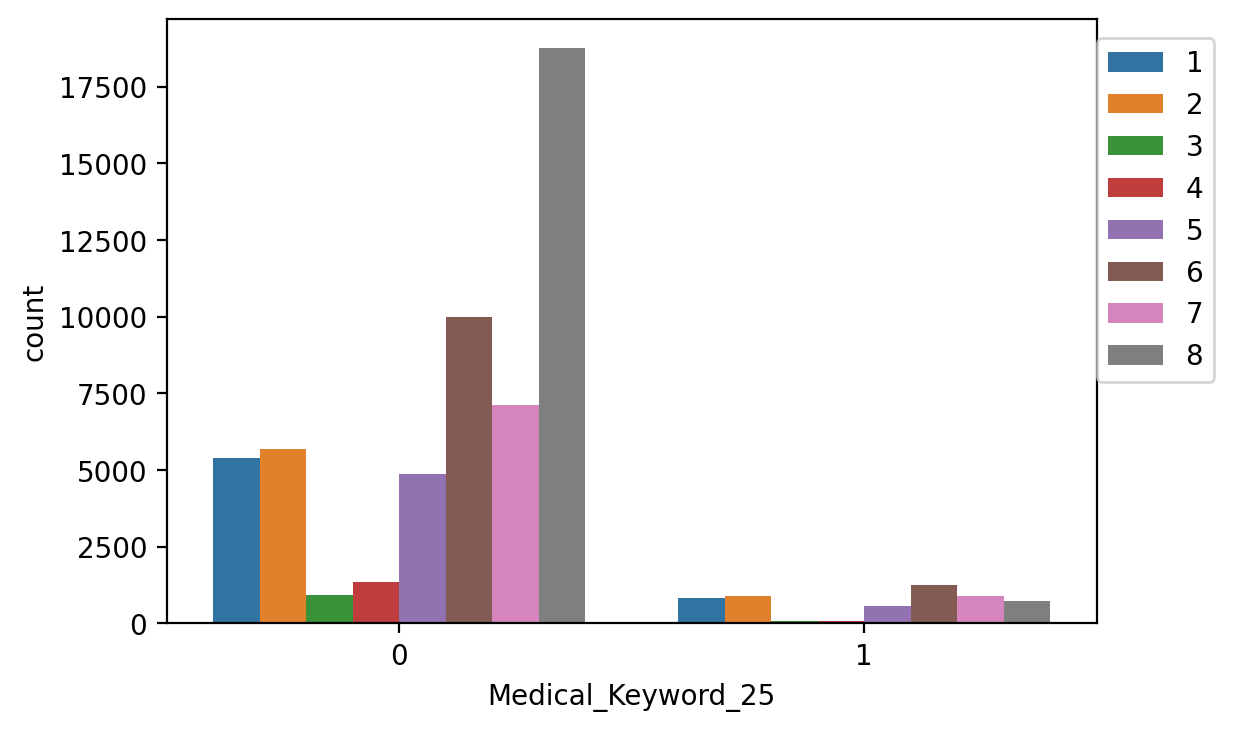

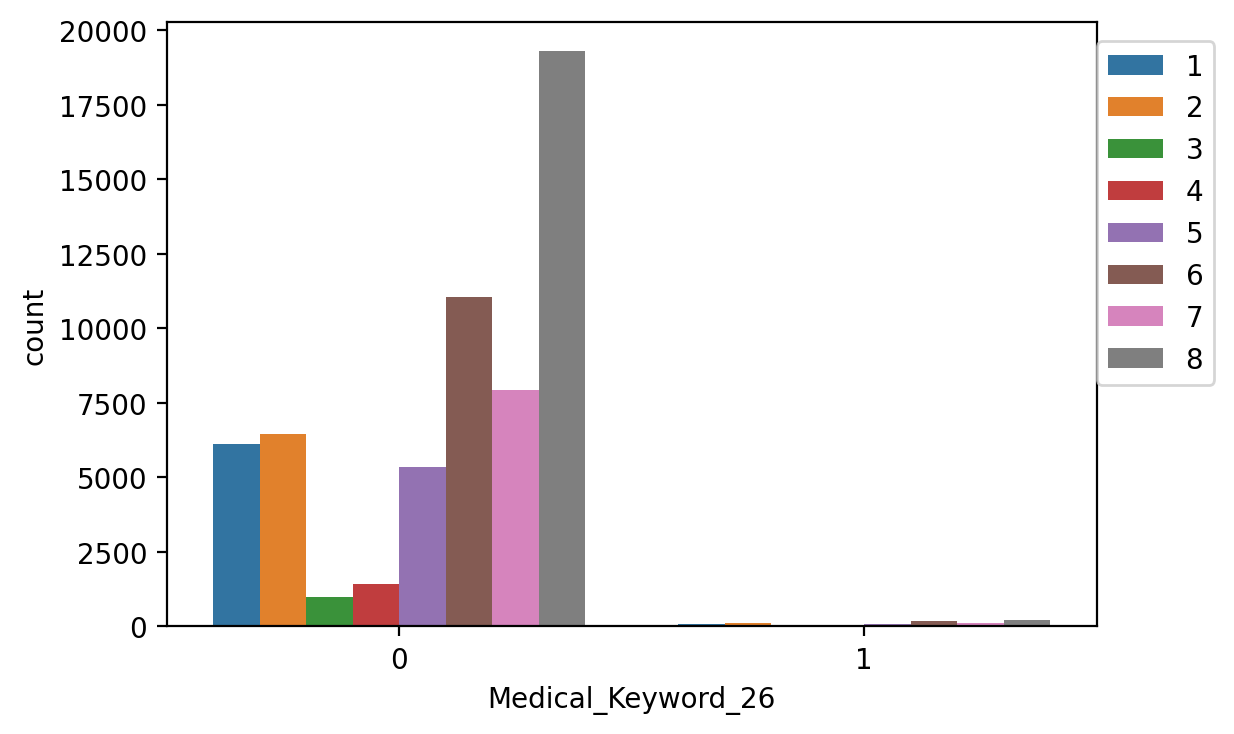

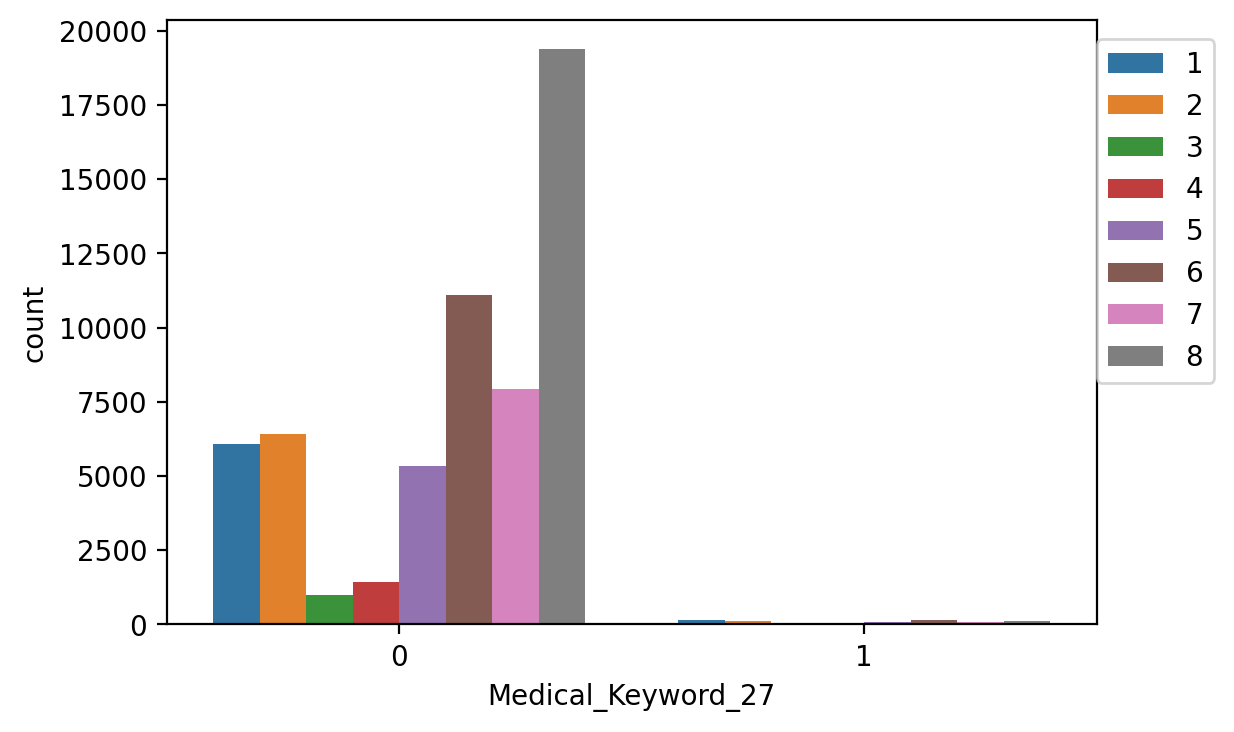

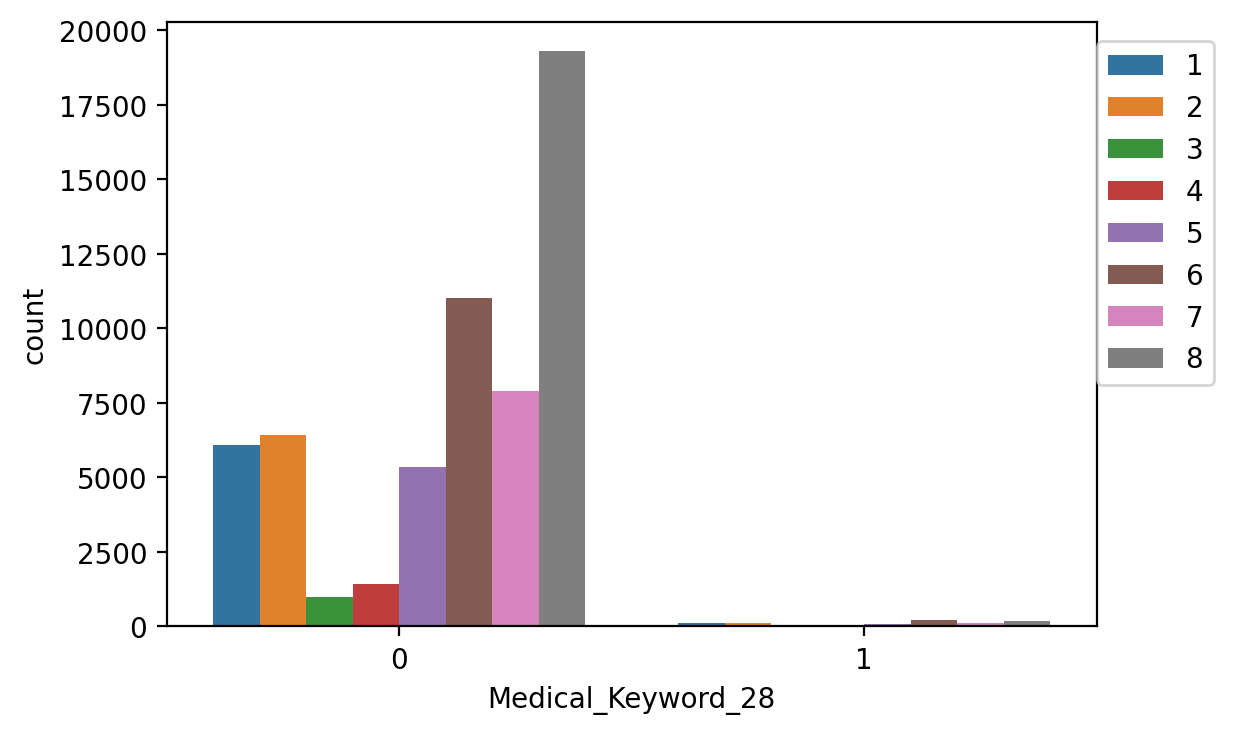

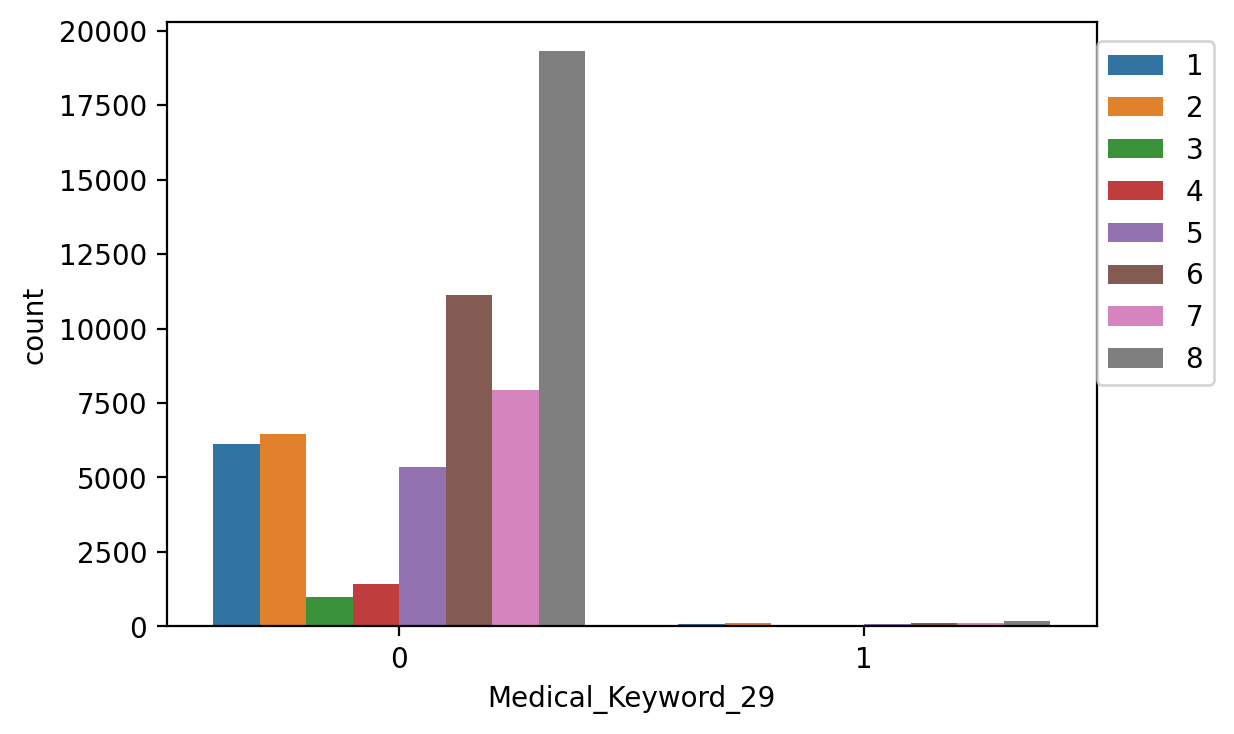

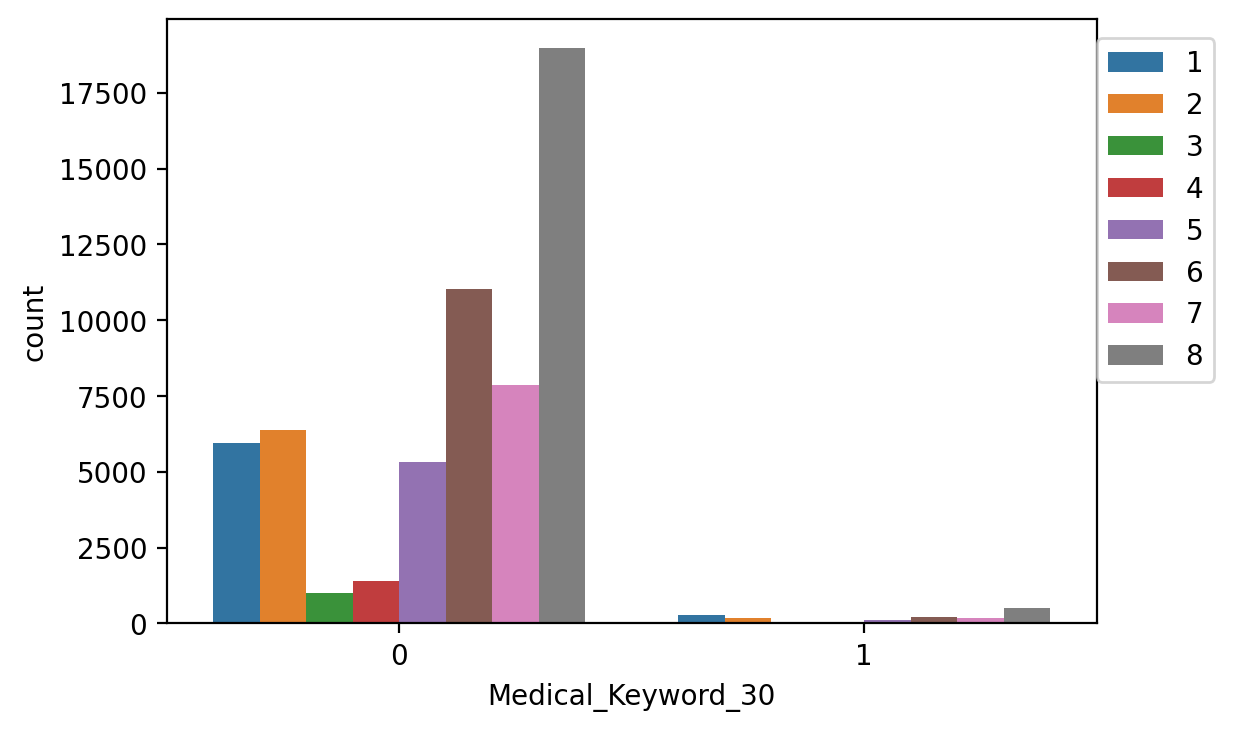

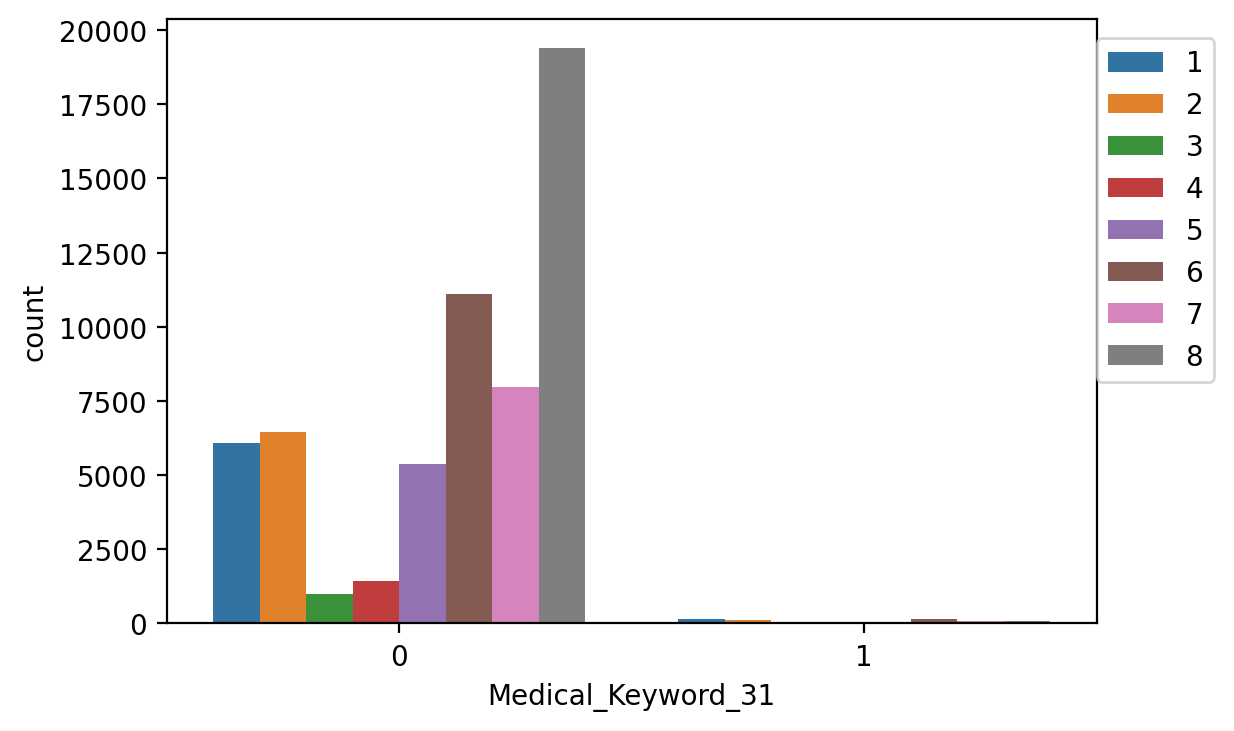

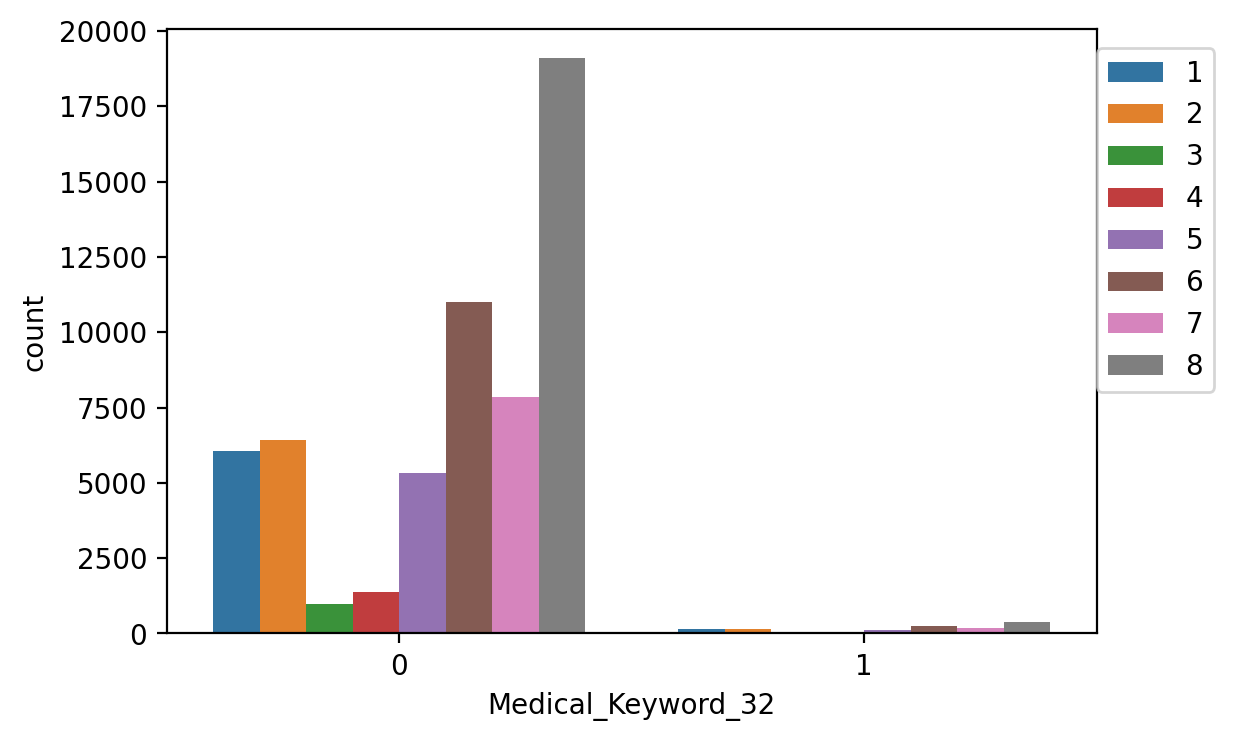

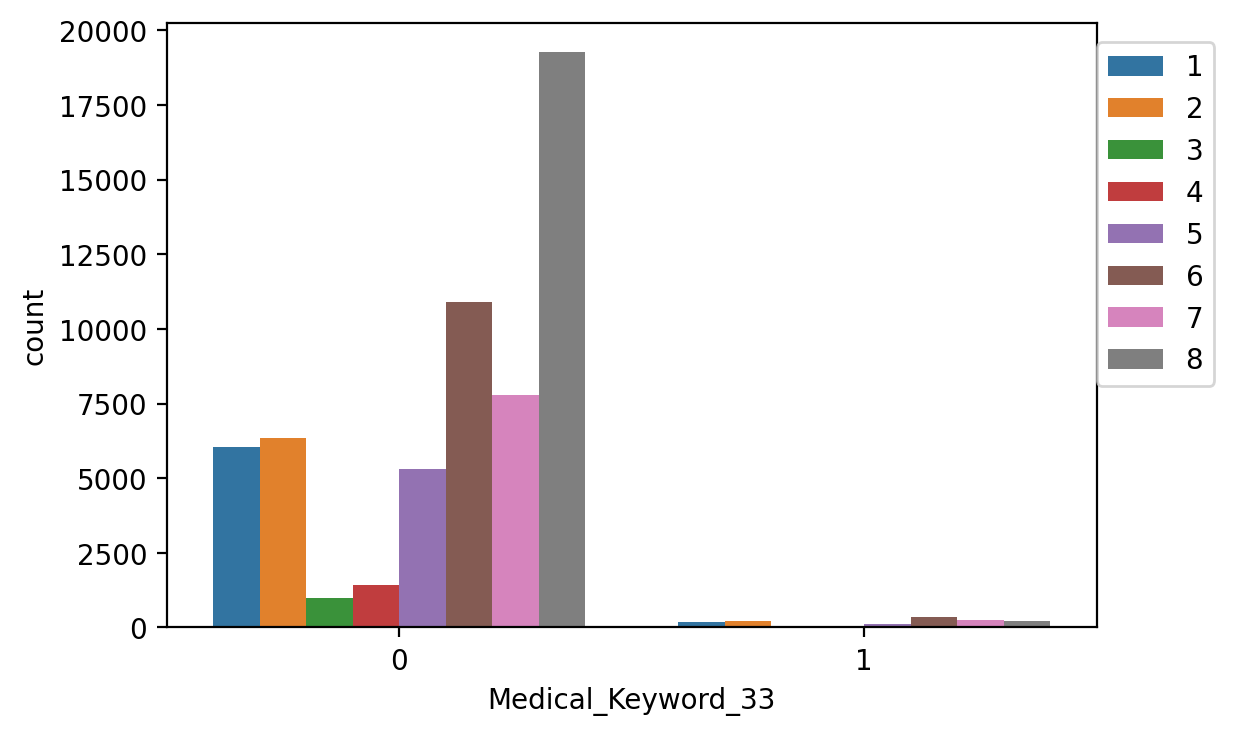

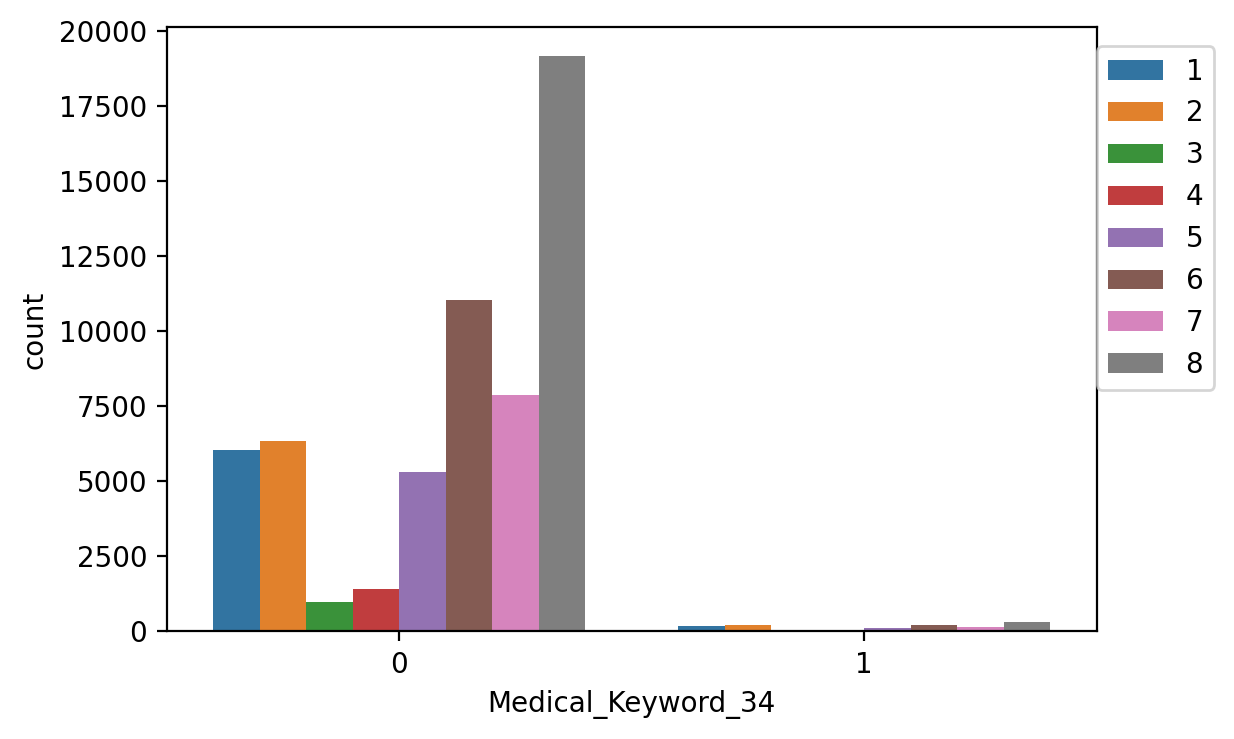

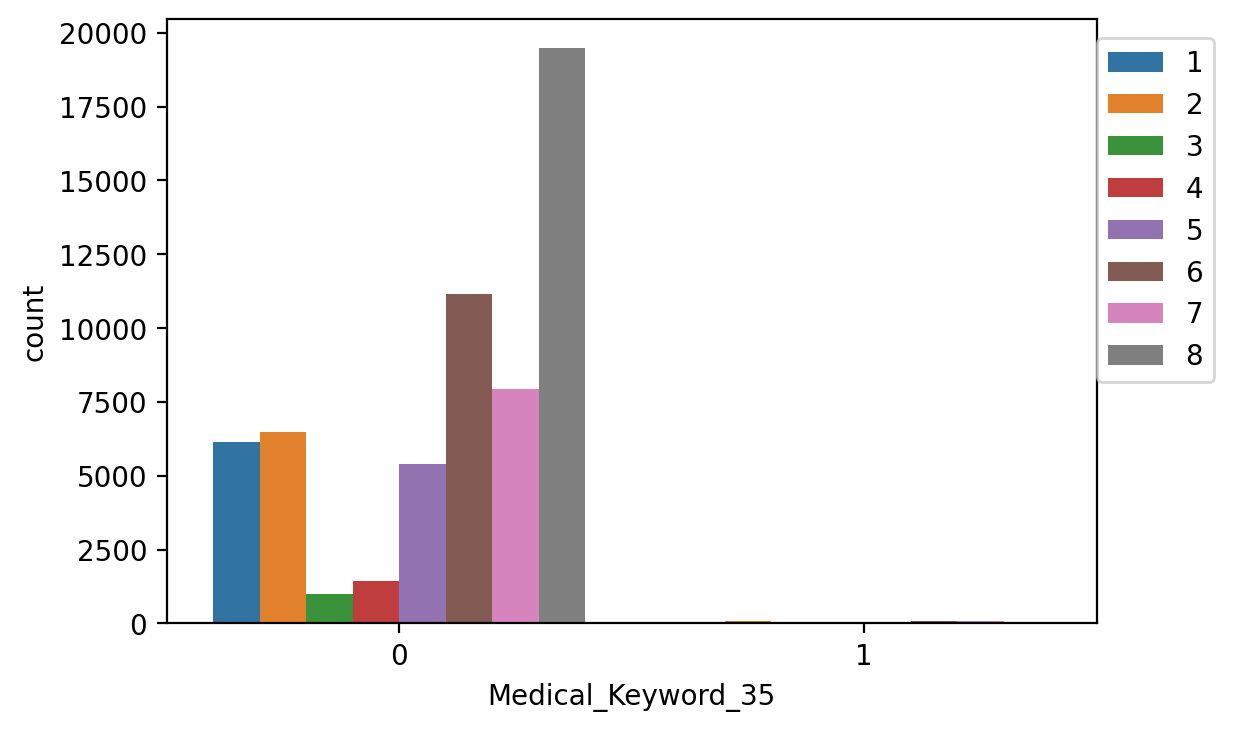

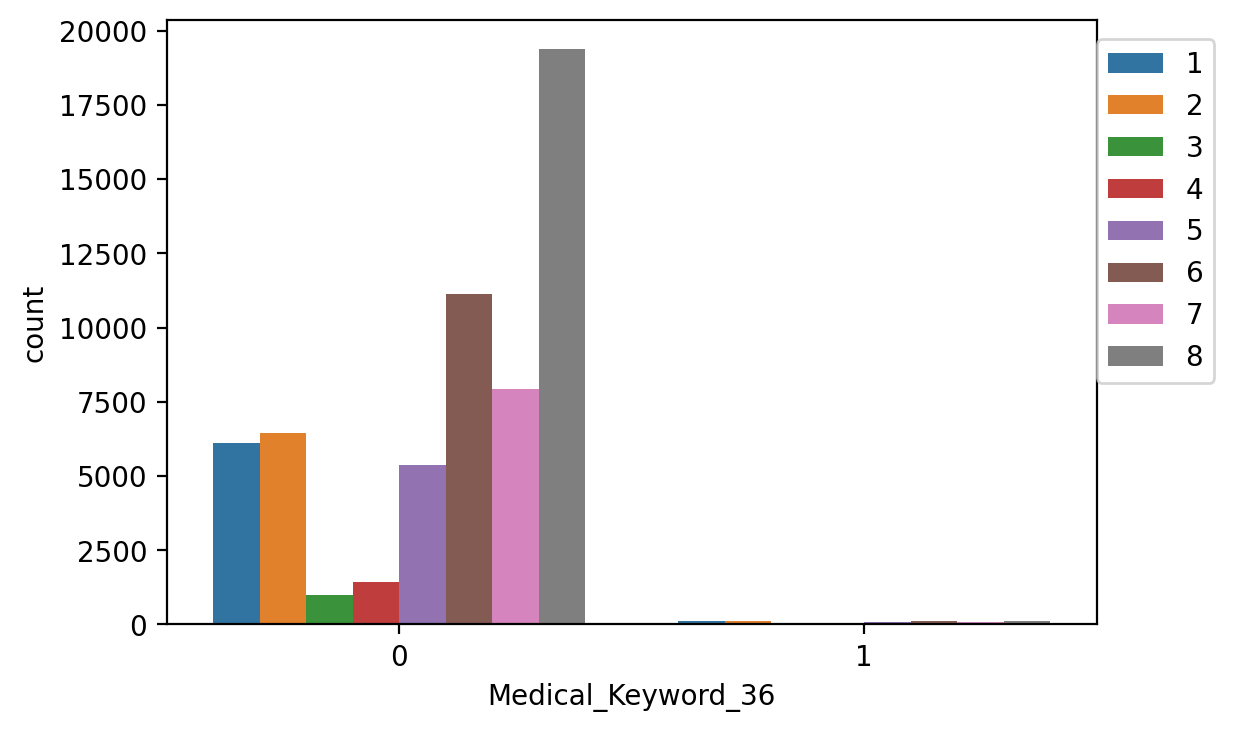

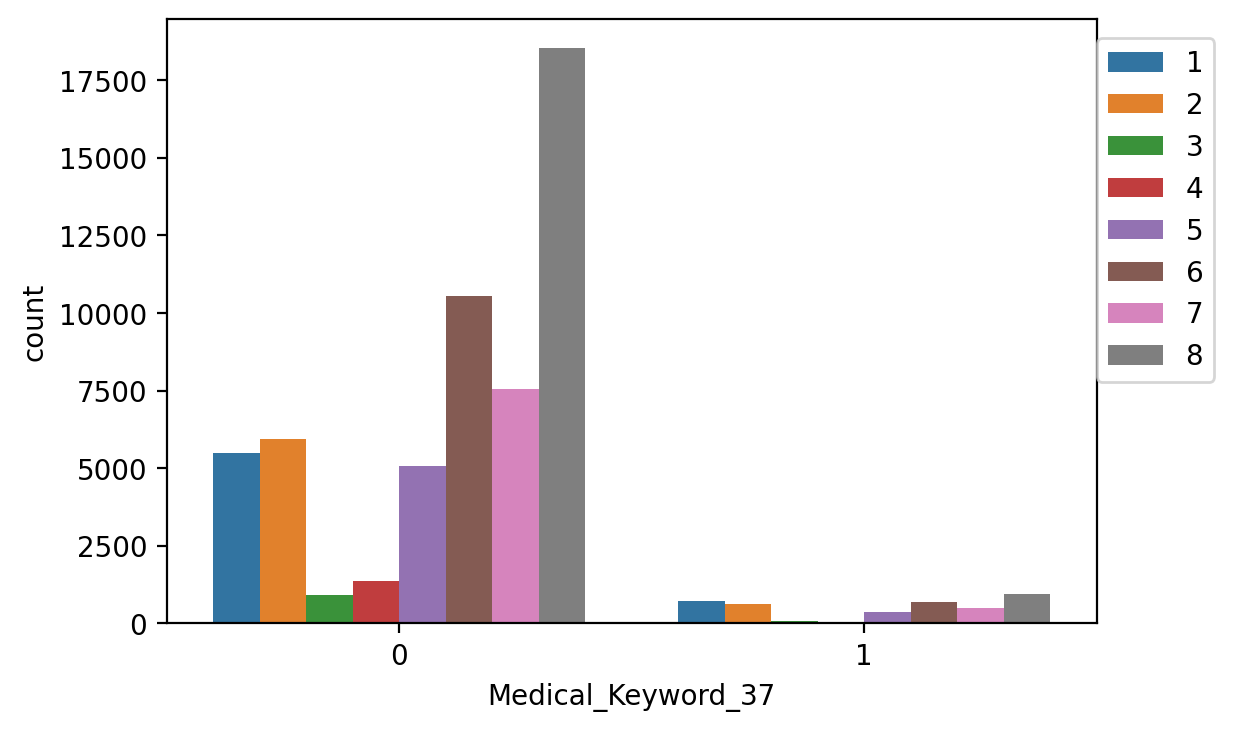

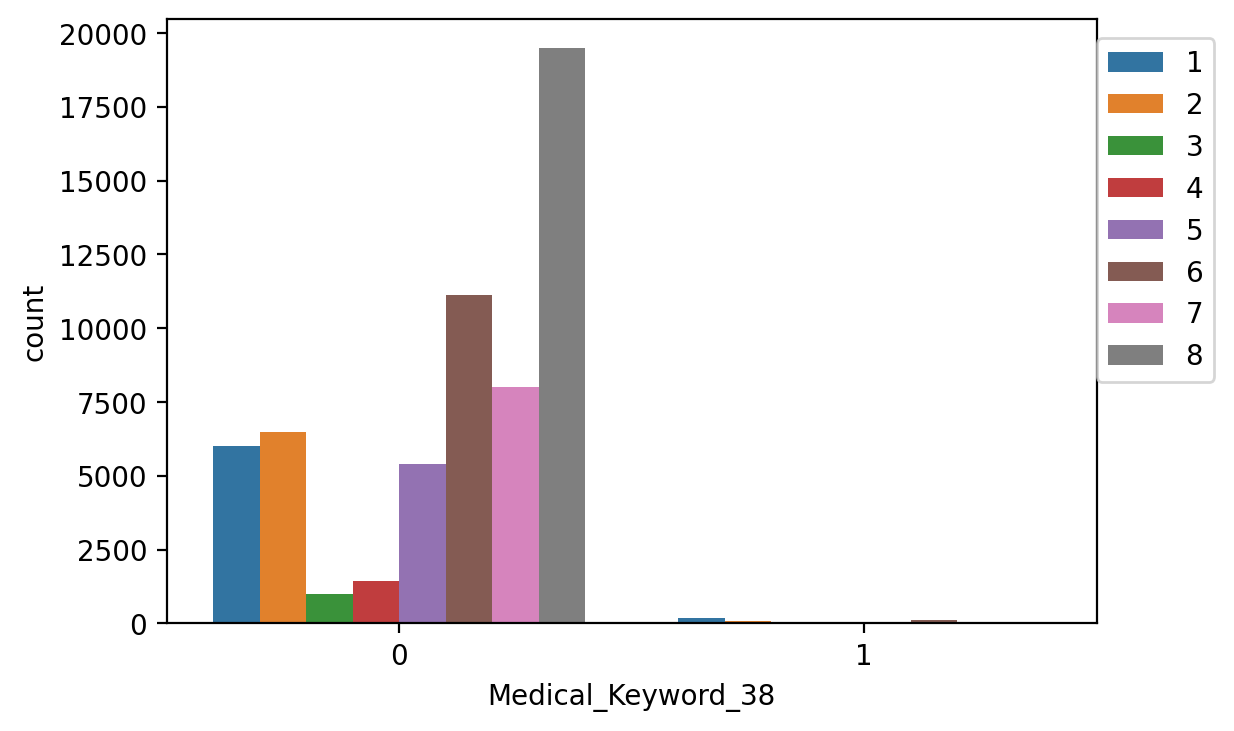

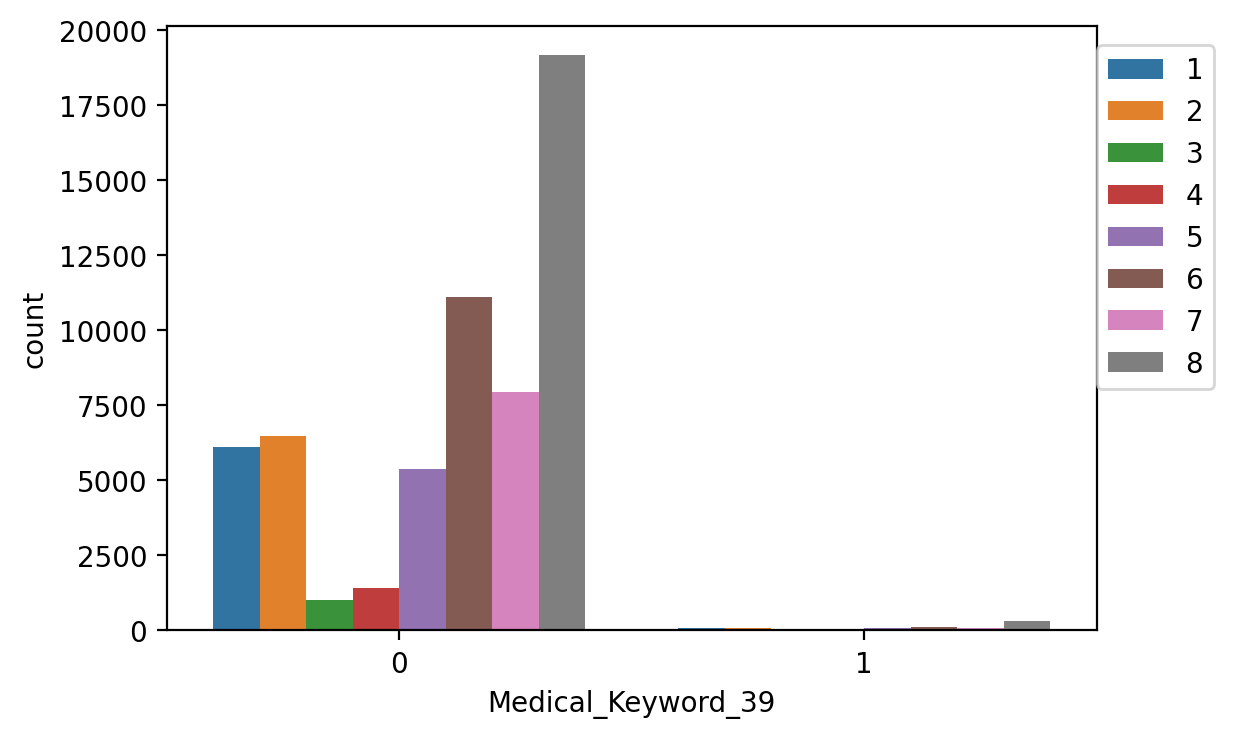

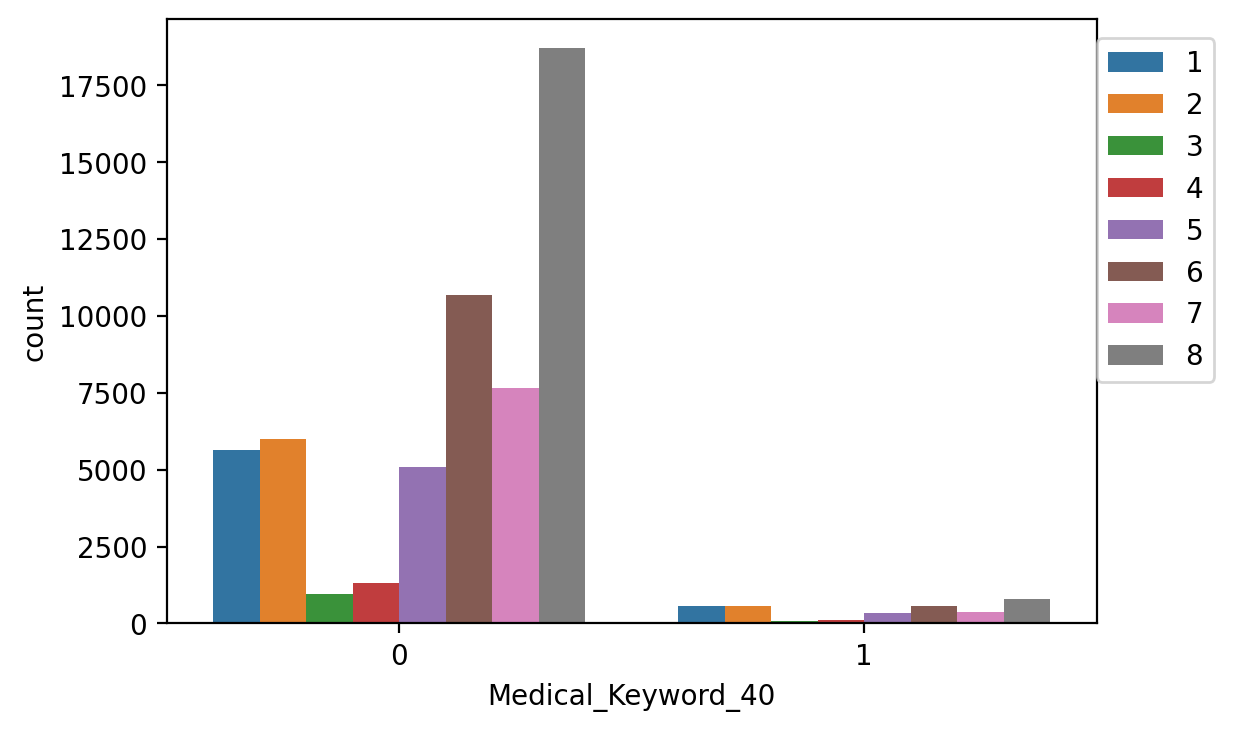

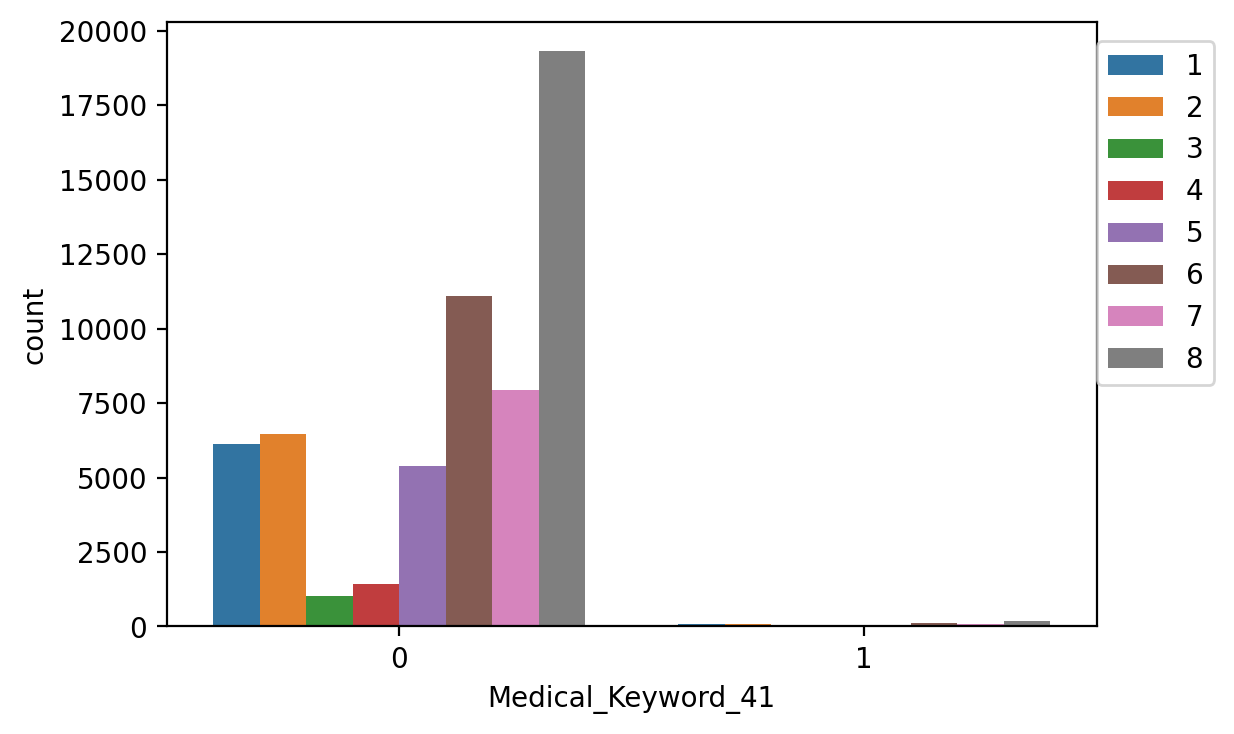

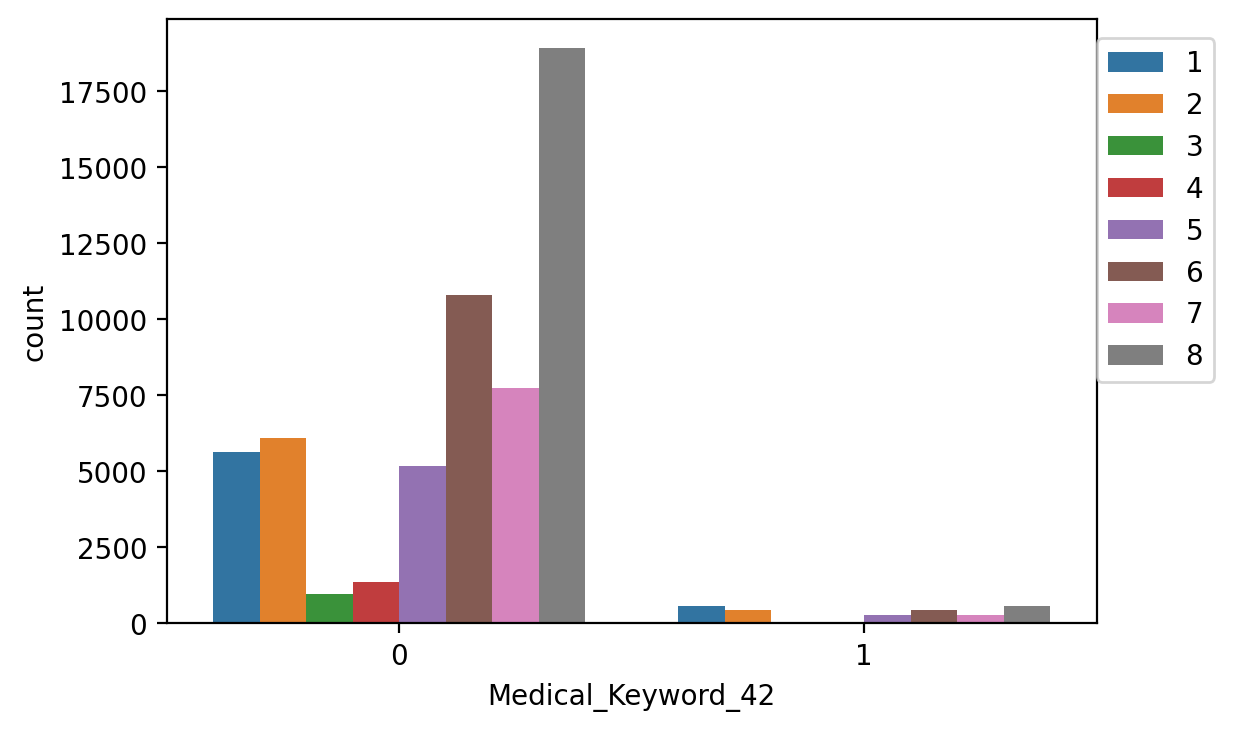

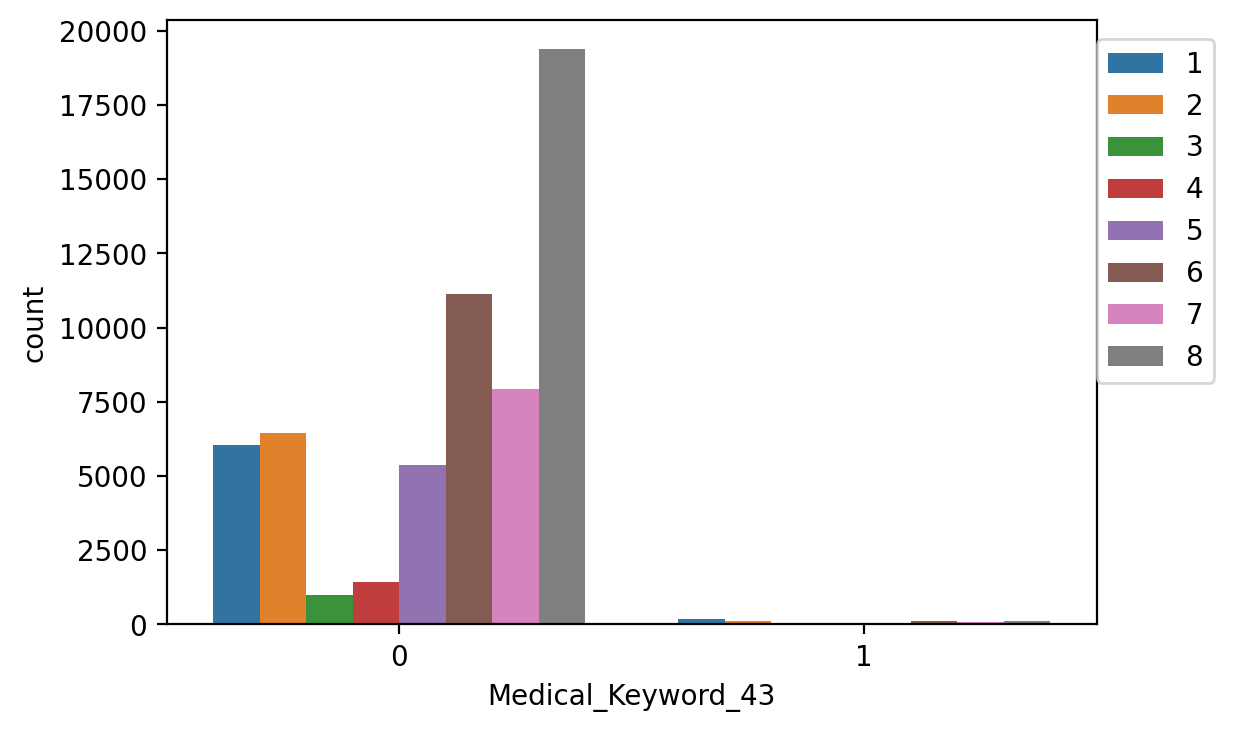

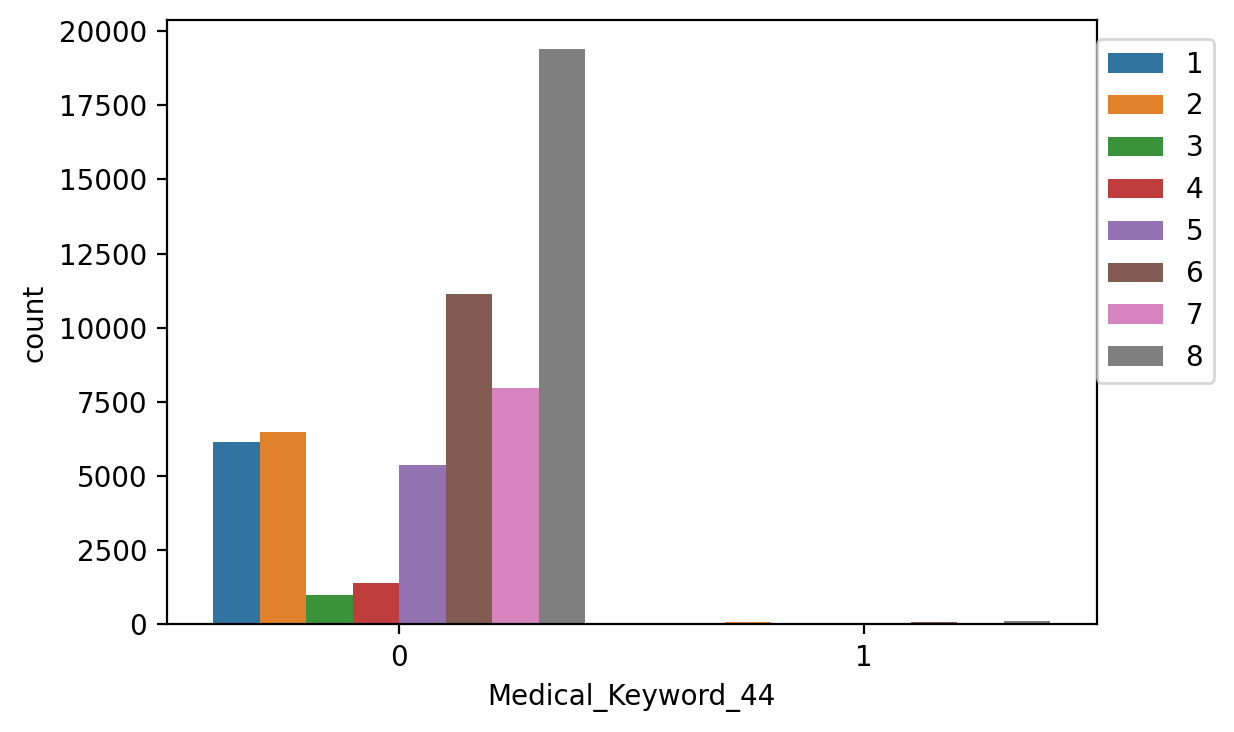

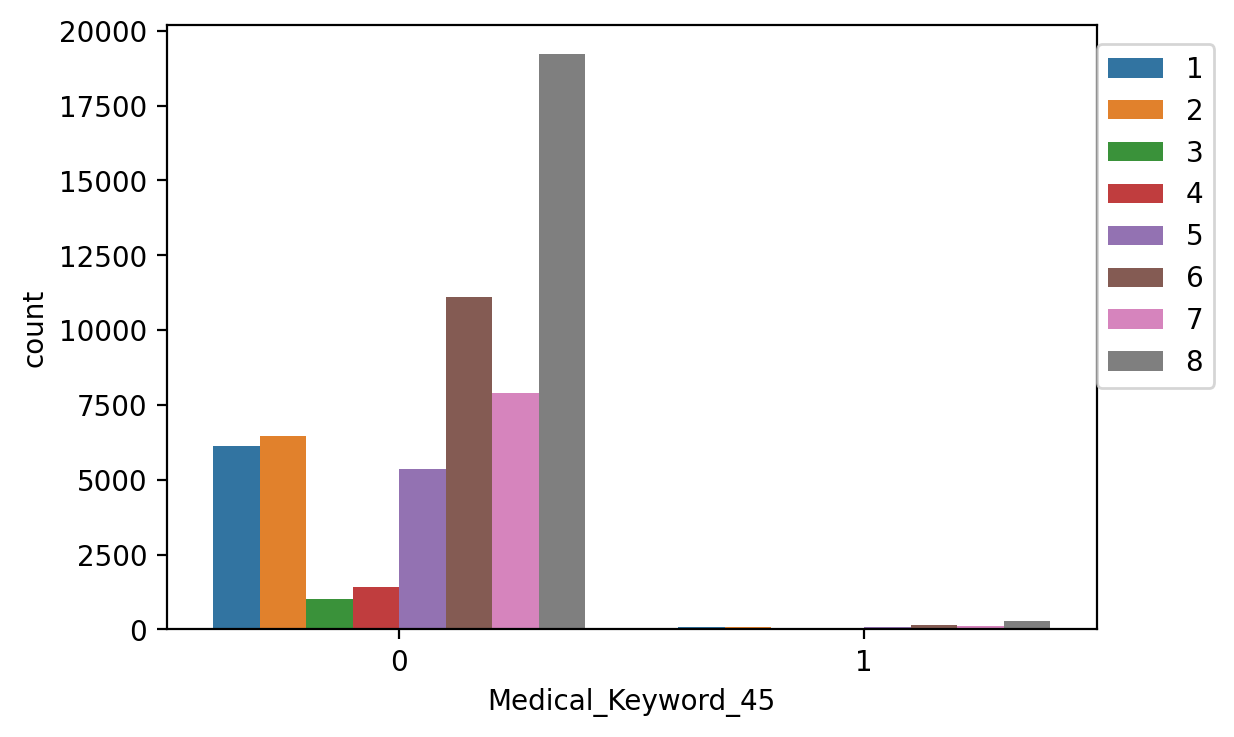

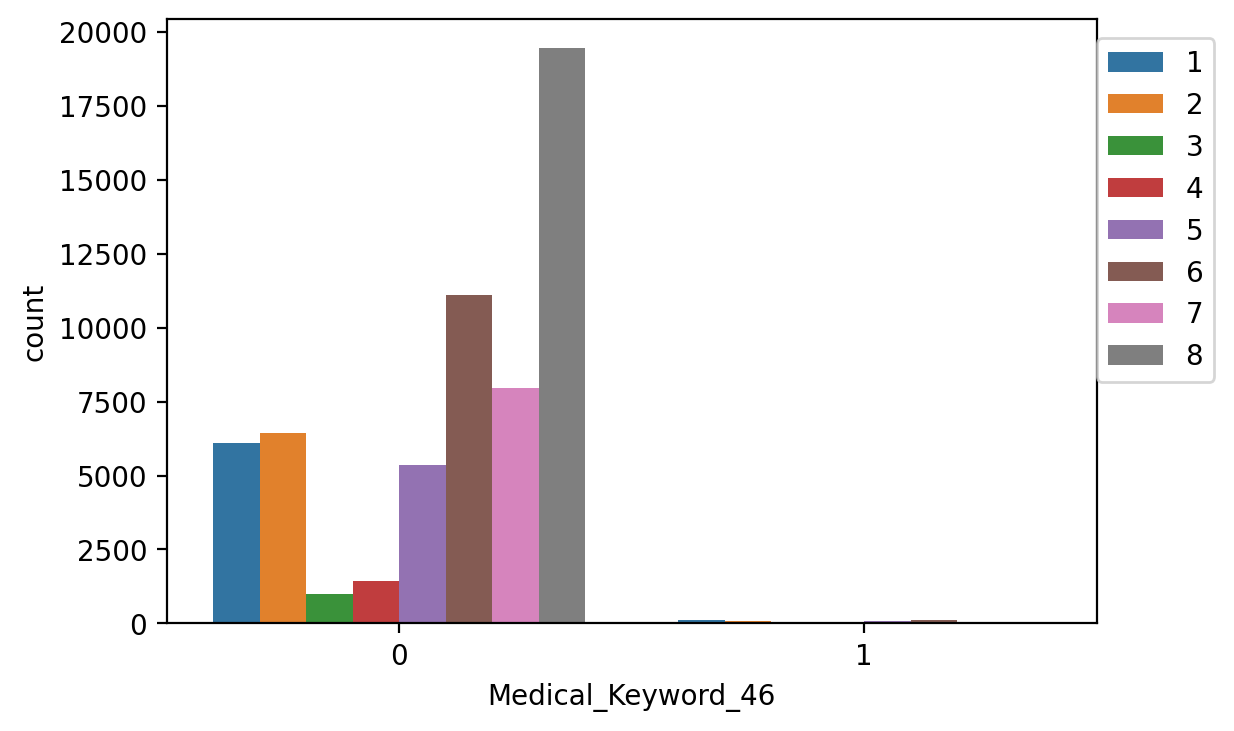

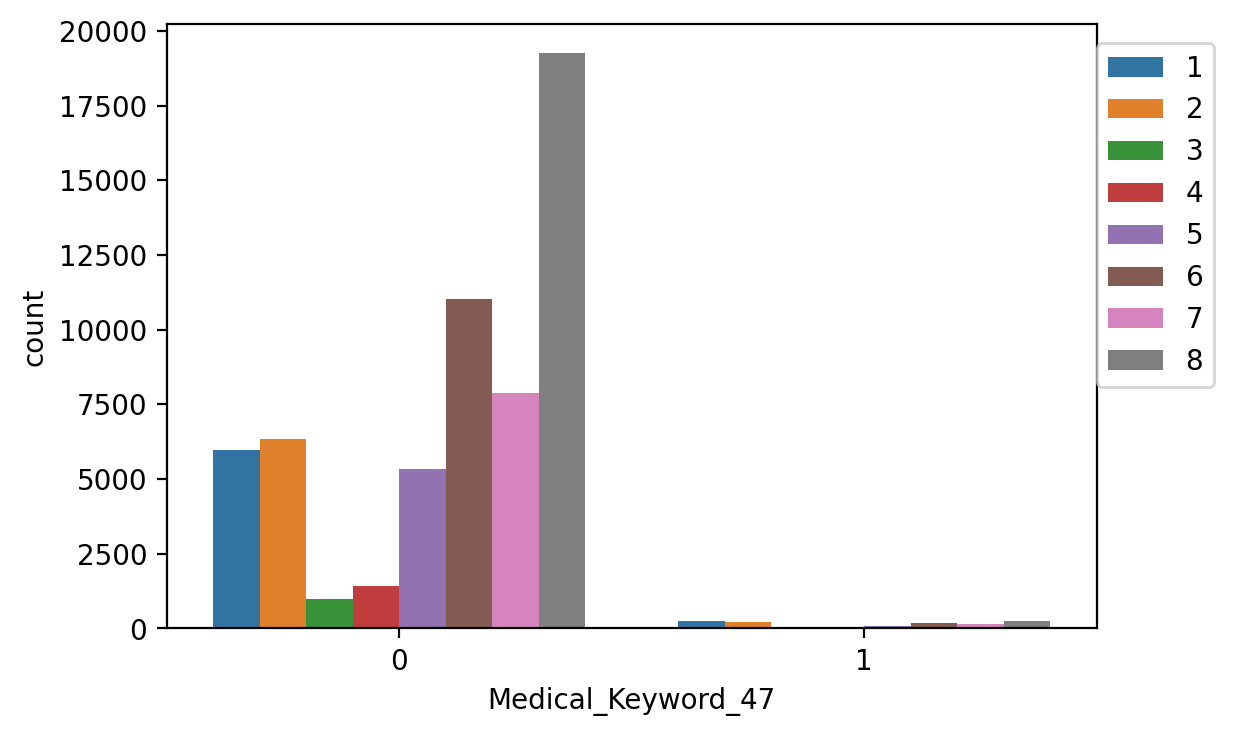

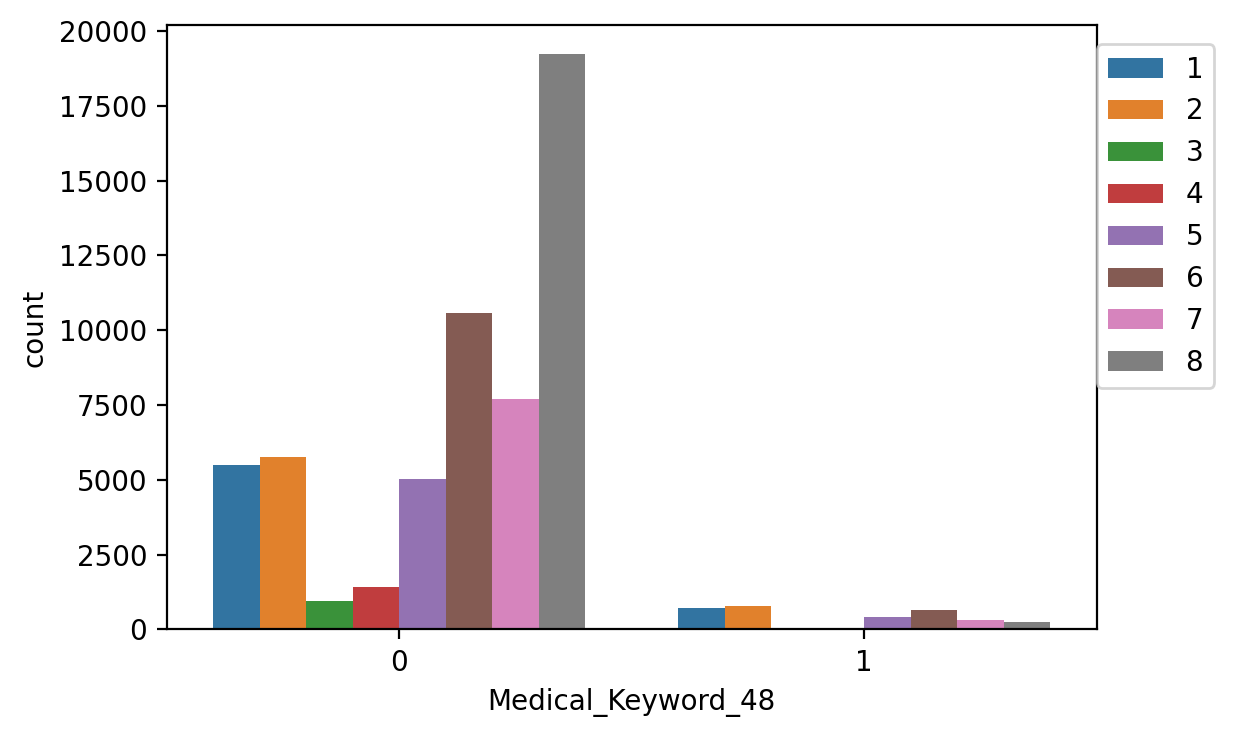

In [138]:
# Showing medical keywords columns
for col in medical_keywords_cols:
    plt.figure(dpi = 200)
    sns.countplot(x = df[col], hue = df['Response'])
    plt.legend(loc = [1,0.4])
    plt.show();

<br><br>

> **Evaluation of Categorical Features**
> * Categorical features seems to be distint. Especially medical keywords columns can be aggregated in a new column to get another feature.

<br><br>

In [139]:
df['Med_Keywords_Count'] = df[medical_keywords_cols].sum(axis=1)

In [140]:
df.head()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0               1               0              10        0.076923   
1               1               1              26        0.076923   
2               1               2              26        0.076923   
3               1               3              10        0.487179   
4               1               4              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt  ...  Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0  0.148536  ...                   0                   0                   0   
1  0.131799  ...                   0                   0                   0   
2  0.288703  ...                   0                   0                   0   
3  0.205021  ...                   0                   0                   0   
4  0.234310  ...                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  \
0                   0                   0                   0         8   
1                   0                   0                   0         4   
2                   0                   0                   0         8   
3                   0                   0                   0         8   
4                   0                   0                   0         8   

   Product_Info_2_char  Product_Info_2_num  Med_Keywords_Count  
0                    0                   0                   0  
1                    1                   1                   0  
2                    2                   1                   0  
3                    0                   2                   1  
4                    0                   3                   0  

[5 rows x 130 columns]

<br><br>

> **Evaluation of Float Features**
> * Most of them show normal distribution. However, since we do not know what values they refer to in real life, it is better not to search any outliers.

<br><br>

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='mlmodels'></a>

## 4. ML Models

<a id='mlmodels-1'></a>

### 4.1. Classification Models

Let's define a function to create classification model with default values.

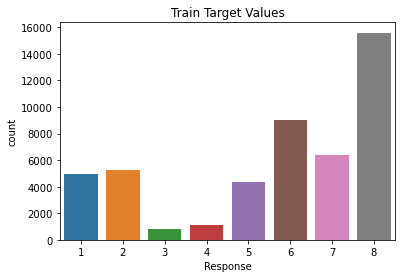

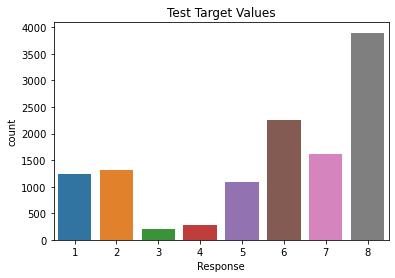

In [401]:
from sklearn.model_selection import StratifiedShuffleSplit

# Determine X and y
X = df.drop('Response', axis=1)
y = df['Response']

# Split train/test data
# Stratified is better to keep label ratio of each split
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 101, test_size = 0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed

sns.countplot(x = y_train)
plt.title('Train Target Values')
plt.show()

sns.countplot(x = y_test)
plt.title('Test Target Values')
plt.show()



In [402]:
from sklearn.metrics import classification_report, plot_confusion_matrix, recall_score, f1_score

result_table = pd.DataFrame(columns = ['model', 'recall', 'f1'])

#define a function to test the models without tuning
def create_model(model):
    print('-'*50, '\n', str(model)[:50])
    
    # Creating the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Recording the result
    result_table.loc[len(result_table)] = [str(model)[:50], recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
    
    # Printing the reports
    print(classification_report(y_test,y_pred),'\n\n')
    plot_confusion_matrix(model, X_test, y_test, cmap = 'Reds')
    plt.show();

We import classification models to automate the creating model process.

In [405]:
# Importing classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

class_models = [KNeighborsClassifier(), LogisticRegression(), 
               GaussianNB(), MLPClassifier(), DecisionTreeClassifier(),
              RandomForestClassifier(), GradientBoostingClassifier(),
              LGBMClassifier(), Perceptron(), SGDClassifier()]

-------------------------------------------------- 
 KNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.20      0.20      0.20      1241
           2       0.17      0.13      0.14      1310
           3       0.07      0.02      0.04       203
           4       0.08      0.03      0.04       286
           5       0.14      0.09      0.11      1086
           6       0.25      0.25      0.25      2247
           7       0.17      0.13      0.15      1606
           8       0.45      0.60      0.51      3898

    accuracy                           0.31     11877
   macro avg       0.19      0.18      0.18     11877
weighted avg       0.27      0.31      0.28     11877
 




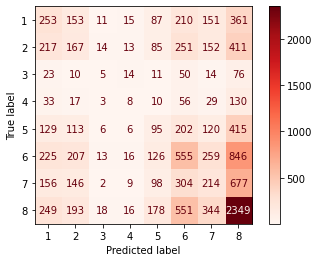

-------------------------------------------------- 
 LogisticRegression()
              precision    recall  f1-score   support

           1       0.30      0.19      0.23      1241
           2       0.39      0.01      0.01      1310
           3       0.00      0.00      0.00       203
           4       0.00      0.00      0.00       286
           5       0.00      0.00      0.00      1086
           6       0.24      0.23      0.24      2247
           7       0.36      0.00      0.00      1606
           8       0.40      0.92      0.56      3898

    accuracy                           0.37     11877
   macro avg       0.21      0.17      0.13     11877
weighted avg       0.30      0.37      0.25     11877
 




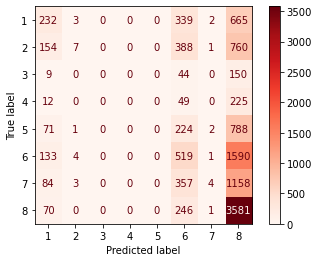

-------------------------------------------------- 
 GaussianNB()
              precision    recall  f1-score   support

           1       0.27      0.29      0.28      1241
           2       0.30      0.14      0.19      1310
           3       0.06      0.11      0.08       203
           4       0.06      0.37      0.11       286
           5       0.18      0.08      0.12      1086
           6       0.29      0.04      0.07      2247
           7       0.25      0.25      0.25      1606
           8       0.53      0.75      0.62      3898

    accuracy                           0.35     11877
   macro avg       0.24      0.25      0.21     11877
weighted avg       0.34      0.35      0.32     11877
 




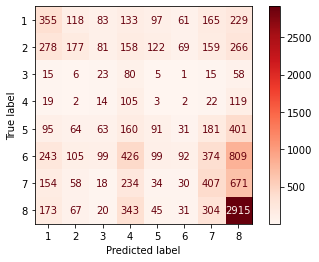

-------------------------------------------------- 
 MLPClassifier()
              precision    recall  f1-score   support

           1       0.35      0.30      0.32      1241
           2       0.33      0.27      0.30      1310
           3       0.54      0.24      0.33       203
           4       0.49      0.37      0.42       286
           5       0.45      0.44      0.45      1086
           6       0.46      0.35      0.40      2247
           7       0.40      0.34      0.37      1606
           8       0.65      0.89      0.75      3898

    accuracy                           0.52     11877
   macro avg       0.46      0.40      0.42     11877
weighted avg       0.49      0.52      0.50     11877
 




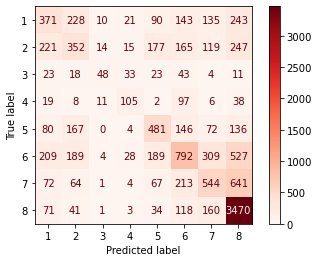

-------------------------------------------------- 
 DecisionTreeClassifier()
              precision    recall  f1-score   support

           1       0.20      0.20      0.20      1241
           2       0.23      0.23      0.23      1310
           3       0.16      0.18      0.17       203
           4       0.30      0.28      0.29       286
           5       0.40      0.41      0.41      1086
           6       0.36      0.36      0.36      2247
           7       0.33      0.33      0.33      1606
           8       0.67      0.67      0.67      3898

    accuracy                           0.43     11877
   macro avg       0.33      0.33      0.33     11877
weighted avg       0.43      0.43      0.43     11877
 




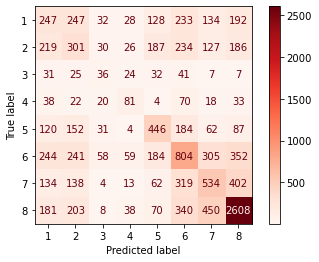

-------------------------------------------------- 
 RandomForestClassifier()
              precision    recall  f1-score   support

           1       0.43      0.21      0.28      1241
           2       0.44      0.25      0.32      1310
           3       0.56      0.05      0.09       203
           4       0.66      0.28      0.39       286
           5       0.58      0.52      0.55      1086
           6       0.43      0.53      0.47      2247
           7       0.48      0.35      0.40      1606
           8       0.66      0.92      0.77      3898

    accuracy                           0.55     11877
   macro avg       0.53      0.39      0.41     11877
weighted avg       0.53      0.55      0.52     11877
 




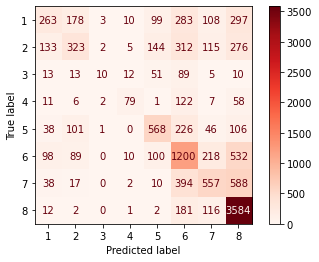

-------------------------------------------------- 
 GradientBoostingClassifier()
              precision    recall  f1-score   support

           1       0.49      0.21      0.29      1241
           2       0.46      0.25      0.32      1310
           3       0.49      0.26      0.34       203
           4       0.55      0.46      0.50       286
           5       0.59      0.55      0.57      1086
           6       0.47      0.51      0.49      2247
           7       0.47      0.42      0.44      1606
           8       0.67      0.93      0.77      3898

    accuracy                           0.57     11877
   macro avg       0.52      0.45      0.46     11877
weighted avg       0.55      0.57      0.54     11877
 




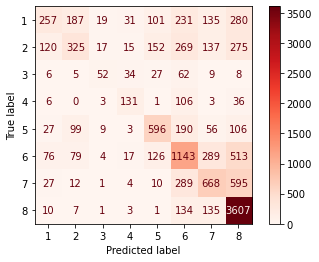

-------------------------------------------------- 
 LGBMClassifier()
              precision    recall  f1-score   support

           1       0.48      0.27      0.34      1241
           2       0.45      0.27      0.34      1310
           3       0.47      0.29      0.35       203
           4       0.55      0.45      0.49       286
           5       0.63      0.54      0.58      1086
           6       0.49      0.51      0.50      2247
           7       0.49      0.44      0.46      1606
           8       0.68      0.92      0.78      3898

    accuracy                           0.58     11877
   macro avg       0.53      0.46      0.48     11877
weighted avg       0.56      0.58      0.56     11877
 




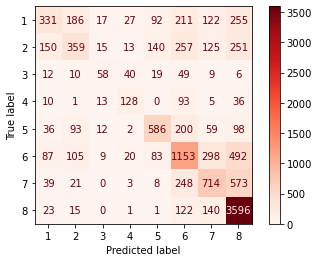

-------------------------------------------------- 
 Perceptron()
              precision    recall  f1-score   support

           1       0.38      0.03      0.06      1241
           2       0.25      0.01      0.03      1310
           3       0.12      0.12      0.12       203
           4       1.00      0.01      0.01       286
           5       0.28      0.01      0.03      1086
           6       0.26      0.06      0.10      2247
           7       0.17      0.41      0.24      1606
           8       0.49      0.87      0.62      3898

    accuracy                           0.36     11877
   macro avg       0.37      0.19      0.15     11877
weighted avg       0.35      0.36      0.27     11877
 




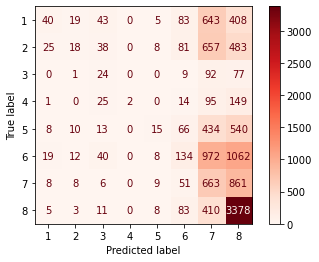

-------------------------------------------------- 
 SGDClassifier()
              precision    recall  f1-score   support

           1       0.28      0.50      0.36      1241
           2       0.38      0.01      0.03      1310
           3       0.33      0.00      0.01       203
           4       0.44      0.01      0.03       286
           5       0.32      0.02      0.05      1086
           6       0.36      0.20      0.25      2247
           7       0.39      0.13      0.20      1606
           8       0.48      0.95      0.64      3898

    accuracy                           0.42     11877
   macro avg       0.37      0.23      0.19     11877
weighted avg       0.39      0.42      0.33     11877
 




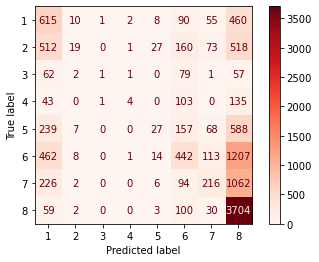

In [406]:
for model in class_models:
    create_model(model)

-------------------------------------------------- 
 XGBClassifier(base_score=None, booster=None, callb
              precision    recall  f1-score   support

           0       0.45      0.27      0.34      1241
           1       0.44      0.28      0.34      1310
           2       0.50      0.29      0.37       203
           3       0.55      0.45      0.49       286
           4       0.62      0.54      0.57      1086
           5       0.50      0.51      0.50      2247
           6       0.48      0.43      0.45      1606
           7       0.68      0.92      0.78      3898

    accuracy                           0.58     11877
   macro avg       0.53      0.46      0.48     11877
weighted avg       0.56      0.58      0.56     11877
 




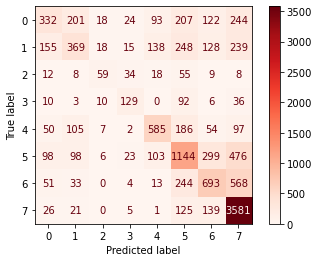

In [408]:
# XGB requires labels to be modified such as [0,1,2..]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)

#Creating the model
model = XGBClassifier()

print('-'*50, '\n', str(model)[:50])
model.fit(X_train, y_train_xgb)
y_pred = model.predict(X_test)

#Saving the result
result_table.loc[len(result_table)] = [str(model)[:50], recall_score(y_test_xgb, y_pred, average='weighted'), f1_score(y_test_xgb, y_pred, average='weighted')]

#Printing the report
print(classification_report(y_test_xgb,y_pred),'\n\n')
plot_confusion_matrix(model, X_test, y_test_xgb, cmap = 'Reds')
plt.show();

<AxesSubplot:ylabel='model'>

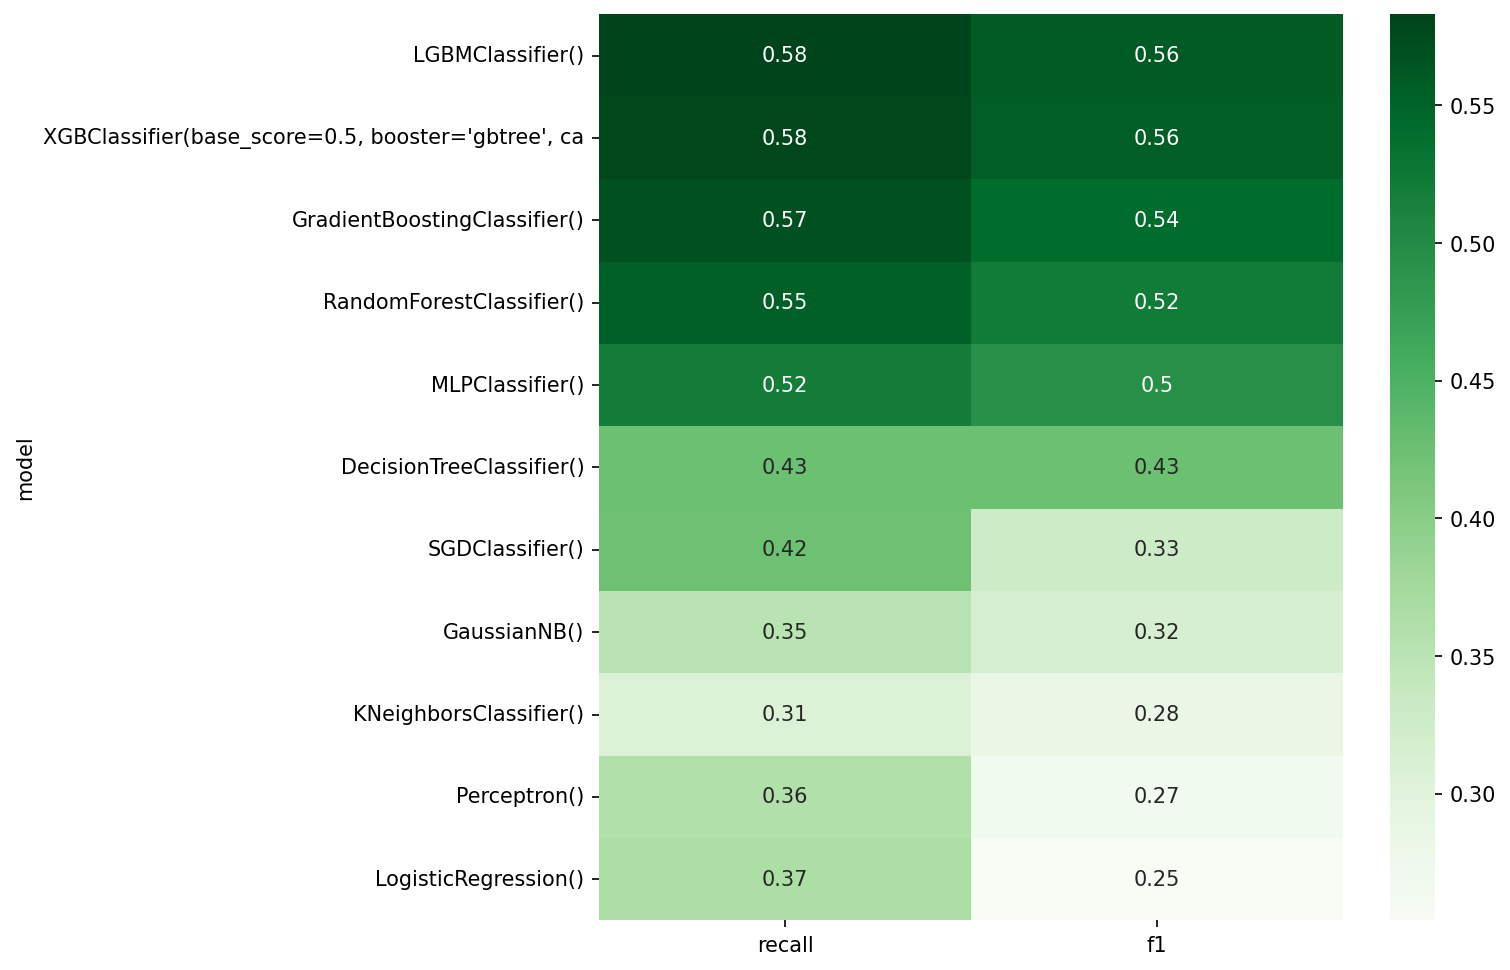

In [409]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'f1', ascending = False), annot = True, cmap = 'Greens')

<br><br>

> **Evaluation of Results**
> * **LGBM** and **XGBoost** classifiers give the best results for our data set. They have the highest overall f1 score. These scores may be even better after hyperparameter tuning.
> * Although the overall score is relatively low, these algorithms have achieved 0.78 f1 score and 0.92 recall score detecting the most severe cases, i.e. Response greater than 7. We can just focus on finding the most severe cases.

<br><br>

In [411]:
df['Response_over_7'] = df['Response'].apply(lambda x: 1 if x>7 else 0)

In [412]:
df.head()

Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0               1               0              10        0.076923   
1               1               1              26        0.076923   
2               1               2              26        0.076923   
3               1               3              10        0.487179   
4               1               4              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt  ...  Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0  0.148536  ...                   0                   0                   0   
1  0.131799  ...                   0                   0                   0   
2  0.288703  ...                   0                   0                   0   
3  0.205021  ...                   0                   0                   0   
4  0.234310  ...                   0                   0                   0   

   Medical_Keyword_48  Response  Product_Info_2_char  Product_Info_2_num  \
0                   0         8                    0                   0   
1                   0         4                    1                   1   
2                   0         8                    2                   1   
3                   0         8                    0                   2   
4                   0         8                    0                   3   

   Med_Keywords_Count   BMI_Age  Response_over_7  
0                   0  0.207304                1  
1                   0  0.016256                0  
2                   0  0.012799                1  
3                   1  0.057863                1  
4                   0  0.177213                1  

[5 rows x 132 columns]

-------------------------------------------------- 
 XGBClassifier(base_score=None, booster=None, callb
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7979
           1       0.74      0.81      0.77      3898

    accuracy                           0.84     11877
   macro avg       0.82      0.83      0.83     11877
weighted avg       0.85      0.84      0.85     11877
 




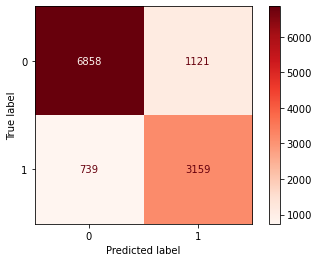

In [413]:
# Defining the new X and y
X = df.drop(columns = ['Response', 'Response_over_7'])
y = df['Response_over_7']

# Split train/test data
# Stratified is better to keep label ratio of each split
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 101, test_size = 0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


#Creating the model
model = XGBClassifier()

print('-'*50, '\n', str(model)[:50])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#Printing the report
print(classification_report(y_test,y_pred),'\n\n')
plot_confusion_matrix(model, X_test, y_test, cmap = 'Reds')
plt.show();

-------------------------------------------------- 
 LGBMClassifier()
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7979
           1       0.74      0.81      0.77      3898

    accuracy                           0.84     11877
   macro avg       0.82      0.83      0.83     11877
weighted avg       0.85      0.84      0.84     11877
 




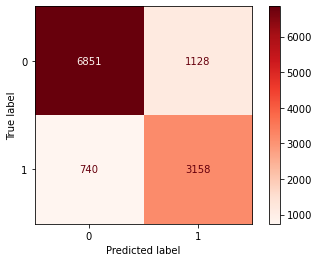

In [414]:
# Defining the new X and y
X = df.drop(columns = ['Response', 'Response_over_7'])
y = df['Response_over_7']

# Split train/test data
# Stratified is better to keep label ratio of each split
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 101, test_size = 0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


#Creating the model
model = LGBMClassifier()

print('-'*50, '\n', str(model)[:50])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#Printing the report
print(classification_report(y_test,y_pred),'\n\n')
plot_confusion_matrix(model, X_test, y_test, cmap = 'Reds')
plt.show();

<br><br>

> **Evaluation of Results**
> * **LGBM** and **XGBoost** classifiers give 0.84 accuracy score detecting Response greater than 7. We can tune hyperparameters to get better scores.

<br><br>

<br><br>

<a id='mlmodels-2'></a>

### 4.2. Model Tuning

In this section, we will try to tune our XGBoost algorithm to get better scores.

In [415]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()
param_grid = {'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05]}

In [416]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5)
cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None

In [417]:
cv_model.best_params_

{'subsample': 0.8, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.02}

-------------------------------------------------- 
 XGBClassifier(base_score=None, booster=None, callb
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7979
           1       0.73      0.82      0.77      3898

    accuracy                           0.84     11877
   macro avg       0.82      0.84      0.83     11877
weighted avg       0.85      0.84      0.85     11877
 




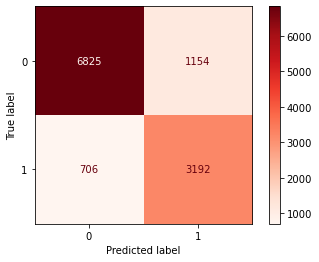

In [419]:
model = XGBClassifier(subsample = 0.8, 
                           n_estimators = 2000, 
                           max_depth = 3,
                          learning_rate = 0.02)

print('-'*50, '\n', str(model)[:50])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred),'\n\n')
plot_confusion_matrix(model, X_test, y_test, cmap = 'Reds')
plt.show();

> **Evaluation of Results**
> * Tuned model gives almost the same f1 score, but we know now that crossvalidation will give some avoiding of overfitting advantage.

<br><br>

<a id='mlmodels-3'></a>

### 4.3. Feature Importance

Let's check which features are the most effective to detect fraud.

In [420]:
# Creating a dataframe for feature importances
imp_feats = pd.DataFrame(data = model.feature_importances_,
                         index = X.columns,columns = ['Feature Importance']).sort_values("Feature Importance")

In [421]:
# Filtering the 20 most effective features to show them on a figure
imp_feats = imp_feats.sort_values('Feature Importance', ascending = False).head(20)

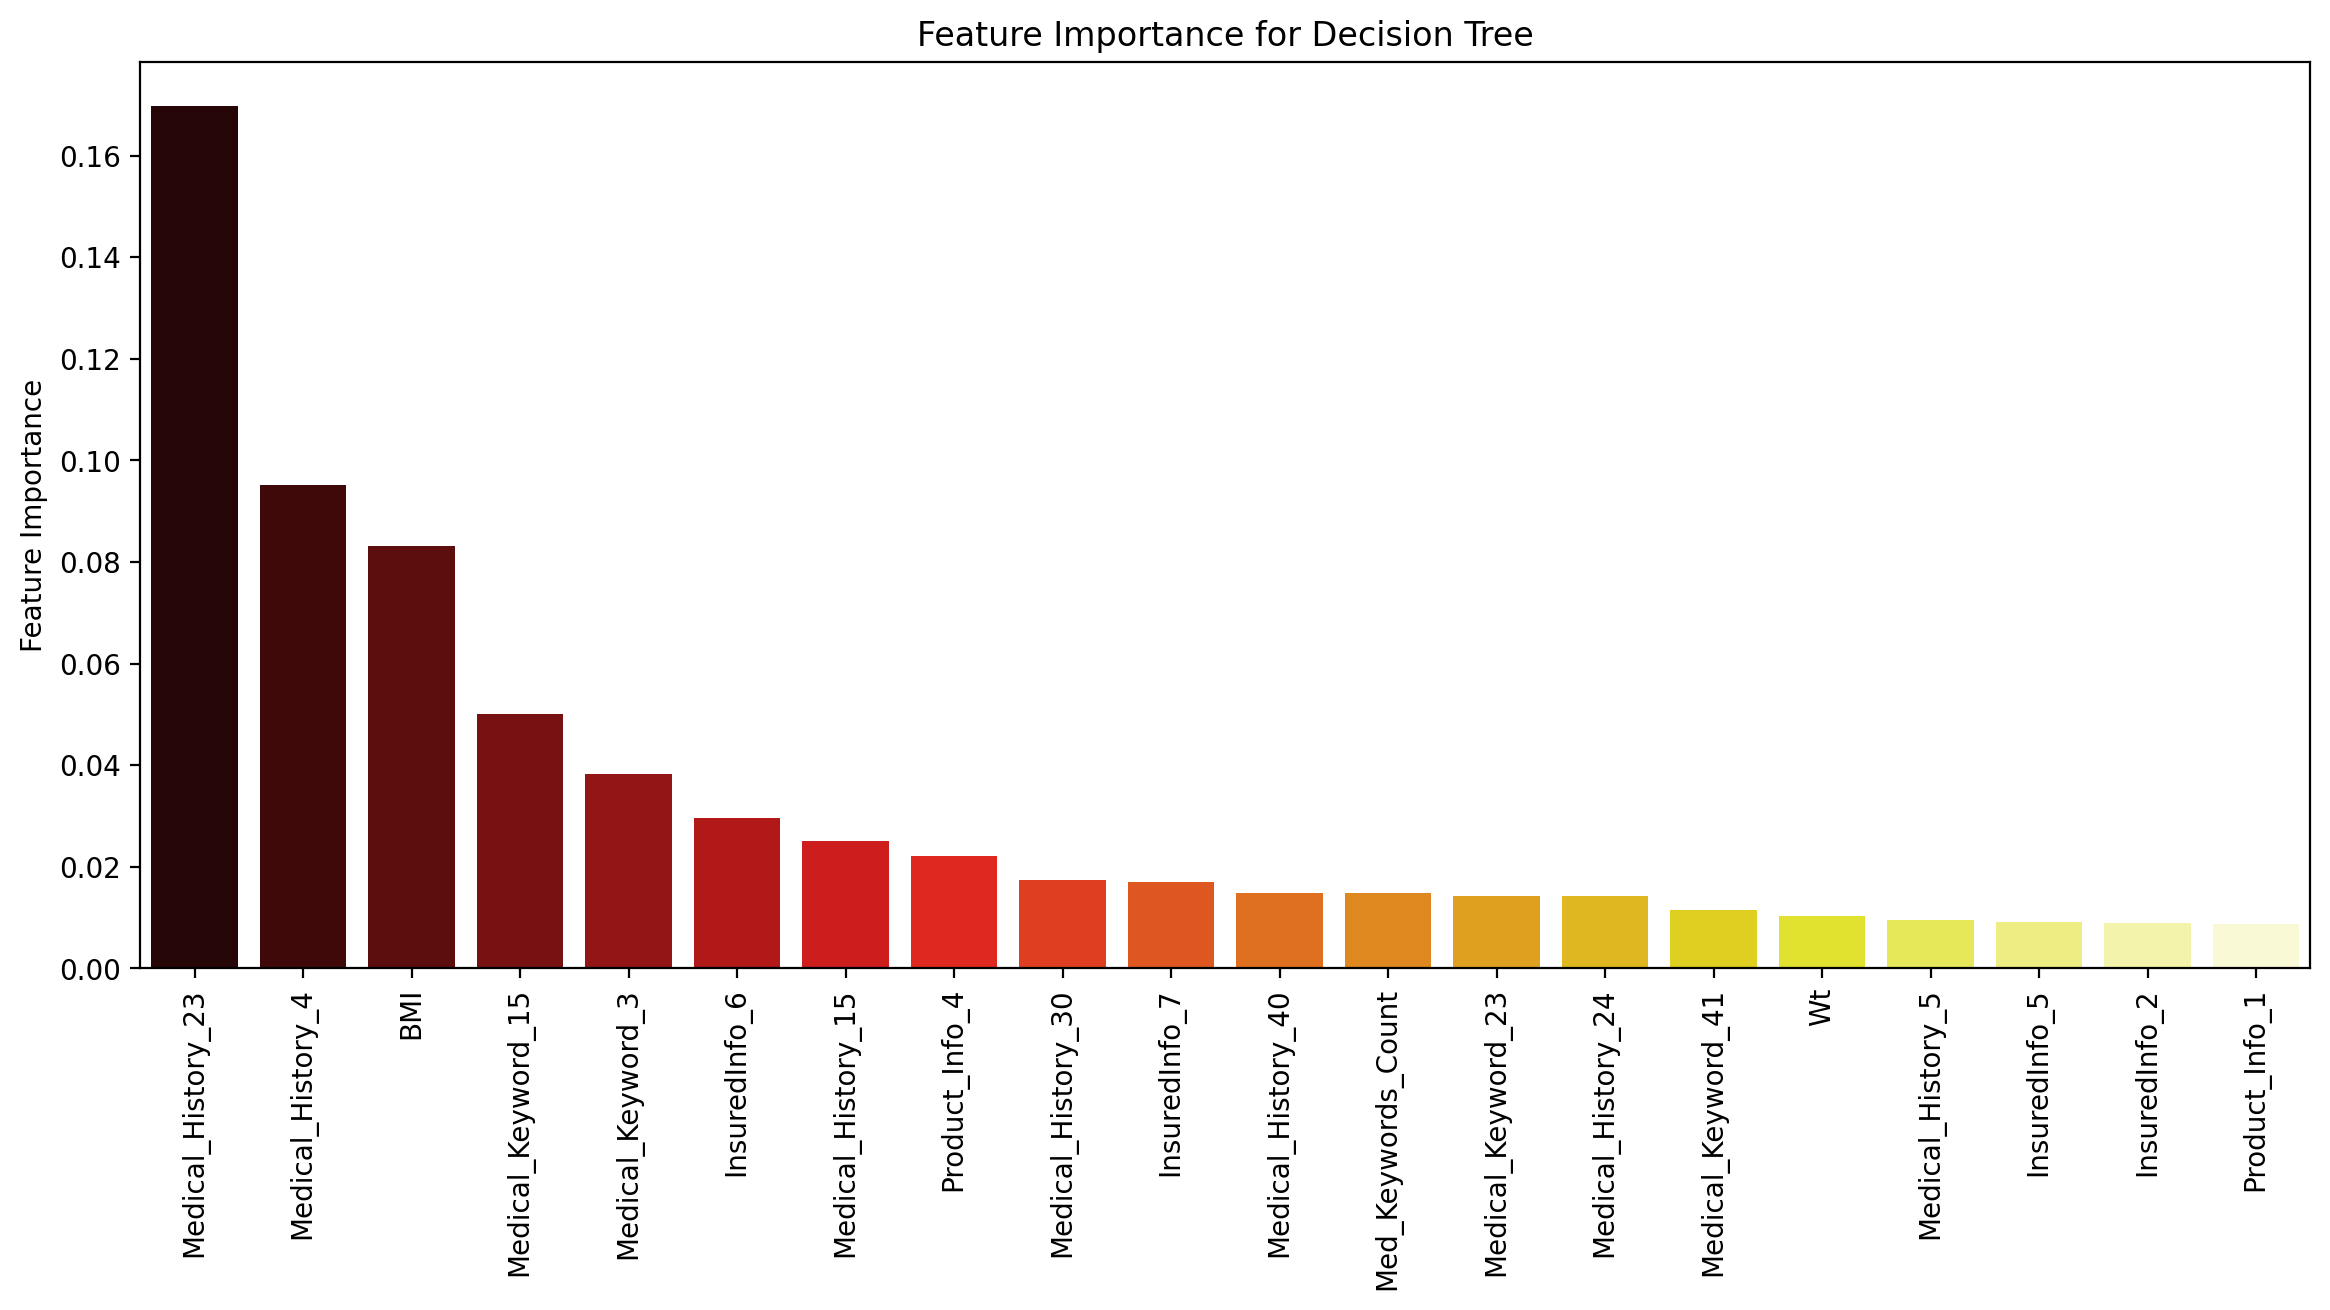

In [422]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = imp_feats,
            x = imp_feats.index,
            y = 'Feature Importance', palette = 'hot')
plt.xticks(rotation = 90)
plt.title("Feature Importance for Decision Tree");

<br><br>

<br><br>

<a id='mlmodels-4'></a>

### 4.4. Pairwise Modelling

In this section, we will filter the values over 7 response labeled with the previous model and we try to predict response greater than 6.

In [426]:
# Concatting predictions of the model for detecting Response>7
df['Response_over_7_preds'] = model.predict(X)

In [428]:
# Saving column names for X
X_cols = X.columns

In [431]:
df['Response_over_6'] = df['Response'].apply(lambda x: 1 if x > 6 else 0)

-------------------------------------------------- 
 XGBClassifier(base_score=None, booster=None, callb
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5710
           1       0.63      0.57      0.60      1843

    accuracy                           0.81      7553
   macro avg       0.75      0.73      0.74      7553
weighted avg       0.81      0.81      0.81      7553
 




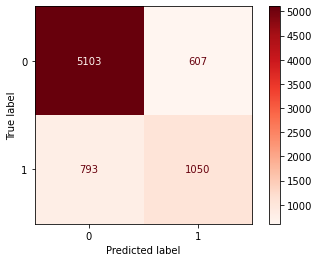

In [432]:
# Defining X and y for data passing the first model 
X = df[df['Response_over_7_preds'] == 0][X_cols]
y = df[df['Response_over_7_preds'] == 0]['Response_over_6']

# Split train/test data
# Stratified is better to keep label ratio of each split
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 101, test_size = 0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
model = XGBClassifier(subsample = 0.8, 
                           n_estimators = 2000, 
                           max_depth = 3,
                          learning_rate = 0.02)

create_model(model)

<br><br>

> **Evaluation of Results**
> * After classifying Response>7 values with the first model and filtering them, Response>6 values are predicted with 0.81 accuracy. This shows that pairwise modelling for all classes results in better scores and overall the customers can be segmented with high accuracy.

<br><br>

<br>[Return to the Outline](#outline) <br>

<a id='conclusion'></a>

## 5. Conclusion

Over the years, the importance of data science in insurance area has increased significantly. One of the most important uses of data science in this area is the customer segmentation. In this work datasets provided by Prutential for Kaggle contest are used to classify customers' claims severity.

There are many columns in this dataset. Features such as Medical Keywords are one-hot encoded. Feature engineering has vital importance for this study. Features such as sum of medical keywords are generated for better predictions. The first results of the algorithms show that modelling the data at once does not give good scores for predicting most of the target values. Therefore, new features such as 'Response_over_7' are generated and each of these values are modelled seperately. After labeling responses over 7 with 84% accuracy score with XGBClassifier, responses_over_6 is assigned as the new target value and remodelled. This way high accuracy score for each class is achieved.

> **Check my other works in my Github Page** https://github.com/DrFarukAydin/data-science-portfolio

<br>[Return to the Outline](#outline) <br>